In [1]:
# Load libraries

# # Plotting utils 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.ticker as ticker 
import matplotlib.patches as patches
import matplotlib as matplotlib
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Analysis
# import os
import time
import numpy as np 
import xarray as xr
import datetime
from   datetime import date, timedelta
import pandas as pd 
import pickle
import scipy.stats as stats

# Import Ngl with pyn_env active 
import Ngl

## Need to use metPy conda env
# import metpy.calc as mpc
# from metpy.units import units

import warnings
warnings.filterwarnings('ignore')



## Read in data 


In [1]:
start_time = time.time()

saveDir = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/FinalOption/ProcessedFiles/'

HMGcamDS_localReal        = pickle.load( open( saveDir+"HMGcamDS_localReal.p", "rb" ) )
HTGcamDS_localReal        = pickle.load( open( saveDir+"HTGcamDS_localReal.p", "rb" ) )
HTGcamDS_localReal10      = pickle.load( open( saveDir+"HTGcamDS_localReal10.p", "rb" ) )

HMGclmDS_localReal        = pickle.load( open( saveDir+"HMGclmDS_localReal.p", "rb" ) )
HTGclmDS_localReal        = pickle.load( open( saveDir+"HTGclmDS_localReal.p", "rb" ) )
HTGclmDS_localReal10      = pickle.load( open( saveDir+"HTGclmDS_localReal10.p", "rb" ) )

HMGclmDS_localRealPatch   = pickle.load( open( saveDir+"HMGclmDS_localRealPatch.p", "rb" ) )
HTGclmDS_localRealPatch   = pickle.load( open( saveDir+"HTGclmDS_localRealPatch.p", "rb" ) )
HTGclmDS_localRealPatch10 = pickle.load( open( saveDir+"HTGclmDS_localRealPatch10.p", "rb" ) )

print('Loaded all the real_sfc pickle files')

HMGcamDS_localArt        = pickle.load( open( saveDir+"HMGcamDS_localArt.p", "rb" ) )
HTGcamDS_localArt        = pickle.load( open( saveDir+"HTGcamDS_localArt.p", "rb" ) )
HTGcamDS_localArt5       = pickle.load( open( saveDir+"HTGcamDS_localArt5.p", "rb" ) )
HTGcamDS_localArt25      = pickle.load( open( saveDir+"HTGcamDS_localArt25.p", "rb" ) )

HMGclmDS_localArt        = pickle.load( open( saveDir+"HMGclmDS_localArt.p", "rb" ) )
HTGclmDS_localArt        = pickle.load( open( saveDir+"HTGclmDS_localArt.p", "rb" ) )
HTGclmDS_localArt5       = pickle.load( open( saveDir+"HTGclmDS_localArt5.p", "rb" ) )
HTGclmDS_localArt25      = pickle.load( open( saveDir+"HTGclmDS_localArt25.p", "rb" ) )

HMGclmDS_localArtPatch   = pickle.load( open( saveDir+"HMGclmDS_localArtPatch.p", "rb" ) )
HTGclmDS_localArtPatch   = pickle.load( open( saveDir+"HTGclmDS_localArtPatch.p", "rb" ) )

print('Loaded all the artificial_sfc pickle files')

print('Total elapsed time (sec): ', time.time()-start_time)


NameError: name 'time' is not defined

In [3]:
# ## Large-scale forcing data:
# nateForcingFileHTG = '/Users/mdfowler/Documents/Analysis/CLASP/NateForcing/clasp-htg.nc'
# nateDS_HTG = xr.open_dataset(nateForcingFileHTG, decode_times='True')

# nateForcingFileHMG = '/Users/mdfowler/Documents/Analysis/CLASP/NateForcing/clasp-hmg.nc'
# nateDS_HMG = xr.open_dataset(nateForcingFileHMG, decode_times='True')

# ## Convert to local time too 
# nateDS_local       = nateDS_HTG.copy(deep=True)

# # Confirmed that all the times are identical, so using the same local time arrays
# localTimes = nateDS_local['time'].values - np.timedelta64(5,'h')

# # Replace time dimension with local time
# nateDS_local = nateDS_local.assign_coords({"time": localTimes})

# # Add month_day index
# month_day_idx                      = pd.MultiIndex.from_arrays([nateDS_local['time.year'].values,
#                                                                 nateDS_local['time.month'].values, 
#                                                                 nateDS_local['time.day'].values])
# nateDS_local.coords['year_month_day'] = ('time', month_day_idx)

# # Now sum over the day to get total amount of rainfall
# nateDS_localDailySum = nateDS_local.groupby('year_month_day').sum()


### Add in month-day index and modify/add some variables

In [7]:
# # Add month_day index to arrays
# month_day_idx                      = pd.MultiIndex.from_arrays([HMGcamDS_localReal['time.year'].values,
#                                                                 HMGcamDS_localReal['time.month'].values, 
#                                                                 HMGcamDS_localReal['time.day'].values])



# HMGcamDS_localReal.coords['year_month_day']      = ('time', month_day_idx)
# HMGclmDS_localReal.coords['year_month_day']      = ('time', month_day_idx)
# HMGclmDS_localRealPatch.coords['year_month_day'] = ('time', month_day_idx)

# HTGcamDS_localReal.coords['year_month_day']      = ('time', month_day_idx)
# HTGclmDS_localReal.coords['year_month_day']      = ('time', month_day_idx)
# HTGclmDS_localRealPatch.coords['year_month_day'] = ('time', month_day_idx)

# HTGcamDS_localReal10.coords['year_month_day']      = ('time', month_day_idx)
# HTGclmDS_localReal10.coords['year_month_day']      = ('time', month_day_idx)
# HTGclmDS_localRealPatch10.coords['year_month_day'] = ('time', month_day_idx)


# HMGcamDS_localArt.coords['year_month_day']      = ('time', month_day_idx)
# HMGclmDS_localArt.coords['year_month_day']      = ('time', month_day_idx)
# HMGclmDS_localArtPatch.coords['year_month_day'] = ('time', month_day_idx)

# HTGcamDS_localArt.coords['year_month_day']      = ('time', month_day_idx)
# HTGclmDS_localArt.coords['year_month_day']      = ('time', month_day_idx)
# HTGclmDS_localArtPatch.coords['year_month_day'] = ('time', month_day_idx)

# HTGcamDS_localArt5.coords['year_month_day']      = ('time', month_day_idx)
# HTGclmDS_localArt5.coords['year_month_day']      = ('time', month_day_idx)

# HTGcamDS_localArt25.coords['year_month_day']      = ('time', month_day_idx)
# HTGclmDS_localArt25.coords['year_month_day']      = ('time', month_day_idx)


In [3]:
## Belated realization that the heights computed are above *sea level* not above ground level. 
#    Need to subtract elevation. 
nateFile = '/Users/mdfowler/Documents/Analysis/CLASP/NateForcing/clasp-hmg.bdate.nc'
nateDS = xr.open_dataset(nateFile, decode_times=True)
elevation = nateDS.alt.values

HMGcamDS_localReal['PBLdepth']   = HMGcamDS_localReal['PBLdepth']  - elevation[0][0] 
HTGcamDS_localReal['PBLdepth']   = HTGcamDS_localReal['PBLdepth']  - elevation[0][0] 
HTGcamDS_localReal10['PBLdepth'] = HTGcamDS_localReal10['PBLdepth']  - elevation[0][0] 

HMGcamDS_localArt['PBLdepth']    = HMGcamDS_localArt['PBLdepth']  - elevation[0][0] 
HTGcamDS_localArt['PBLdepth']    = HTGcamDS_localArt['PBLdepth']  - elevation[0][0] 
HTGcamDS_localArt5['PBLdepth']   = HTGcamDS_localArt5['PBLdepth']  - elevation[0][0] 
HTGcamDS_localArt25['PBLdepth']  = HTGcamDS_localArt25['PBLdepth']  - elevation[0][0] 


In [4]:
## Add in TKE 

HMGcamDS_localReal['TKE']  = (('time','ilev','lat,','lon'),
                   0.5*(HMGcamDS_localReal['UP2_CLUBB']+HMGcamDS_localReal['VP2_CLUBB']+HMGcamDS_localReal['WP2_CLUBB']))  
HTGcamDS_localReal['TKE']  = (('time','ilev','lat,','lon'),
                   0.5*(HTGcamDS_localReal['UP2_CLUBB']+HTGcamDS_localReal['VP2_CLUBB']+HTGcamDS_localReal['WP2_CLUBB'])) 

HTGcamDS_localReal10['TKE']  = (('time','ilev','lat,','lon'),
                   0.5*(HTGcamDS_localReal10['UP2_CLUBB']+HTGcamDS_localReal10['VP2_CLUBB']+HTGcamDS_localReal10['WP2_CLUBB'])) 


HMGcamDS_localArt['TKE']  = (('time','ilev','lat,','lon'),
                   0.5*(HMGcamDS_localArt['UP2_CLUBB']+HMGcamDS_localArt['VP2_CLUBB']+HMGcamDS_localArt['WP2_CLUBB']))  
HTGcamDS_localArt['TKE']  = (('time','ilev','lat,','lon'),
                   0.5*(HTGcamDS_localArt['UP2_CLUBB']+HTGcamDS_localArt['VP2_CLUBB']+HTGcamDS_localArt['WP2_CLUBB'])) 


HTGcamDS_localArt5['TKE']  = (('time','ilev','lat,','lon'),
                   0.5*(HTGcamDS_localArt5['UP2_CLUBB']+HTGcamDS_localArt5['VP2_CLUBB']+HTGcamDS_localArt5['WP2_CLUBB'])) 

HTGcamDS_localArt25['TKE']  = (('time','ilev','lat,','lon'),
                   0.5*(HTGcamDS_localArt25['UP2_CLUBB']+HTGcamDS_localArt25['VP2_CLUBB']+HTGcamDS_localArt25['WP2_CLUBB'])) 



HMGcamDS_localReal['TKE'].attrs['units']   = 'm2/s2'
HTGcamDS_localReal['TKE'].attrs['units']   = 'm2/s2'
HTGcamDS_localReal10['TKE'].attrs['units'] = 'm2/s2'

HMGcamDS_localArt['TKE'].attrs['units'] = 'm2/s2'
HTGcamDS_localArt['TKE'].attrs['units'] = 'm2/s2'
HTGcamDS_localArt5['TKE'].attrs['units']  = 'm2/s2'
HTGcamDS_localArt25['TKE'].attrs['units'] = 'm2/s2'


HMGcamDS_localReal['TKE'].attrs['long_name']   = 'Turbulent Kinetic Energy'
HTGcamDS_localReal['TKE'].attrs['long_name']   = 'Turbulent Kinetic Energy'
HTGcamDS_localReal10['TKE'].attrs['long_name'] = 'Turbulent Kinetic Energy'

HMGcamDS_localArt['TKE'].attrs['long_name'] = 'Turbulent Kinetic Energy'
HTGcamDS_localArt['TKE'].attrs['long_name'] = 'Turbulent Kinetic Energy'
HTGcamDS_localArt5['TKE'].attrs['long_name'] = 'Turbulent Kinetic Energy'
HTGcamDS_localArt25['TKE'].attrs['long_name'] = 'Turbulent Kinetic Energy'



In [5]:
## Add in wind speed 

HMGcamDS_localReal['WindMagnitude']  = (('time','lev','lat,','lon'),
                                np.sqrt((HMGcamDS_localReal.U.values**2.0) + (HMGcamDS_localReal.V.values**2.0)) )

HTGcamDS_localReal['WindMagnitude']  = (('time','lev','lat,','lon'),
                                np.sqrt((HTGcamDS_localReal.U.values**2.0) + (HTGcamDS_localReal.V.values**2.0)) )

HTGcamDS_localReal10['WindMagnitude']  = (('time','lev','lat,','lon'),
                                np.sqrt((HTGcamDS_localReal10.U.values**2.0) + (HTGcamDS_localReal10.V.values**2.0)) )



HMGcamDS_localArt['WindMagnitude']  = (('time','lev','lat,','lon'),
                                np.sqrt((HMGcamDS_localArt.U.values**2.0) + (HMGcamDS_localArt.V.values**2.0)) )

HTGcamDS_localArt['WindMagnitude']  = (('time','lev','lat,','lon'),
                                np.sqrt((HTGcamDS_localArt.U.values**2.0) + (HTGcamDS_localArt.V.values**2.0)) )

HTGcamDS_localArt5['WindMagnitude']  = (('time','lev','lat,','lon'),
                                np.sqrt((HTGcamDS_localArt5.U.values**2.0) + (HTGcamDS_localArt5.V.values**2.0)) )

HTGcamDS_localArt25['WindMagnitude']  = (('time','lev','lat,','lon'),
                                np.sqrt((HTGcamDS_localArt25.U.values**2.0) + (HTGcamDS_localArt25.V.values**2.0)) )


HMGcamDS_localReal['WindMagnitude'].attrs['units']   = 'm/s'
HTGcamDS_localReal['WindMagnitude'].attrs['units']   = 'm/s'
HTGcamDS_localReal10['WindMagnitude'].attrs['units'] = 'm/s'

HMGcamDS_localArt['WindMagnitude'].attrs['units']   = 'm/s'
HTGcamDS_localArt['WindMagnitude'].attrs['units']   = 'm/s'
HTGcamDS_localArt5['WindMagnitude'].attrs['units']  = 'm/s'
HTGcamDS_localArt25['WindMagnitude'].attrs['units'] = 'm/s'


HMGcamDS_localReal['WindMagnitude'].attrs['long_name']   = 'Wind speed'
HTGcamDS_localReal['WindMagnitude'].attrs['long_name']   = 'Wind speed'
HTGcamDS_localReal10['WindMagnitude'].attrs['long_name'] = 'Wind speed'

HMGcamDS_localArt['WindMagnitude'].attrs['long_name']   = 'Wind speed'
HTGcamDS_localArt['WindMagnitude'].attrs['long_name']   ='Wind speed'
HTGcamDS_localArt5['WindMagnitude'].attrs['long_name']  = 'Wind speed'
HTGcamDS_localArt25['WindMagnitude'].attrs['long_name'] = 'Wind speed'



### Define patch labels for the real surface

In [11]:
## Get information on patch weights and types 

# Weight of each PFT over the gridcell (doesn't change in time here)
PFTwgt = HTGclmDS_localRealPatch.pfts1d_wtgcell.values

# PFT types 
PFTtype = HTGclmDS_localRealPatch.pfts1d_itype_veg.values

# Column types 
colType = HTGclmDS_localRealPatch.pfts1d_itype_col.values

# If want to sort by weight...
indSort     = np.argsort(PFTwgt)

sortWgt     = PFTwgt[indSort[::-1]]
sortPFTtype = PFTtype[indSort[::-1]]
sortColType = colType[indSort[::-1]]

print(' Patch %      PFT_Type      Col_Type')
for iPatch in range(len(PFTwgt)):
    print(' %7.2f %11i %13i' % ((sortWgt[iPatch]/np.sum(sortWgt))*100, sortPFTtype[iPatch], sortColType[iPatch]))
iUrban = np.where((sortColType>70) & (sortColType<80))[0]
print('Percent of urban area in grdicell: %.2f' %( np.sum(sortWgt[iUrban])*100))

 Patch %      PFT_Type      Col_Type
   48.74          15           215
   25.56          13             1
   22.17          14             1
    2.26          16           216
    0.66           7             1
    0.32           0             1
    0.15           1             1
    0.08           0            71
    0.03           0            73
    0.03           0            72
    0.01           0            75
    0.01           0            74
    0.00           0            71
    0.00           0            73
    0.00           0            72
    0.00           0            74
    0.00           0            75
Percent of urban area in grdicell: 0.15


In [12]:
## Also save patch names into an array to use later 

print('Unsorted.... ')
print('% Area        PFT type          Col type                 Label')
# for iPatch in range(len(PFTwgt)):
#     print('%3i %16i '% (PFTtype[iPatch], colType[iPatch]))
    
patchLabels = np.asarray(['BareGround',
                          'NeedleleafEvergreen',
                          'BroadleafDeciduous',
                          'C3 grass',
                          'C4 grass',
                          'Crop',
                          'IrrigCrop',
                          'Urban71',
                          'Urban72',
                          'Urban73',
                          'Urban74',
                          'Urban75',
                          'Urban71',
                          'Urban72',
                          'Urban73',
                          'Urban74',
                          'Urban75'])

for iPatch in range(len(PFTwgt)):
    print('%.2f %13i %16i %28s'% (PFTwgt[iPatch]*100.0, PFTtype[iPatch], colType[iPatch], patchLabels[iPatch]))

patchLabels_art = np.asarray(['BroadleafDeciduous',
                          'C3 grass',
                          'Urban71',
                          'Urban72',
                          'Urban73',
                          'Urban74',
                          'Urban75',
                          'Lake'])

Unsorted.... 
% Area        PFT type          Col type                 Label
0.32             0                1                   BareGround
0.15             1                1          NeedleleafEvergreen
0.66             7                1           BroadleafDeciduous
25.56            13                1                     C3 grass
22.17            14                1                     C4 grass
48.74            15              215                         Crop
2.26            16              216                    IrrigCrop
0.00             0               71                      Urban71
0.00             0               72                      Urban72
0.00             0               73                      Urban73
0.00             0               74                      Urban74
0.00             0               75                      Urban75
0.08             0               71                      Urban71
0.03             0               72                      Urban72
0.03      

In [13]:
print(PFTwgt[0:7], np.nansum(PFTwgt[iUrban]))

[0.00323742 0.00146382 0.00657151 0.25555826 0.22167144 0.48741096
 0.02255482] 0.0015317610984762265


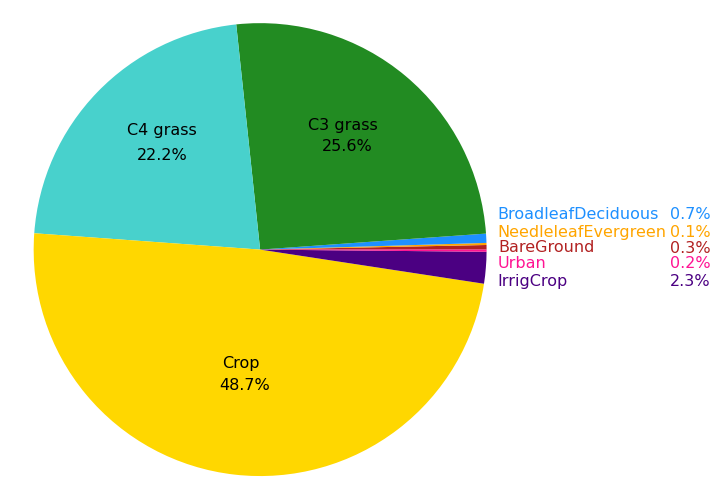

In [14]:
## Pie chart of surface area type
fig, ax1 = plt.subplots(figsize=(9,9))

colorPatch = np.asarray(['firebrick','orange','dodgerblue','forestgreen','mediumturquoise','gold','indigo','deeppink'])

iUrban = np.where((colType>=70) & (colType<80))[0]

plotLabels = np.append(patchLabels[0:7],'Urban')
plotPcts   = np.append(PFTwgt[0:7], np.nansum(PFTwgt[iUrban]))
patches, texts, autotexts = ax1.pie(plotPcts, labels=plotLabels, autopct='%1.1f%%',
        colors=colorPatch, labeldistance=1.05,textprops={'fontsize':16},rotatelabels=False)
ax1.axis('equal')

## Do some moving about of labels, etc. 

texts[3]._x=+0.21
texts[3]._y=+0.55

texts[4]._x=-0.28
texts[4]._y=+0.53

texts[5]._x=0.0
texts[5]._y=-0.50

# texts[0]._y=+0.1
autotexts[0]._x=+1.9
# autotexts[0]._y=+0.1
texts[0]._color=colorPatch[0]
autotexts[0]._color=colorPatch[0]

texts[1]._y=+0.08
autotexts[1]._x=+1.9
autotexts[1]._y=+0.08
texts[1]._color=colorPatch[1]
autotexts[1]._color=colorPatch[1]

texts[2]._y=+0.16
autotexts[2]._x=+1.9
autotexts[2]._y=+0.16
texts[2]._color=colorPatch[2]
autotexts[2]._color=colorPatch[2]

texts[6]._y=-0.14
autotexts[6]._x=+1.9
autotexts[6]._y=-0.14
texts[6]._color=colorPatch[6]
autotexts[6]._color=colorPatch[6]

texts[7]._y=-0.06
autotexts[7]._x=+1.9
autotexts[7]._y=-0.06
texts[7]._color=colorPatch[7]
autotexts[7]._color=colorPatch[7]

plt.show()

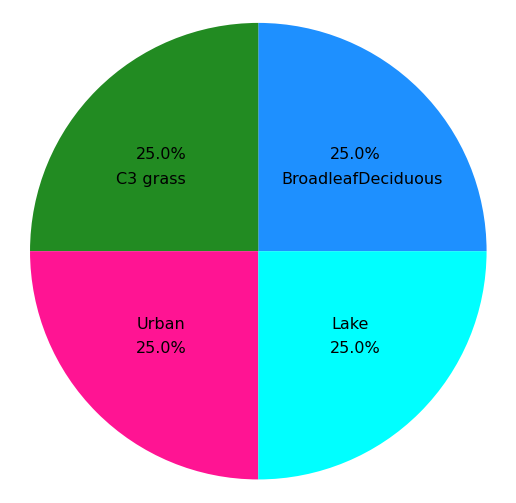

In [15]:
## Pie chart of surface area type (artificial sfc)
fig, ax1 = plt.subplots(figsize=(9,9))

colorPatch = np.asarray(['dodgerblue','forestgreen','deeppink','cyan'])


patchLabels_art = np.asarray(['BroadleafDeciduous',
                              'C3 grass',
                              'Urban',
                              'Lake'])

plotPcts_art   = np.asarray([0.25,0.25,0.25,0.25])

patches, texts, autotexts = ax1.pie(plotPcts_art, labels=patchLabels_art, autopct='%1.1f%%',
        colors=colorPatch, labeldistance=0.45,textprops={'fontsize':16},rotatelabels=False)
ax1.axis('equal')

texts[0]._x=+0.1


### Fucntion to interpolate to some set of standard pressure levels 

In [26]:
# def interpolateToPressure(DS, varName, pressGoals):
#     p0mb = DS.P0.values[0]/100        # mb
    
#     # Pull out hya/hyb profiles 
#     hyam = DS.hyam.values[0,:]
#     hybm = DS.hybm.values[0,:]
#     hyai = DS.hyai.values[0,:]
#     hybi = DS.hybi.values[0,:]

#     # Surface pressure with time dimension
#     PS   = DS.PS.values              # Pa 

#     # Converting variables: 
#     if np.shape(DS[varName].values)[1]==len(DS.ilev.values):
#         varInterp = Ngl.vinth2p(DS[varName].values,hyai,hybi,pressGoals,PS,1,p0mb,1,True)
#     elif np.shape(DS[varName].values)[1]==len(DS.lev.values):
#         varInterp = Ngl.vinth2p(DS[varName].values,hyam,hybm,pressGoals,PS,1,p0mb,1,True)
    
#     return varInterp


In [6]:
def interpolateToPressure_v2(DSin, varName, pressGoals):
    nCases = len(DSin.case.values)
    nTimes = len(DSin.time.values)
    
    saveOut = np.full([nCases,nTimes,len(pressGoals),1,1], np.nan)

    ## For the larger arrays, need to operate case-by-case; input to vinth2p can only be 3 or 4 dimensions. 
    for iCase in range(nCases): 
        DS = DSin.isel(case=iCase)

        p0mb = DS.P0.values[0]/100        # mb

        # Pull out hya/hyb profiles 
        hyam = DS.hyam.values[0,:]
        hybm = DS.hybm.values[0,:]
        hyai = DS.hyai.values[0,:]
        hybi = DS.hybi.values[0,:]

        # Surface pressure with time dimension
        PS   = DS.PS.values              # Pa 

        # Converting variables: 
        if np.shape(DS[varName].values)[1]==len(DS.ilev.values):
            varInterp = Ngl.vinth2p(DS[varName].values,hyai,hybi,pressGoals,PS,1,p0mb,1,True)
        elif np.shape(DS[varName].values)[1]==len(DS.lev.values):
            varInterp = Ngl.vinth2p(DS[varName].values,hyam,hybm,pressGoals,PS,1,p0mb,1,True)

        saveOut[iCase,:,:,:,:] = varInterp
    
    return saveOut


In [7]:
## Change some of how things are organized for optimizing performance: 
#  One giant dataset for all the different cases per surface definition 

realSfc_caseNames = np.asarray(['HMG','HTG','HTG10']).astype(str)
realSfc_allCases  = xr.concat([HMGcamDS_localReal,
                               HTGcamDS_localReal,
                               HTGcamDS_localReal10], "case")
realSfc_allCases = realSfc_allCases.assign_coords({"case": realSfc_caseNames})


artSfc_caseNames = np.asarray(['HMG','HTG']).astype(str)
artSfc_allCases  = xr.concat([HMGcamDS_localArt,
                              HTGcamDS_localArt], "case")
artSfc_allCases  = artSfc_allCases.assign_coords({"case": artSfc_caseNames})


# These runs have some different variable set ups than the one above so keep them separate for now 
artSfcMult_caseNames = np.asarray(['HTG5','HTG25']).astype(str)
artSfcMult_allCases  = xr.concat([HTGcamDS_localArt5,
                                  HTGcamDS_localArt25], "case")
artSfcMult_allCases  = artSfcMult_allCases.assign_coords({"case": artSfcMult_caseNames})


In [8]:
del HMGcamDS_localReal
del HTGcamDS_localReal
del HTGcamDS_localReal10

del HMGcamDS_localArt
del HTGcamDS_localArt

del HTGcamDS_localArt5
del HTGcamDS_localArt25

In [9]:
## Decide on levels to interpoalte to and add to larger arrays
pnew64 = np.arange(200.0,980.0,10.0) 

realSfc_allCases     = realSfc_allCases.assign_coords({"levInterp": pnew64})
artSfc_allCases      = artSfc_allCases.assign_coords({"levInterp": pnew64})
artSfcMult_allCases = artSfcMult_allCases.assign_coords({"levInterp": pnew64})

varSels = np.asarray(['THLP2_CLUBB','RTP2_CLUBB','RTPTHLP_CLUBB','WPRTP_CLUBB','WPTHLP_CLUBB','WP2_CLUBB','UP2_CLUBB',
                      'VP2_CLUBB','TKE','U','V','T','Q','OMEGA','RVMTEND_CLUBB','STEND_CLUBB','CLOUD',
                      'UPWP_CLUBB','VPWP_CLUBB','WP2RTP_CLUBB','THETAL','QRL','QRS','DCQ','WindMagnitude'])


for iVar in range(len(varSels)): 
    varUnits = realSfc_allCases[varSels[iVar]].units
    varName  = realSfc_allCases[varSels[iVar]].long_name
    
    # Interpolate variables and add to larger arrays 
    interpVar_real    = interpolateToPressure_v2(realSfc_allCases,     varSels[iVar], pnew64)
    interpVar_art     = interpolateToPressure_v2(artSfc_allCases,      varSels[iVar], pnew64)
    interpVar_artMult = interpolateToPressure_v2(artSfcMult_allCases, varSels[iVar], pnew64) 
    
    realSfc_allCases[varSels[iVar]+'_interp']    = (('case','time','levInterp','lat','lon'), interpVar_real)
    artSfc_allCases[varSels[iVar]+'_interp']     = (('case','time','levInterp','lat','lon'), interpVar_art)
    artSfcMult_allCases[varSels[iVar]+'_interp'] = (('case','time','levInterp','lat','lon'), interpVar_artMult)
    
    ## Assign attibutes 
    realSfc_allCases[varSels[iVar]+'_interp'].attrs['units']    = varUnits
    artSfc_allCases[varSels[iVar]+'_interp'].attrs['units']     = varUnits
    artSfcMult_allCases[varSels[iVar]+'_interp'].attrs['units'] = varUnits
    
    realSfc_allCases[varSels[iVar]+'_interp'].attrs['long_name']    = varName
    artSfc_allCases[varSels[iVar]+'_interp'].attrs['long_name']     = varName
    artSfcMult_allCases[varSels[iVar]+'_interp'].attrs['long_name'] = varName
    
    print('Done with variable %i of %i' % (iVar, len(varSels)))
    

Done with variable 0 of 25
Done with variable 1 of 25
Done with variable 2 of 25
Done with variable 3 of 25
Done with variable 4 of 25
Done with variable 5 of 25
Done with variable 6 of 25
Done with variable 7 of 25
Done with variable 8 of 25
Done with variable 9 of 25
Done with variable 10 of 25
Done with variable 11 of 25
Done with variable 12 of 25
Done with variable 13 of 25
Done with variable 14 of 25
Done with variable 15 of 25
Done with variable 16 of 25
Done with variable 17 of 25
Done with variable 18 of 25
Done with variable 19 of 25
Done with variable 20 of 25
Done with variable 21 of 25
Done with variable 22 of 25
Done with variable 23 of 25
Done with variable 24 of 25


In [10]:
saveDir = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/FinalOption/ProcessedFiles/'
pickle.dump( realSfc_allCases,   open( saveDir+"realSfc_allCases_withInterp.p", "wb" ) )
pickle.dump( artSfc_allCases,   open( saveDir+"artSfc_allCases_withInterp.p", "wb" ) )
pickle.dump( artSfcMult_allCases, open( saveDir+"artSfcMult_allCases_withInterp.p", "wb" ) )
print('Saved interp CAM files to pickle')


Saved interp CAM files to pickle


(1000.0, 700.0)

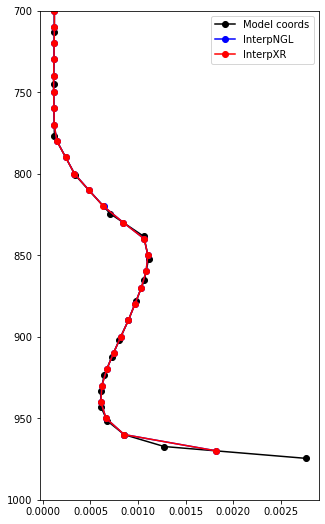

In [65]:
# fig,axs = plt.subplots(1,1, figsize=(5,9))
# axs.plot(HMGcamDS_localReal.THLP2_CLUBB.values[10,:,0,0], press_i[10,:]/100,'k-o')
# axs.plot(varConverted[10,:,0,0], pnew64,'b-o')    # Function that used NCL to convert a certain variable 
# axs.plot(interpDS.THLP2_CLUBB.values[10,:,0,0], pnew64,'r-o') # Function that used XR to convert a whole dataset
# axs.legend(['Model coords','InterpNGL','InterpXR'])

# axs.invert_yaxis()
# axs.set_ylim([1000,700])

### Sanity check: diurnal means over all days

In [140]:
## Get daily means over surfaces 
realSfc_allCases_dailyMean    = realSfc_allCases.groupby('time.hour').mean()
artSfc_allCases_dailyMean     = artSfc_allCases.groupby('time.hour').mean()
# artSfcMult_allCases_dailyMean = artSfcMult_allCases.groupby('time.hour').mean()
print('Hourly means over all surfaces calculated')

realSfc_allCases_dailyStd    = realSfc_allCases.groupby('time.hour').std(dim='time')
artSfc_allCases_dailyStd     = artSfc_allCases.groupby('time.hour').std(dim='time')
# artSfcMult_allCases_dailyStd = artSfcMult_allCases.groupby('time.hour').std(dim='time')
print('Hourly std over all surfaces calculated')





Hourly means over all surfaces calculated
Hourly std over all surfaces calculated


KeyError: 'time'

In [141]:
# Get number of obs going into those hourly means (for error bars)
nTimes   = np.full([24], np.nan)

for iHr in range(24): 
    nTimes[iHr]  = len(np.where(realSfc_allCases["time.hour"]==iHr)[0])

realSfc_allCases_dailyMean['SampleCount']       = (('hour'), nTimes)
artSfc_allCases_dailyMean['SampleCount']        = (('hour'), nTimes)
# artSfcMult_allCases_dailyMean['SampleCount']    = (('hour'), nTimes)

In [165]:
artSfcMult_allCases_dailyMean = artSfcMult_allCases.groupby('time.hour').mean()
artSfcMult_allCases_dailyStd = artSfcMult_allCases.groupby('time.hour').std(dim='time')
artSfcMult_allCases_dailyMean['SampleCount']    = (('hour'), nTimes)
print('Done with multiplier cases too.')

Done with multiplier cases too.


In [51]:
# ## Quick sanity test:
# hourlyMean_HMGreal    = HMGcamDS_localReal.groupby("time.hour").mean()
# hourlyMean_HTGreal    = HTGcamDS_localReal.groupby("time.hour").mean()

# hourlyMean_HMGart    = HMGcamDS_localArt.groupby("time.hour").mean()
# hourlyMean_HTGart    = HTGcamDS_localArt.groupby("time.hour").mean()

# hourlyMean_HTGart5   = HTGcamDS_localArt5.groupby("time.hour").mean()
# hourlyMean_HTGart25  = HTGcamDS_localArt25.groupby("time.hour").mean()
# print('Done computing hourly means')

# hourlyStd_HMGart    = HMGcamDS_localArt.groupby("time.hour").std(dim='time')
# hourlyStd_HTGart    = HTGcamDS_localArt.groupby("time.hour").std(dim='time')

# hourlyStd_HTGart5   = HTGcamDS_localArt5.groupby("time.hour").std(dim='time')
# hourlyStd_HTGart25  = HTGcamDS_localArt25.groupby("time.hour").std(dim='time')
# print('Done computing hourly std')

# # Get number of obs going into those hourly means (for error bars)
# nTimes   = np.full([24], np.nan)

# for iHr in range(24): 
#     nTimes[iHr]  = len(np.where(HMGcamDS_localReal["time.hour"]==iHr)[0])

# hourlyMean_HMGart['SampleCount']         = (('hour'), nTimes)
# hourlyMean_HTGart['SampleCount']         = (('hour'), nTimes)

# hourlyMean_HTGart5['SampleCount']        = (('hour'), nTimes)
# hourlyMean_HTGart25['SampleCount']       = (('hour'), nTimes)



Done computing hourly means
Done computing hourly std


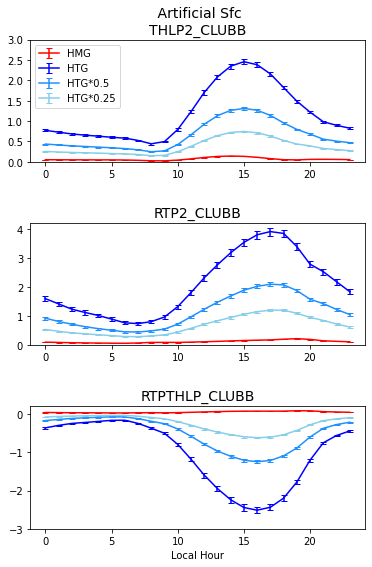

In [168]:
varSel = np.asarray(['THLP2_CLUBB','RTP2_CLUBB','RTPTHLP_CLUBB'])


## Plot for realistic surface 
# caseNames = np.asarray(['HMG','HTG','HTG*10'])
# colorList = np.asarray(['orange','violet','purple'])
# sfcString = ' Real Sfc'
# meanDS = realSfc_allCases_dailyMean
# stdDS  = realSfc_allCases_dailyStd
# # yMax   = np.asarray([1.0, 4.0,  0.2])
# # yMin   = np.asarray([0.0, 0.0, -1.6])
# yMax   = np.asarray([0.5, 0.5,  0.2])
# yMin   = np.asarray([0.0, 0.0, -0.2])


    
## Plot for aritifical surface 
# caseNames = np.asarray(['HMG','HTG'])
caseNames = np.asarray(['HMG','HTG','HTG*0.5','HTG*0.25'])
colorList = np.asarray(['red','blue','dodgerblue','skyblue'])
sfcString = ' Artificial Sfc'
meanDS = artSfc_allCases_dailyMean
stdDS  = artSfc_allCases_dailyStd
yMax = np.asarray([3.0, 4.2,  0.2])
yMin = np.asarray([0.0, 0.0, -3.0])


fig,axs = plt.subplots(len(varSel),1, figsize=(6,len(varSel)*3))
axs     = axs.ravel()
fig.subplots_adjust(hspace = 0.5)

iPlot=0
for iVar in range(len(varSel)):
#     for iCase in range(len(caseNames)):
    for iCase in range(2):
        axs[iPlot+0].errorbar(meanDS.hour.values, np.squeeze(meanDS[varSel[iVar]].values[:,iCase,-1,:,:]), 
                          yerr =2*np.squeeze(stdDS[varSel[iVar]].values[:,iCase,-1,:,:])/np.sqrt(meanDS['SampleCount'].values),
                          fmt='-',color=colorList[iCase], capsize=3, label=caseNames[iCase])
    if sfcString==' Artificial Sfc':
        axs[iPlot+0].errorbar(artSfcMult_allCases_dailyMean.hour.values, np.squeeze(artSfcMult_allCases_dailyMean[varSel[iVar]].values[:,0,-1,:,:]), 
                          yerr =2*np.squeeze(artSfcMult_allCases_dailyStd[varSel[iVar]].values[:,0,-1,:,:])/np.sqrt(artSfcMult_allCases_dailyMean['SampleCount'].values),
                          fmt='-',color=colorList[2], capsize=3, label=caseNames[2])
        axs[iPlot+0].errorbar(artSfcMult_allCases_dailyMean.hour.values, np.squeeze(artSfcMult_allCases_dailyMean[varSel[iVar]].values[:,1,-1,:,:]), 
                          yerr =2*np.squeeze(artSfcMult_allCases_dailyStd[varSel[iVar]].values[:,1,-1,:,:])/np.sqrt(artSfcMult_allCases_dailyMean['SampleCount'].values),
                          fmt='-',color=colorList[3], capsize=3, label=caseNames[3])
    
    # Limit range of y-axis
    axs[iPlot+0].set_ylim([yMin[iVar],yMax[iVar]])
    
    # Add titles and legend
    axs[iPlot+0].set_title(varSel[iVar]+'\n'+sfcString, fontsize=14)
    if iVar==0:
        axs[iPlot+0].legend(loc='upper left',fontsize=10)
        axs[iPlot+0].set_title(sfcString+'\n'+varSel[iVar], fontsize=14)
    else:
        axs[iPlot+0].set_title(varSel[iVar], fontsize=14)
    
    # Add axis labels 
    if hasattr(meanDS[varSel[iVar]], 'units'):
        axs[0+iPlot].set_ylabel(meanDS[varSel[iVar]].units)
    if iVar==len(varSel)-1: 
        axs[0+iPlot].set_xlabel('Local Hour')
    
    # Move onto plotting the next variable 
    iPlot = iPlot+1


## Define a few plotting functions that are useful

In [237]:
def diurnalCycle_sfcVars(listVars, sfcType, ymin, ymax):
    # Number of variables to plot
    nVars = len(listVars)
    
    ## Choose with a string which surface cases are of interest to plot 
    if sfcType=='artificial':
        caseNames = np.asarray(['HMG','HTG','HTG*0.5','HTG*0.25'])
        colorList = np.asarray(['red','blue','dodgerblue','skyblue'])
        
        dDry_ds = hourlyMean_dDry_artSfc
        wWet_ds = hourlyMean_wWet_artSfc
        
        dDryStd_ds = hourlyStd_dDry_artSfc
        wWetStd_ds = hourlyStd_wWet_artSfc
        
    elif sfcType=='real':
        caseNames = np.asarray(['HMG','HTG','HTG*10'])
        colorList = np.asarray(['orange','violet','purple'])
        
        dDry_ds = hourlyMean_dDry_realSfc
        wWet_ds = hourlyMean_wWet_realSfc
        
        dDryStd_ds = hourlyStd_dDry_realSfc
        wWetStd_ds = hourlyStd_wWet_realSfc
        
    else:
        print('Please define surface type as either artificial or real')
    
    
    ## Set up plots 
    fig,axs = plt.subplots(nVars,2, figsize=(10,nVars*3))
    axs     = axs.ravel()
    fig.subplots_adjust(hspace = 0.5)
    
    iPlot=0    
    for iVar in range(nVars):
        
        ## Check if variable is 3D and select appropriate data: 
        if len(np.shape(hourlyMean_dDry_artSfc[listVars[iVar]].values))==5:   #Dims: [hour, case, level, lat, lon]
            HMGvar_dry = dDry_ds[listVars[iVar]].values[:,0,-1,0,0]
            HTGvar_dry = dDry_ds[listVars[iVar]].values[:,1,-1,0,0]
            
            HMGvar_wet = wWet_ds[listVars[iVar]].values[:,0,-1,0,0]
            HTGvar_wet = wWet_ds[listVars[iVar]].values[:,1,-1,0,0]
            
            # Select std for variable too 
            HMGvarStd_dry = dDryStd_ds[listVars[iVar]].values[:,0,-1,0,0]
            HTGvarStd_dry = dDryStd_ds[listVars[iVar]].values[:,1,-1,0,0]
            
            HMGvarStd_wet = wWetStd_ds[listVars[iVar]].values[:,0,-1,0,0]
            HTGvarStd_wet = wWetStd_ds[listVars[iVar]].values[:,1,-1,0,0]
            
            if sfcType=='artificial':
                HTG5_dry  = hourlyMean_dDry_artSfcMult[listVars[iVar]].values[:,0,-1,0,0]
                HTG25_dry = hourlyMean_dDry_artSfcMult[listVars[iVar]].values[:,1,-1,0,0]
             
                HTG5_wet  = hourlyMean_wWet_artSfcMult[listVars[iVar]].values[:,0,-1,0,0]
                HTG25_wet = hourlyMean_wWet_artSfcMult[listVars[iVar]].values[:,1,-1,0,0]
                
                #Get std as well 
                HTG5std_dry  = hourlyStd_dDry_artSfcMult[listVars[iVar]].values[:,0,-1,0,0]
                HTG25std_dry = hourlyStd_dDry_artSfcMult[listVars[iVar]].values[:,1,-1,0,0]
             
                HTG5std_wet  = hourlyStd_wWet_artSfcMult[listVars[iVar]].values[:,0,-1,0,0]
                HTG25std_wet = hourlyStd_wWet_artSfcMult[listVars[iVar]].values[:,1,-1,0,0]
                
            elif sfcType=='real':
                HTG10_dry = dDry_ds[listVars[iVar]].values[:,2,-1,0,0]
                HTG10_wet = wWet_ds[listVars[iVar]].values[:,2,-1,0,0]
                
                HTG10std_dry = dDryStd_ds[listVars[iVar]].values[:,2,-1,0,0]
                HTG10std_wet = wWetStd_ds[listVars[iVar]].values[:,2,-1,0,0]
                
        ## 2D data         
        else:                                                     #Dims: [hour, case, lat, lon]
            HMGvar_dry = np.squeeze(dDry_ds[listVars[iVar]].values[:,0])
            HTGvar_dry = np.squeeze(dDry_ds[listVars[iVar]].values[:,1])
            
            HMGvar_wet = np.squeeze(wWet_ds[listVars[iVar]].values[:,0])
            HTGvar_wet = np.squeeze(wWet_ds[listVars[iVar]].values[:,1])
            
            # Select std for variable too 
            HMGvarStd_dry = np.squeeze(dDryStd_ds[listVars[iVar]].values[:,0])
            HTGvarStd_dry = np.squeeze(dDryStd_ds[listVars[iVar]].values[:,1])
            
            HMGvarStd_wet = np.squeeze(wWetStd_ds[listVars[iVar]].values[:,0])
            HTGvarStd_wet = np.squeeze(wWetStd_ds[listVars[iVar]].values[:,1])
            
            if sfcType=='artificial':
                HTG5_dry  = np.squeeze(hourlyMean_dDry_artSfcMult[listVars[iVar]].values[:,0])
                HTG25_dry = np.squeeze(hourlyMean_dDry_artSfcMult[listVars[iVar]].values[:,1])
             
                HTG5_wet  = np.squeeze(hourlyMean_wWet_artSfcMult[listVars[iVar]].values[:,0])
                HTG25_wet = np.squeeze(hourlyMean_wWet_artSfcMult[listVars[iVar]].values[:,1])
                
                #Get std as well 
                HTG5std_dry  = np.squeeze(hourlyStd_dDry_artSfcMult[listVars[iVar]].values[:,0])
                HTG25std_dry = np.squeeze(hourlyStd_dDry_artSfcMult[listVars[iVar]].values[:,1])
             
                HTG5std_wet  = np.squeeze(hourlyStd_wWet_artSfcMult[listVars[iVar]].values[:,0])
                HTG25std_wet = np.squeeze(hourlyStd_wWet_artSfcMult[listVars[iVar]].values[:,1])
                
            elif sfcType=='real':
                HTG10_dry = np.squeeze(dDry_ds[listVars[iVar]].values[:,2])
                HTG10_wet = np.squeeze(wWet_ds[listVars[iVar]].values[:,2])
                
                HTG10std_dry = np.squeeze(dDryStd_ds[listVars[iVar]].values[:,2])
                HTG10std_wet = np.squeeze(wWetStd_ds[listVars[iVar]].values[:,2])
            
            
            
        ## Now see about plotting that (dry days on left, wet days on right)
        
        # First plot just  the HTG and HMG cases for dry and then wet days - these are simple and don't depend sfc
        axs[0+iPlot].errorbar(dDry_ds.hour.values, HMGvar_dry, 
                          yerr =2*HMGvarStd_dry/np.sqrt(dDry_ds['SampleCount'].values),
                          fmt='-',color=colorList[0], capsize=3, label=caseNames[0])
        axs[0+iPlot].errorbar(dDry_ds.hour.values, HTGvar_dry, 
                          yerr =2*HTGvarStd_dry/np.sqrt(dDry_ds['SampleCount'].values),
                          fmt='-',color=colorList[1], capsize=3, label=caseNames[1])
        
        axs[1+iPlot].errorbar(wWet_ds.hour.values, HMGvar_wet, 
                          yerr =2*HMGvarStd_wet/np.sqrt(wWet_ds['SampleCount'].values),
                          fmt='-',color=colorList[0], capsize=3, label=caseNames[0])
        axs[1+iPlot].errorbar(wWet_ds.hour.values, HTGvar_wet, 
                          yerr =2*HTGvarStd_wet/np.sqrt(wWet_ds['SampleCount'].values),
                          fmt='-',color=colorList[1], capsize=3, label=caseNames[1])
            
        # Now plot any extra multiplier cases 
        if sfcType=='artificial':
            axs[0+iPlot].errorbar(dDry_ds.hour.values, HTG5_dry, 
                          yerr =2*HTG5std_dry/np.sqrt(hourlyMean_dDry_artSfcMult['SampleCount'].values),
                          fmt='-',color=colorList[2], capsize=3, label=caseNames[2])
            axs[0+iPlot].errorbar(dDry_ds.hour.values, HTG25_dry, 
                          yerr =2*HTG25std_dry/np.sqrt(hourlyMean_dDry_artSfcMult['SampleCount'].values),
                          fmt='-',color=colorList[3], capsize=3, label=caseNames[3])
            
            axs[1+iPlot].errorbar(wWet_ds.hour.values, HTG5_wet, 
                          yerr =2*HTG5std_wet/np.sqrt(hourlyMean_wWet_artSfcMult['SampleCount'].values),
                          fmt='-',color=colorList[2], capsize=3, label=caseNames[2])
            axs[1+iPlot].errorbar(wWet_ds.hour.values, HTG25_wet, 
                          yerr =2*HTG25std_wet/np.sqrt(hourlyMean_wWet_artSfcMult['SampleCount'].values),
                          fmt='-',color=colorList[3], capsize=3, label=caseNames[3])
            
        elif sfcType=='real':
            axs[0+iPlot].errorbar(dDry_ds.hour.values, HTG10_dry, 
                          yerr =2*HTG10std_dry/np.sqrt(dDry_ds['SampleCount'].values),
                          fmt='-',color=colorList[2], capsize=3, label=caseNames[2])
            axs[1+iPlot].errorbar(wWet_ds.hour.values, HTG10_wet, 
                          yerr =2*HTG10std_wet/np.sqrt(wWet_ds['SampleCount'].values),
                          fmt='-',color=colorList[2], capsize=3, label=caseNames[2])
            
        # Add legend 
        axs[0].legend()
        
        # Add titles
        if iVar==0: 
            axs[0].set_title('Dry days\n'+listVars[iVar],fontsize=16)
            axs[1].set_title('Wet days\n'+listVars[iVar],fontsize=16)
        else:
            axs[0+iPlot].set_title(listVars[iVar],fontsize=16)
            axs[1+iPlot].set_title(listVars[iVar],fontsize=16)
        
        # Add axis labels
        if iVar==(nVars-1):
            axs[0+iPlot].set_xlabel('Local Hour',fontsize=14)
            axs[1+iPlot].set_xlabel('Local Hour',fontsize=14)
        if hasattr(realSfc_allCases[listVars[iVar]], 'units'):
            axs[0+iPlot].set_ylabel(realSfc_allCases[listVars[iVar]].units,fontsize=14)
        else:
            axs[0+iPlot].set_ylabel('')
        
        # Set axis limits
        axs[0+iPlot].set_ylim([ymin[iVar], ymax[iVar]])
        axs[1+iPlot].set_ylim([ymin[iVar], ymax[iVar]])
        
        axs[iPlot+0].tick_params(axis='both', labelsize= 12)
        axs[iPlot+1].tick_params(axis='both', labelsize= 12)
                 
        iPlot=iPlot+2
    
    return 

In [342]:
def plotProfiles_meanOverHours(listVars, sfcType,
                               startHr, endHr, 
                               lowLev, highLev,
                               xMin, xMax):

    # Number of variables to plot
    nVars = len(listVars)
    
    ## Choose with a string which surface cases are of interest to plot 
    if sfcType=='artificial':
        caseNames = np.asarray(['HMG','HTG','HTG*0.5','HTG*0.25'])
        colorList = np.asarray(['red','blue','dodgerblue','skyblue'])
        
        dDry_ds = dDryDays_artSfc
        wWet_ds = wWetDays_artSfc
        
    elif sfcType=='real':
        caseNames = np.asarray(['HMG','HTG','HTG*10'])
        colorList = np.asarray(['orange','violet','purple'])
        
        dDry_ds = dDryDays_realSfc
        wWet_ds = wWetDays_realSfc
        
    else:
        print('Please define surface type as either artificial or real')
    
    
    
    ## First, get means over the selected hours 
    iTimeSel_dDry = np.where((dDry_ds["time.hour"].values>=startHr) & 
                             (dDry_ds["time.hour"].values<=endHr))[0]
    iTimeSel_wWet = np.where((wWet_ds["time.hour"].values>=startHr) & 
                             (wWet_ds["time.hour"].values<=endHr))[0]
    
    hourlyMean_dDryTimeSel   = dDry_ds.isel(time=iTimeSel_dDry).mean(dim='time')
    hourlyMean_wWetTimeSel   = wWet_ds.isel(time=iTimeSel_wWet).mean(dim='time')
    
    hourlyStd_dDryTimeSel   = dDry_ds.isel(time=iTimeSel_dDry).std(dim='time')
    hourlyStd_wWetTimeSel   = wWet_ds.isel(time=iTimeSel_wWet).std(dim='time')

    
    if sfcType=='artificial':
        iTimeSelMult_dDry = np.where((dDryDays_artSfcMult["time.hour"].values>=startHr) & 
                                     (dDryDays_artSfcMult["time.hour"].values<=endHr))[0]
        iTimeSelMult_wWet = np.where((wWetDays_artSfcMult["time.hour"].values>=startHr) & 
                                     (wWetDays_artSfcMult["time.hour"].values<=endHr))[0]
        
        hourlyMean_dDryTimeSelMult = dDryDays_artSfcMult.isel(time=iTimeSelMult_dDry).mean(dim='time')
        hourlyMean_wWetTimeSelMult = wWetDays_artSfcMult.isel(time=iTimeSelMult_wWet).mean(dim='time')

        hourlyStd_dDryTimeSelMult  = dDryDays_artSfcMult.isel(time=iTimeSelMult_dDry).std(dim='time')
        hourlyStd_wWetTimeSelMult  = wWetDays_artSfcMult.isel(time=iTimeSelMult_wWet).std(dim='time')
   
    
       
    ## Set up plots 
    fig,axs = plt.subplots(nVars,2, figsize=(8,nVars*5))
    axs     = axs.ravel()
    fig.subplots_adjust(hspace = 0.5)
    
    iPlot=0    
    for iVar in range(nVars):
        ## Select variable and get standard error 
        HMGvar_dry      = np.squeeze(hourlyMean_dDryTimeSel[listVars[iVar]].values[0,:])
        HTGvar_dry      = np.squeeze(hourlyMean_dDryTimeSel[listVars[iVar]].values[1,:])
        
        HMGvar_wet      = np.squeeze(hourlyMean_wWetTimeSel[listVars[iVar]].values[0,:])
        HTGvar_wet      = np.squeeze(hourlyMean_wWetTimeSel[listVars[iVar]].values[1,:])
        
        stdErr_dDry_HMG = np.squeeze(hourlyStd_dDryTimeSel[listVars[iVar]].values[0,:])/np.sqrt(len(iTimeSel_dDry))
        stdErr_dDry_HTG = np.squeeze(hourlyStd_dDryTimeSel[listVars[iVar]].values[1,:])/np.sqrt(len(iTimeSel_dDry))
        
        stdErr_wWet_HMG = np.squeeze(hourlyStd_wWetTimeSel[listVars[iVar]].values[0,:])/np.sqrt(len(iTimeSel_wWet))
        stdErr_wWet_HTG = np.squeeze(hourlyStd_wWetTimeSel[listVars[iVar]].values[1,:])/np.sqrt(len(iTimeSel_wWet))
        
        if sfcType=='artificial':
            HTG5_dry  = np.squeeze(hourlyMean_dDryTimeSelMult[listVars[iVar]].values[0,:])
            HTG25_dry = np.squeeze(hourlyMean_dDryTimeSelMult[listVars[iVar]].values[1,:])
            
            HTG5_wet  = np.squeeze(hourlyMean_wWetTimeSelMult[listVars[iVar]].values[0,:])
            HTG25_wet = np.squeeze(hourlyMean_wWetTimeSelMult[listVars[iVar]].values[1,:])
            
            HTG5std_dry  = np.squeeze(hourlyMean_dDryTimeSelMult[listVars[iVar]].values[0,:])/np.sqrt(len(iTimeSelMult_dDry))
            HTG25std_dry = np.squeeze(hourlyMean_dDryTimeSelMult[listVars[iVar]].values[1,:])/np.sqrt(len(iTimeSelMult_dDry))
                
            HTG5std_wet  = np.squeeze(hourlyMean_wWetTimeSelMult[listVars[iVar]].values[0,:])/np.sqrt(len(iTimeSelMult_dDry))
            HTG25std_wet = np.squeeze(hourlyMean_wWetTimeSelMult[listVars[iVar]].values[1,:])/np.sqrt(len(iTimeSelMult_wWet))
     
            
        elif sfcType=='real':
            HTG10_dry = np.squeeze(hourlyMean_dDryTimeSel[listVars[iVar]].values[2,:])
            HTG10_wet = np.squeeze(hourlyMean_wWetTimeSel[listVars[iVar]].values[2,:])
            
            HTG10std_dry = np.squeeze(hourlyStd_dDryTimeSel[listVars[iVar]].values[2,:])/np.sqrt(len(iTimeSel_dDry))
            HTG10std_wet = np.squeeze(hourlyStd_wWetTimeSel[listVars[iVar]].values[2,:])/np.sqrt(len(iTimeSel_wWet))
       
        
        
        # Select which levels array to use
        if np.shape(hourlyStd_wWetTimeSel[listVars[iVar]].values)[1]==len(dDry_ds.ilev.values): 
            levSel = 'ilev'
        elif np.shape(hourlyStd_wWetTimeSel[listVars[iVar]].values)[1]==len(dDry_ds.lev.values):
            levSel = 'lev'
        elif np.shape(hourlyStd_wWetTimeSel[listVars[iVar]].values)[1]==len(dDry_ds.levInterp.values):
            levSel = 'levInterp'
 

        ## Now see about plotting that (dry days on left, wet days on right)
        # - - - - Dry days - - - - 
        axs[0+iPlot].plot(HMGvar_dry, dDry_ds[levSel].values, '-',
                         color=colorList[0], label=caseNames[0])
        axs[0+iPlot].plot(HTGvar_dry, dDry_ds[levSel].values, '-',
                         color=colorList[1], label=caseNames[1])
        if sfcType=='artificial':
            axs[0+iPlot].plot(HTG5_dry, dDry_ds[levSel].values, '-',
                             color=colorList[2], label=caseNames[2])
            axs[0+iPlot].plot(HTG25_dry, dDry_ds[levSel].values, '-',
                             color=colorList[3], label=caseNames[3])
        elif sfcType=='real':
            axs[0+iPlot].plot(HTG10_dry, dDry_ds[levSel].values, '-',
                             color=colorList[2], label=caseNames[2])
            
        ## Indicate significance in a way that's easily viewed 
        xmax1 = np.squeeze(HMGvar_dry) + (2*stdErr_dDry_HMG)
        xmin1 = np.squeeze(HMGvar_dry) - (2*stdErr_dDry_HMG)
        xmax2 = np.squeeze(HTGvar_dry) + (2*stdErr_dDry_HTG)
        xmin2 = np.squeeze(HTGvar_dry) - (2*stdErr_dDry_HTG)

        levSig = np.ones([len(dDry_ds[levSel].values)])
        for iLev in range(len(dDry_ds[levSel].values)):
            if ((abs(xmin1[iLev])>=abs(xmin2[iLev])) & (abs(xmin1[iLev])<=abs(xmax2[iLev]))):
                levSig[iLev] = 0
            elif ((abs(xmin2[iLev])>=abs(xmin1[iLev])) & (abs(xmin2[iLev])<=abs(xmax1[iLev]))):
                levSig[iLev] = 0

            if levSig[iLev]==1:
                axs[0+iPlot].plot(HMGvar_dry[iLev], 
                            dDry_ds[levSel].values[iLev], 
                            'o',color=colorList[0])
                axs[0+iPlot].plot(HTGvar_dry[iLev], 
                            dDry_ds[levSel].values[iLev], 
                            'o',color=colorList[1])
    
            
        # - - - - Wet days - - - -
        axs[1+iPlot].plot(HMGvar_wet, dDry_ds[levSel].values, '-',
                         color=colorList[0], label=caseNames[0])
        axs[1+iPlot].plot(HTGvar_wet, dDry_ds[levSel].values, '-',
                         color=colorList[1], label=caseNames[1])
        if sfcType=='artificial':
            axs[1+iPlot].plot(HTG5_wet, dDry_ds[levSel].values, '-',
                             color=colorList[2], label=caseNames[2])
            axs[1+iPlot].plot(HTG25_wet, dDry_ds[levSel].values, '-',
                             color=colorList[3], label=caseNames[3])
        elif sfcType=='real':
            axs[1+iPlot].plot(HTG10_wet, dDry_ds[levSel].values, '-',
                             color=colorList[2], label=caseNames[2])
        
        
        ## Indicate significance in a way that's easily viewed 
        xmax1 = np.squeeze(HMGvar_wet) + (2*stdErr_wWet_HMG)
        xmin1 = np.squeeze(HMGvar_wet) - (2*stdErr_wWet_HMG)
        xmax2 = np.squeeze(HTGvar_wet) + (2*stdErr_wWet_HTG)
        xmin2 = np.squeeze(HTGvar_wet) - (2*stdErr_wWet_HTG)

        levSig = np.ones([len(wWet_ds[levSel].values)])
        for iLev in range(len(wWet_ds[levSel].values)):
            if ((abs(xmin1[iLev])>=abs(xmin2[iLev])) & (abs(xmin1[iLev])<=abs(xmax2[iLev]))):
                levSig[iLev] = 0
            elif ((abs(xmin2[iLev])>=abs(xmin1[iLev])) & (abs(xmin2[iLev])<=abs(xmax1[iLev]))):
                levSig[iLev] = 0

            if levSig[iLev]==1:
                axs[1+iPlot].plot(HMGvar_wet[iLev], 
                            wWet_ds[levSel].values[iLev], 
                            'o',color=colorList[0])
                axs[1+iPlot].plot(HTGvar_wet[iLev], 
                            wWet_ds[levSel].values[iLev], 
                            'o',color=colorList[1])
    

              
        # Add legend 
        axs[0].legend()
        
        # Add titles
        if iPlot==0:
            axs[0+iPlot].set_title('Dry days\n'+listVars[iVar],fontsize=16)
            axs[1+iPlot].set_title('Wet days\n'+listVars[iVar],fontsize=16)
        else:
            axs[0+iPlot].set_title(listVars[iVar])
            axs[1+iPlot].set_title(listVars[iVar])
        
        # Add axis labels
        axs[0+iPlot].set_ylabel('hPa',fontsize=14)
        if hasattr(realSfc_allCases[listVars[iVar]], 'units'):
            axs[0+iPlot].set_xlabel(realSfc_allCases[listVars[iVar]].units, fontsize=14)
        else:
            axs[0+iPlot].set_xlabel('')
        
        # Set axis limits
        axs[0+iPlot].set_xlim([xMin[iVar], xMax[iVar]])
        axs[1+iPlot].set_xlim([xMin[iVar], xMax[iVar]])
        
        axs[0+iPlot].set_ylim([highLev, lowLev])
        axs[1+iPlot].set_ylim([highLev, lowLev])
        
        axs[0+iPlot].invert_yaxis()
        axs[1+iPlot].invert_yaxis()
        
        axs[iPlot+0].tick_params(axis='both', labelsize= 12)
        axs[iPlot+1].tick_params(axis='both', labelsize= 12)
            
        iPlot=iPlot+2
    
    return 

In [171]:
def plotTimeHeightDifference_meanDiurnalCycle_contourfDry(sfcType,
                                                       varSel,
                                                       minLev,maxLev,
                                                       levsDiff, levsRaw):
    
    ## Select which levels array to use
    if np.shape(hourlyMean_dDry_artSfc[varSel].values)[2]==len(hourlyMean_dDry_artSfc.ilev.values): 
        levSel = 'ilev'
    elif np.shape(hourlyMean_dDry_artSfc[varSel].values)[2]==len(hourlyMean_dDry_artSfc.lev.values):
        levSel = 'lev'
    elif np.shape(hourlyMean_dDry_artSfc[varSel].values)[2]==len(hourlyMean_dDry_artSfc.levInterp.values):
        levSel = 'levInterp'
        
    
    ## Choose with a string which surface cases are of interest to plot 
    if sfcType=='artificial':
        caseNames = np.asarray(['HMG','HTG','HTG*0.5','HTG*0.25'])
        
        HMGvar   = np.squeeze(hourlyMean_dDry_artSfc[varSel].values[:,0,:])
        HTGvar   = np.squeeze(hourlyMean_dDry_artSfc[varSel].values[:,1,:])
        HTG5var  = np.squeeze(hourlyMean_dDry_artSfcMult[varSel].values[:,0,:])
        HTG25var = np.squeeze(hourlyMean_dDry_artSfcMult[varSel].values[:,1,:])
        
        diffHTG   = HTGvar   - HMGvar
        diffHTG5  = HTG5var  - HMGvar
        diffHTG25 = HTG25var - HMGvar
        
        ## Set up figure
        fig,axs = plt.subplots(2,4, figsize=(18,9))
        axs     = axs.ravel()  
        fig.subplots_adjust(hspace=0.56)
        
        ## Plot raw values 
        contour_plot = axs[0].contourf(hourlyMean_dDry_artSfc.hour.values, hourlyMean_dDry_artSfc[levSel].values, 
                                     np.squeeze(HMGvar).transpose(),
                                     levels=levsRaw, cmap='jet',extend='both')
        
        contour_plot = axs[1].contourf(hourlyMean_dDry_artSfc.hour.values, hourlyMean_dDry_artSfc[levSel].values, 
                                     np.squeeze(HTGvar).transpose(),
                                     levels=levsRaw, cmap='jet',extend='both')
        
        contour_plot = axs[2].contourf(hourlyMean_dDry_artSfc.hour.values, hourlyMean_dDry_artSfc[levSel].values, 
                                     np.squeeze(HTG5var).transpose(),
                                     levels=levsRaw, cmap='jet',extend='both')
        
        contour_plot = axs[3].contourf(hourlyMean_dDry_artSfc.hour.values, hourlyMean_dDry_artSfc[levSel].values, 
                                     np.squeeze(HTG25var).transpose(),
                                     levels=levsRaw, cmap='jet',extend='both')
        
        
        # Add colorbar
        ax_position = axs[2].get_position()
        cbar_ax = fig.add_axes([ax_position.x0-0.2, ax_position.y0-0.09, ax_position.width+0.15, 0.03])
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax)
        if hasattr(hourlyMean_dDry_artSfc[varSel], 'units'):
            cbar.set_label(hourlyMean_dDry_artSfc[varSel].units,fontsize=11)
            
            
        fig.delaxes(axs[4])
            
        ## Plot differnces 
        contour_plot = axs[5].contourf(hourlyMean_dDry_artSfc.hour.values, hourlyMean_dDry_artSfc[levSel].values, 
                                     diffHTG.transpose(),
                                     levels=levsDiff, cmap='bwr',extend='both')   
        contour_plot = axs[6].contourf(hourlyMean_dDry_artSfc.hour.values, hourlyMean_dDry_artSfc[levSel].values, 
                                     diffHTG5.transpose(),
                                     levels=levsDiff, cmap='bwr',extend='both')  
        contour_plot = axs[7].contourf(hourlyMean_dDry_artSfc.hour.values, hourlyMean_dDry_artSfc[levSel].values, 
                                     diffHTG25.transpose(),
                                     levels=levsDiff, cmap='bwr',extend='both')  
        # Add colorbar
        ax_position = axs[6].get_position()
        cbar_ax = fig.add_axes([ax_position.x0-0.1, ax_position.y0-0.09, ax_position.width+0.20, 0.03])
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax)
        if hasattr(hourlyMean_dDry_artSfc[varSel], 'units'):
            cbar.set_label(hourlyMean_dDry_artSfc[varSel].units,fontsize=11)
            
        ## Add markers of significant differences 
        for il in range(len(hourlyMean_dDry_artSfc[levSel].values)):
            stdErr_dDry_HMG = np.squeeze(hourlyStd_dDry_artSfc[varSel].values)[:,0,il]/np.sqrt(hourlyMean_dDry_artSfc['SampleCount'].values)
            stdErr_dDry_HTG = np.squeeze(hourlyStd_dDry_artSfc[varSel].values)[:,1,il]/np.sqrt(hourlyMean_dDry_artSfc['SampleCount'].values)
            stdErr_dDry_HTG5  = np.squeeze(hourlyStd_dDry_artSfcMult[varSel].values)[:,0,il]/np.sqrt(hourlyMean_dDry_artSfcMult['SampleCount'].values)
            stdErr_dDry_HTG25 = np.squeeze(hourlyStd_dDry_artSfcMult[varSel].values)[:,1,il]/np.sqrt(hourlyMean_dDry_artSfcMult['SampleCount'].values)
            
            xmax1_dry = np.squeeze(HMGvar)[:,il] + (2*stdErr_dDry_HMG)
            xmin1_dry = np.squeeze(HMGvar)[:,il] - (2*stdErr_dDry_HMG)
            xmax2_dry = np.squeeze(HTGvar)[:,il] + (2*stdErr_dDry_HTG)
            xmin2_dry = np.squeeze(HTGvar)[:,il] - (2*stdErr_dDry_HTG)    
            
            xmax2_dry5 = np.squeeze(HTG5var)[:,il] + (2*stdErr_dDry_HTG5)
            xmin2_dry5 = np.squeeze(HTG5var)[:,il] - (2*stdErr_dDry_HTG5)
            xmax2_dry25 = np.squeeze(HTG25var)[:,il] + (2*stdErr_dDry_HTG25)
            xmin2_dry25 = np.squeeze(HTG25var)[:,il] - (2*stdErr_dDry_HTG25)
            

            levSig_dry = np.ones([24])
            levSig_dry5  = np.ones([24])
            levSig_dry25 = np.ones([24])
            for iHr in range(24):
                # HTG 
                if ((abs(xmin1_dry[iHr])>=abs(xmin2_dry[iHr])) & (abs(xmin1_dry[iHr])<=abs(xmax2_dry[iHr]))):
                    levSig_dry[iHr] = 0
                elif ((abs(xmin2_dry[iHr])>=abs(xmin1_dry[iHr])) & (abs(xmin2_dry[iHr])<=abs(xmax1_dry[iHr]))):
                    levSig_dry[iHr] = 0

                if levSig_dry[iHr]==1:
                    axs[5].plot(hourlyMean_dDry_artSfc['hour'].values[iHr], 
                                hourlyMean_dDry_artSfc[levSel].values[il], 
                                'ko',alpha=0.3,markersize=2)
                    
                # HTG5
                if ((abs(xmin1_dry[iHr])>=abs(xmin2_dry5[iHr])) & (abs(xmin1_dry[iHr])<=abs(xmax2_dry5[iHr]))):
                    levSig_dry5[iHr] = 0
                elif ((abs(xmin2_dry5[iHr])>=abs(xmin1_dry[iHr])) & (abs(xmin2_dry5[iHr])<=abs(xmax1_dry[iHr]))):
                    levSig_dry5[iHr] = 0

                if levSig_dry5[iHr]==1:
                    axs[6].plot(hourlyMean_dDry_artSfcMult['hour'].values[iHr], 
                                hourlyMean_dDry_artSfcMult[levSel].values[il], 
                                'ko',alpha=0.3,markersize=2)
                    
                # HTG25
                if ((abs(xmin1_dry[iHr])>=abs(xmin2_dry25[iHr])) & (abs(xmin1_dry[iHr])<=abs(xmax2_dry25[iHr]))):
                    levSig_dry25[iHr] = 0
                elif ((abs(xmin2_dry25[iHr])>=abs(xmin1_dry[iHr])) & (abs(xmin2_dry25[iHr])<=abs(xmax1_dry[iHr]))):
                    levSig_dry25[iHr] = 0

                if levSig_dry25[iHr]==1:
                    axs[7].plot(hourlyMean_dDry_artSfcMult['hour'].values[iHr], 
                                hourlyMean_dDry_artSfcMult[levSel].values[il], 
                                'ko',alpha=0.3,markersize=2)

        # Other plot options
        axs[0].invert_yaxis()
        axs[1].invert_yaxis()
        axs[2].invert_yaxis()
        axs[3].invert_yaxis()
        axs[5].invert_yaxis()
        axs[6].invert_yaxis()
        axs[7].invert_yaxis()

        axs[0].set_ylim([minLev, maxLev])
        axs[1].set_ylim([minLev, maxLev])
        axs[2].set_ylim([minLev, maxLev])
        axs[3].set_ylim([minLev, maxLev])
        axs[5].set_ylim([minLev, maxLev])
        axs[6].set_ylim([minLev, maxLev])
        axs[7].set_ylim([minLev, maxLev])

        axs[0].set_title(varSel+' on Dry Days\nHMG')
        axs[1].set_title('HTG')
        axs[2].set_title('HTG5')
        axs[3].set_title('HTG25')
        axs[5].set_title('HTG-HMG')
        axs[6].set_title('HTG5-HMG')
        axs[7].set_title('HTG25-HMG')

        axs[0].set_xlabel('Local Hour')
        axs[5].set_xlabel('Local Hour')
        axs[6].set_xlabel('Local Hour')
        axs[7].set_xlabel('Local Hour')
        
        axs[0].set_ylabel('hPa (model hybrid coord)')
        
        
    elif sfcType=='real':
        caseNames = np.asarray(['HMG','HTG','HTG*10'])
        nPlots    = 3
                
        HMGvar    = np.squeeze(hourlyMean_dDry_realSfc[varSel].values[:,0,:])
        HTGvar    = np.squeeze(hourlyMean_dDry_realSfc[varSel].values[:,1,:])
        HTG10var  = np.squeeze(hourlyMean_dDry_realSfc[varSel].values[:,2,:])
        
        diffHTG    = HTGvar   - HMGvar
        diffHTG10  = HTG10var - HMGvar
        
        ## Set up figure
        fig,axs = plt.subplots(2,3, figsize=(13.5,9))
        axs     = axs.ravel()  
        fig.subplots_adjust(hspace=0.56)
        
        ## Plot raw values 
        contour_plot = axs[0].contourf(hourlyMean_dDry_realSfc.hour.values, hourlyMean_dDry_realSfc[levSel].values, 
                                     np.squeeze(HMGvar).transpose(),
                                     levels=levsRaw, cmap='jet',extend='both')
        
        contour_plot = axs[1].contourf(hourlyMean_dDry_realSfc.hour.values, hourlyMean_dDry_realSfc[levSel].values, 
                                     np.squeeze(HTGvar).transpose(),
                                     levels=levsRaw, cmap='jet',extend='both')
        
        contour_plot = axs[2].contourf(hourlyMean_dDry_realSfc.hour.values, hourlyMean_dDry_realSfc[levSel].values, 
                                     np.squeeze(HTG10var).transpose(),
                                     levels=levsRaw, cmap='jet',extend='both')
        
        
        
        # Add colorbar
        ax_position = axs[2].get_position()
        cbar_ax = fig.add_axes([ax_position.x0-0.2, ax_position.y0-0.09, ax_position.width+0.15, 0.03])
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax)
        if hasattr(hourlyMean_dDry_artSfc[varSel], 'units'):
            cbar.set_label(hourlyMean_dDry_artSfc[varSel].units,fontsize=11)
            
            
        fig.delaxes(axs[3])
            
        ## Plot differnces 
        contour_plot = axs[4].contourf(hourlyMean_dDry_realSfc.hour.values, hourlyMean_dDry_realSfc[levSel].values, 
                                     diffHTG.transpose(),
                                     levels=levsDiff, cmap='bwr',extend='both')   
        contour_plot = axs[5].contourf(hourlyMean_dDry_realSfc.hour.values, hourlyMean_dDry_realSfc[levSel].values, 
                                     diffHTG10.transpose(),
                                     levels=levsDiff, cmap='bwr',extend='both')  

        # Add colorbar
        ax_position = axs[5].get_position()
        cbar_ax = fig.add_axes([ax_position.x0-0.2, ax_position.y0-0.09, ax_position.width+0.15, 0.03])
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax)
        if hasattr(hourlyMean_dDry_artSfc[varSel], 'units'):
            cbar.set_label(hourlyMean_dDry_artSfc[varSel].units,fontsize=11)
            
        ## Add markers of significant differences 
        for il in range(len(hourlyMean_dDry_artSfc[levSel].values)):
            stdErr_dDry_HMG = np.squeeze(hourlyStd_dDry_realSfc[varSel].values)[:,0,il]/np.sqrt(hourlyMean_dDry_realSfc['SampleCount'].values)
            stdErr_dDry_HTG = np.squeeze(hourlyStd_dDry_realSfc[varSel].values)[:,1,il]/np.sqrt(hourlyMean_dDry_realSfc['SampleCount'].values)
            stdErr_dDry_HTG10 = np.squeeze(hourlyStd_dDry_realSfc[varSel].values)[:,2,il]/np.sqrt(hourlyMean_dDry_realSfc['SampleCount'].values)

            xmax1_dry = np.squeeze(HMGvar)[:,il] + (2*stdErr_dDry_HMG)
            xmin1_dry = np.squeeze(HMGvar)[:,il] - (2*stdErr_dDry_HMG)
            xmax2_dry = np.squeeze(HTGvar)[:,il] + (2*stdErr_dDry_HTG)
            xmin2_dry = np.squeeze(HTGvar)[:,il] - (2*stdErr_dDry_HTG)     

            xmax2_dry10 = np.squeeze(HTG10var)[:,il] + (2*stdErr_dDry_HTG10)
            xmin2_dry10 = np.squeeze(HTG10var)[:,il] - (2*stdErr_dDry_HTG10)     

            
            levSig_dry = np.ones([24])
            levSig_dry10 = np.ones([24])
            for iHr in range(24):
                # HTG
                if ((abs(xmin1_dry[iHr])>=abs(xmin2_dry[iHr])) & (abs(xmin1_dry[iHr])<=abs(xmax2_dry[iHr]))):
                    levSig_dry[iHr] = 0
                elif ((abs(xmin2_dry[iHr])>=abs(xmin1_dry[iHr])) & (abs(xmin2_dry[iHr])<=abs(xmax1_dry[iHr]))):
                    levSig_dry[iHr] = 0

                if levSig_dry[iHr]==1:
                    axs[4].plot(hourlyMean_dDry_realSfc['hour'].values[iHr], 
                                hourlyMean_dDry_realSfc[levSel].values[il], 
                                'ko',alpha=0.3,markersize=2)
                    
                # HTG10
                if ((abs(xmin1_dry[iHr])>=abs(xmin2_dry10[iHr])) & (abs(xmin1_dry[iHr])<=abs(xmax2_dry10[iHr]))):
                    levSig_dry10[iHr] = 0
                elif ((abs(xmin2_dry10[iHr])>=abs(xmin1_dry[iHr])) & (abs(xmin2_dry10[iHr])<=abs(xmax1_dry[iHr]))):
                    levSig_dry10[iHr] = 0

                if levSig_dry10[iHr]==1:
                    axs[5].plot(hourlyMean_dDry_realSfc['hour'].values[iHr], 
                                hourlyMean_dDry_realSfc[levSel].values[il], 
                                'ko',alpha=0.3,markersize=2)

        # Other plot options
        axs[0].invert_yaxis()
        axs[1].invert_yaxis()
        axs[2].invert_yaxis()
        axs[4].invert_yaxis()
        axs[5].invert_yaxis()


        axs[0].set_ylim([minLev, maxLev])
        axs[1].set_ylim([minLev, maxLev])
        axs[2].set_ylim([minLev, maxLev])
        axs[4].set_ylim([minLev, maxLev])
        axs[5].set_ylim([minLev, maxLev])

        axs[0].set_title(varSel+' on Dry Days\nHMG')
        axs[1].set_title('HTG')
        axs[2].set_title('HTG10')
        axs[4].set_title('HTG-HMG')
        axs[5].set_title('HTG10-HMG')

        axs[0].set_xlabel('Local Hour')
        axs[4].set_xlabel('Local Hour')
        axs[5].set_xlabel('Local Hour')
        
        axs[0].set_ylabel('hPa (model hybrid coord)')


        
    else:
        print('Please define surface type as either artificial or real')
        
    


In [172]:
def plotTimeHeightDifference_meanDiurnalCycle_contourfWet(sfcType,
                                                       varSel,
                                                       minLev,maxLev,
                                                       levsDiff, levsRaw):
    
    ## Select which levels array to use
    if np.shape(hourlyMean_wWet_artSfc[varSel].values)[2]==len(hourlyMean_wWet_artSfc.ilev.values): 
        levSel = 'ilev'
    elif np.shape(hourlyMean_wWet_artSfc[varSel].values)[2]==len(hourlyMean_wWet_artSfc.lev.values):
        levSel = 'lev'
    elif np.shape(hourlyMean_wWet_artSfc[varSel].values)[2]==len(hourlyMean_wWet_artSfc.levInterp.values):
        levSel = 'levInterp'
        
    
    ## Choose with a string which surface cases are of interest to plot 
    if sfcType=='artificial':
        caseNames = np.asarray(['HMG','HTG','HTG*0.5','HTG*0.25'])
        
        HMGvar   = np.squeeze(hourlyMean_wWet_artSfc[varSel].values[:,0,:])
        HTGvar   = np.squeeze(hourlyMean_wWet_artSfc[varSel].values[:,1,:])
        HTG5var  = np.squeeze(hourlyMean_wWet_artSfcMult[varSel].values[:,0,:])
        HTG25var = np.squeeze(hourlyMean_wWet_artSfcMult[varSel].values[:,1,:])
        
        diffHTG   = HTGvar   - HMGvar
        diffHTG5  = HTG5var  - HMGvar
        diffHTG25 = HTG25var - HMGvar
        
        ## Set up figure
        fig,axs = plt.subplots(2,4, figsize=(18,9))
        axs     = axs.ravel()  
        fig.subplots_adjust(hspace=0.56)
        
        ## Plot raw values 
        contour_plot = axs[0].contourf(hourlyMean_wWet_artSfc.hour.values, hourlyMean_wWet_artSfc[levSel].values, 
                                     np.squeeze(HMGvar).transpose(),
                                     levels=levsRaw, cmap='jet',extend='both')
        
        contour_plot = axs[1].contourf(hourlyMean_wWet_artSfc.hour.values, hourlyMean_wWet_artSfc[levSel].values, 
                                     np.squeeze(HTGvar).transpose(),
                                     levels=levsRaw, cmap='jet',extend='both')
        
        contour_plot = axs[2].contourf(hourlyMean_wWet_artSfc.hour.values, hourlyMean_wWet_artSfc[levSel].values, 
                                     np.squeeze(HTG5var).transpose(),
                                     levels=levsRaw, cmap='jet',extend='both')
        
        contour_plot = axs[3].contourf(hourlyMean_wWet_artSfc.hour.values, hourlyMean_wWet_artSfc[levSel].values, 
                                     np.squeeze(HTG25var).transpose(),
                                     levels=levsRaw, cmap='jet',extend='both')
        
        
        # Add colorbar
        ax_position = axs[2].get_position()
        cbar_ax = fig.add_axes([ax_position.x0-0.2, ax_position.y0-0.09, ax_position.width+0.15, 0.03])
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax)
        if hasattr(hourlyMean_dDry_artSfc[varSel], 'units'):
            cbar.set_label(hourlyMean_dDry_artSfc[varSel].units,fontsize=11)
            
            
        fig.delaxes(axs[4])
            
        ## Plot differnces 
        contour_plot = axs[5].contourf(hourlyMean_wWet_artSfc.hour.values, hourlyMean_wWet_artSfc[levSel].values, 
                                     diffHTG.transpose(),
                                     levels=levsDiff, cmap='bwr',extend='both')   
        contour_plot = axs[6].contourf(hourlyMean_wWet_artSfc.hour.values, hourlyMean_wWet_artSfc[levSel].values, 
                                     diffHTG5.transpose(),
                                     levels=levsDiff, cmap='bwr',extend='both')  
        contour_plot = axs[7].contourf(hourlyMean_wWet_artSfc.hour.values, hourlyMean_wWet_artSfc[levSel].values, 
                                     diffHTG25.transpose(),
                                     levels=levsDiff, cmap='bwr',extend='both')  
        # Add colorbar
        ax_position = axs[6].get_position()
        cbar_ax = fig.add_axes([ax_position.x0-0.1, ax_position.y0-0.09, ax_position.width+0.20, 0.03])
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax)
        if hasattr(hourlyMean_wWet_artSfc[varSel], 'units'):
            cbar.set_label(hourlyMean_wWet_artSfc[varSel].units,fontsize=11)
            
        ## Add markers of significant differences 
        for il in range(len(hourlyMean_wWet_artSfc[levSel].values)):
            stdErr_wWet_HMG = np.squeeze(hourlyStd_wWet_artSfc[varSel].values)[:,0,il]/np.sqrt(hourlyMean_wWet_artSfc['SampleCount'].values)
            stdErr_wWet_HTG = np.squeeze(hourlyStd_wWet_artSfc[varSel].values)[:,1,il]/np.sqrt(hourlyMean_wWet_artSfc['SampleCount'].values)
            stdErr_wWet_HTG5  = np.squeeze(hourlyStd_wWet_artSfcMult[varSel].values)[:,0,il]/np.sqrt(hourlyMean_wWet_artSfcMult['SampleCount'].values)
            stdErr_wWet_HTG25 = np.squeeze(hourlyStd_wWet_artSfcMult[varSel].values)[:,1,il]/np.sqrt(hourlyMean_wWet_artSfcMult['SampleCount'].values)

            
            xmax1_wWet = np.squeeze(HMGvar)[:,il] + (2*stdErr_wWet_HMG)
            xmin1_wWet = np.squeeze(HMGvar)[:,il] - (2*stdErr_wWet_HMG)
            xmax2_wWet = np.squeeze(HTGvar)[:,il] + (2*stdErr_wWet_HTG)
            xmin2_wWet = np.squeeze(HTGvar)[:,il] - (2*stdErr_wWet_HTG)  
            
            xmax2_wWet5 = np.squeeze(HTG5var)[:,il] + (2*stdErr_wWet_HTG5)
            xmin2_wWet5 = np.squeeze(HTG5var)[:,il] - (2*stdErr_wWet_HTG5) 
            
            xmax2_wWet25 = np.squeeze(HTG25var)[:,il] + (2*stdErr_wWet_HTG25)
            xmin2_wWet25 = np.squeeze(HTG25var)[:,il] - (2*stdErr_wWet_HTG25)

            levSig_wWet = np.ones([24])
            levSig_wWet5 = np.ones([24])
            levSig_wWet25 = np.ones([24])
            
            for iHr in range(24):
                ## HTG case 
                if ((abs(xmin1_wWet[iHr])>=abs(xmin2_wWet[iHr])) & (abs(xmin1_wWet[iHr])<=abs(xmax2_wWet[iHr]))):
                    levSig_wWet[iHr] = 0
                elif ((abs(xmin2_wWet[iHr])>=abs(xmin1_wWet[iHr])) & (abs(xmin2_wWet[iHr])<=abs(xmax1_wWet[iHr]))):
                    levSig_wWet[iHr] = 0

                if levSig_wWet[iHr]==1:
                    axs[5].plot(hourlyMean_wWet_artSfc['hour'].values[iHr], 
                                hourlyMean_wWet_artSfc[levSel].values[il], 
                                'ko',alpha=0.3,markersize=2)
                    
                ## HTG5 case 
                if ((abs(xmin1_wWet[iHr])>=abs(xmin2_wWet5[iHr])) & (abs(xmin1_wWet[iHr])<=abs(xmax2_wWet5[iHr]))):
                    levSig_wWet5[iHr] = 0
                elif ((abs(xmin2_wWet5[iHr])>=abs(xmin1_wWet[iHr])) & (abs(xmin2_wWet5[iHr])<=abs(xmax1_wWet[iHr]))):
                    levSig_wWet5[iHr] = 0

                if levSig_wWet5[iHr]==1:
                    axs[6].plot(hourlyMean_wWet_artSfcMult['hour'].values[iHr], 
                                hourlyMean_wWet_artSfcMult[levSel].values[il], 
                                'ko',alpha=0.3,markersize=2)
                    
                ## HTG25 case 
                if ((abs(xmin1_wWet[iHr])>=abs(xmin2_wWet25[iHr])) & (abs(xmin1_wWet[iHr])<=abs(xmax2_wWet25[iHr]))):
                    levSig_wWet25[iHr] = 0
                elif ((abs(xmin2_wWet25[iHr])>=abs(xmin1_wWet[iHr])) & (abs(xmin2_wWet25[iHr])<=abs(xmax1_wWet[iHr]))):
                    levSig_wWet25[iHr] = 0

                if levSig_wWet25[iHr]==1:
                    axs[7].plot(hourlyMean_wWet_artSfcMult['hour'].values[iHr], 
                                hourlyMean_wWet_artSfcMult[levSel].values[il], 
                                'ko',alpha=0.3,markersize=2)


        # Other plot options
        axs[0].invert_yaxis()
        axs[1].invert_yaxis()
        axs[2].invert_yaxis()
        axs[3].invert_yaxis()
        axs[5].invert_yaxis()
        axs[6].invert_yaxis()
        axs[7].invert_yaxis()

        axs[0].set_ylim([minLev, maxLev])
        axs[1].set_ylim([minLev, maxLev])
        axs[2].set_ylim([minLev, maxLev])
        axs[3].set_ylim([minLev, maxLev])
        axs[5].set_ylim([minLev, maxLev])
        axs[6].set_ylim([minLev, maxLev])
        axs[7].set_ylim([minLev, maxLev])

        axs[0].set_title(varSel+' on Wet Days\nHMG')
        axs[1].set_title('HTG')
        axs[2].set_title('HTG5')
        axs[3].set_title('HTG25')
        axs[5].set_title('HTG-HMG')
        axs[6].set_title('HTG5-HMG')
        axs[7].set_title('HTG25-HMG')

        axs[0].set_xlabel('Local Hour')
        axs[5].set_xlabel('Local Hour')
        axs[6].set_xlabel('Local Hour')
        axs[7].set_xlabel('Local Hour')
        
        axs[0].set_ylabel('hPa (model hybrid coord)')
        
        
    elif sfcType=='real':
        caseNames = np.asarray(['HMG','HTG','HTG*10'])
        nPlots    = 3
                
        HMGvar    = np.squeeze(hourlyMean_wWet_realSfc[varSel].values[:,0,:])
        HTGvar    = np.squeeze(hourlyMean_wWet_realSfc[varSel].values[:,1,:])
        HTG10var  = np.squeeze(hourlyMean_wWet_realSfc[varSel].values[:,2,:])
        
        diffHTG    = HTGvar   - HMGvar
        diffHTG10  = HTG10var - HMGvar
        
        ## Set up figure
        fig,axs = plt.subplots(2,3, figsize=(13.5,9))
        axs     = axs.ravel()  
        fig.subplots_adjust(hspace=0.56)
        
        ## Plot raw values 
        contour_plot = axs[0].contourf(hourlyMean_wWet_realSfc.hour.values, hourlyMean_wWet_realSfc[levSel].values, 
                                     np.squeeze(HMGvar).transpose(),
                                     levels=levsRaw, cmap='jet',extend='both')
        
        contour_plot = axs[1].contourf(hourlyMean_wWet_realSfc.hour.values, hourlyMean_wWet_realSfc[levSel].values, 
                                     np.squeeze(HTGvar).transpose(),
                                     levels=levsRaw, cmap='jet',extend='both')
        
        contour_plot = axs[2].contourf(hourlyMean_wWet_realSfc.hour.values, hourlyMean_wWet_realSfc[levSel].values, 
                                     np.squeeze(HTG10var).transpose(),
                                     levels=levsRaw, cmap='jet',extend='both')
        
        
        
        # Add colorbar
        ax_position = axs[2].get_position()
        cbar_ax = fig.add_axes([ax_position.x0-0.2, ax_position.y0-0.09, ax_position.width+0.15, 0.03])
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax)
        if hasattr(hourlyMean_wWet_artSfc[varSel], 'units'):
            cbar.set_label(hourlyMean_wWet_artSfc[varSel].units,fontsize=11)
            
            
        fig.delaxes(axs[3])
            
        ## Plot differnces 
        contour_plot = axs[4].contourf(hourlyMean_wWet_realSfc.hour.values, hourlyMean_wWet_realSfc[levSel].values, 
                                     diffHTG.transpose(),
                                     levels=levsDiff, cmap='bwr',extend='both')   
        contour_plot = axs[5].contourf(hourlyMean_wWet_realSfc.hour.values, hourlyMean_wWet_realSfc[levSel].values, 
                                     diffHTG10.transpose(),
                                     levels=levsDiff, cmap='bwr',extend='both')  

        # Add colorbar
        ax_position = axs[5].get_position()
        cbar_ax = fig.add_axes([ax_position.x0-0.2, ax_position.y0-0.09, ax_position.width+0.15, 0.03])
        cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax)
        if hasattr(hourlyMean_wWet_artSfc[varSel], 'units'):
            cbar.set_label(hourlyMean_wWet_artSfc[varSel].units,fontsize=11)
            
        ## Add markers of significant differences 
        for il in range(len(hourlyMean_wWet_artSfc[levSel].values)):
            stdErr_wWet_HMG = np.squeeze(hourlyStd_wWet_realSfc[varSel].values)[:,0,il]/np.sqrt(hourlyMean_wWet_realSfc['SampleCount'].values)
            stdErr_wWet_HTG = np.squeeze(hourlyStd_wWet_realSfc[varSel].values)[:,1,il]/np.sqrt(hourlyMean_wWet_realSfc['SampleCount'].values)
            stdErr_wWet_HTG10 = np.squeeze(hourlyStd_wWet_realSfc[varSel].values)[:,2,il]/np.sqrt(hourlyMean_wWet_realSfc['SampleCount'].values)

            xmax1_wWet = np.squeeze(HMGvar)[:,il] + (2*stdErr_wWet_HMG)
            xmin1_wWet = np.squeeze(HMGvar)[:,il] - (2*stdErr_wWet_HMG)
            xmax2_wWet = np.squeeze(HTGvar)[:,il] + (2*stdErr_wWet_HTG)
            xmin2_wWet = np.squeeze(HTGvar)[:,il] - (2*stdErr_wWet_HTG)  
            
            xmax2_wWet10 = np.squeeze(HTG10var)[:,il] + (2*stdErr_wWet_HTG10)
            xmin2_wWet10 = np.squeeze(HTG10var)[:,il] - (2*stdErr_wWet_HTG10)   

            levSig_wWet = np.ones([24])
            levSig_wWet10 = np.ones([24])
            for iHr in range(24):
                # HTG
                if ((abs(xmin1_wWet[iHr])>=abs(xmin2_wWet[iHr])) & (abs(xmin1_wWet[iHr])<=abs(xmax2_wWet[iHr]))):
                    levSig_wWet[iHr] = 0
                elif ((abs(xmin2_wWet[iHr])>=abs(xmin1_wWet[iHr])) & (abs(xmin2_wWet[iHr])<=abs(xmax1_wWet[iHr]))):
                    levSig_wWet[iHr] = 0

                if levSig_wWet[iHr]==1:
                    axs[4].plot(hourlyMean_wWet_realSfc['hour'].values[iHr], 
                                hourlyMean_wWet_realSfc[levSel].values[il], 
                                'ko',alpha=0.3,markersize=2)
                    
                # HTG10
                if ((abs(xmin1_wWet[iHr])>=abs(xmin2_wWet10[iHr])) & (abs(xmin1_wWet[iHr])<=abs(xmax2_wWet10[iHr]))):
                    levSig_wWet10[iHr] = 0
                elif ((abs(xmin2_wWet10[iHr])>=abs(xmin1_wWet[iHr])) & (abs(xmin2_wWet10[iHr])<=abs(xmax1_wWet[iHr]))):
                    levSig_wWet10[iHr] = 0

                if levSig_wWet10[iHr]==1:
                    axs[5].plot(hourlyMean_wWet_realSfc['hour'].values[iHr], 
                                hourlyMean_wWet_realSfc[levSel].values[il], 
                                'ko',alpha=0.3,markersize=2)

        # Other plot options
        axs[0].invert_yaxis()
        axs[1].invert_yaxis()
        axs[2].invert_yaxis()
        axs[4].invert_yaxis()
        axs[5].invert_yaxis()


        axs[0].set_ylim([minLev, maxLev])
        axs[1].set_ylim([minLev, maxLev])
        axs[2].set_ylim([minLev, maxLev])
        axs[4].set_ylim([minLev, maxLev])
        axs[5].set_ylim([minLev, maxLev])

        axs[0].set_title(varSel+' on Wet Days\nHMG')
        axs[1].set_title('HTG')
        axs[2].set_title('HTG10')
        axs[4].set_title('HTG-HMG')
        axs[5].set_title('HTG10-HMG')

        axs[0].set_xlabel('Local Hour')
        axs[4].set_xlabel('Local Hour')
        axs[5].set_xlabel('Local Hour')
        
        axs[0].set_ylabel('hPa (model hybrid coord)')


        
    else:
        print('Please define surface type as either artificial or real')
        
    


## Define wet/dry days as delimiter of synoptic conditions

In [173]:
'''
Function to send back which classification each day falls into, 
based on precipitation amount, similar to Burns et al. (2015; 2018).
This version of the function assumes a single column run/input, 
in that only one dimension exists for precip. 

Inputs: 
   time:   An array of times to worry about. 
           Should be a pandas datetime.
   precip: Daily precipitation (summed). Units can be in mm or m, 
           but need to be consistent with the threshold the user
           defines (i.e., no unit conversions done here).
   wetDef: User-defined threshold for defining days as wet vs. dry. 
Outputs:
    classificationArr: Array with one fewer length than time, where
                       the classification falls into four categories:
                       1 :: wWet   (wet day following a wet day)
                       2 :: wDry   (dry day following a wet day)
                       3 :: dWet   (wet day following a dry day)
                       4 :: dDry   (dry day following a dry day)
                       
                       Difference in length due to the first day not having a 
                       "before" day to reference. So time[0] on the 
                       classification array corresponds to time[1]. 

'''

def classifyPrectDays_SCAM(time,precip,wetDef): 
    
    # Define empty arrays of the appropriate length
    nTimes               = len(time)
    classificationArr    = np.empty([len(time)]).astype('str')
    classificationArr[0] = 'n/a'
    
    for iDay in range(nTimes-1): 
        
        # Wet day...
        if precip[iDay]>=wetDef:
            if precip[iDay+1]>=wetDef:
                classificationArr[iDay+1] = 'wWet'  # Wet day following wet 
            elif precip[iDay+1]<wetDef : 
                classificationArr[iDay+1] = 'wDry' # Dry day following wet 
        # Dry day...
        elif precip[iDay]<wetDef:
            if precip[iDay+1]>=wetDef:
                classificationArr[iDay+1] = 'dWet'  # Wet day following dry 
            elif precip[iDay+1]<wetDef : 
                classificationArr[iDay+1] = 'dDry' # Dry day following dry 

    return(classificationArr)




In [174]:
'''
Find all the times in the full array (20m dt) that line up with the day classifications above. 
'''
def getTimes_basedOnDayClass(fullDS, dayClassDS):
    iTimes = []
    
    for iTime in range(len(dayClassDS.year_month_day.values)):
        iKeepTimes = np.where((fullDS['time.year'] ==dayClassDS.year_month_day_level_0.values[iTime]) &
                              (fullDS['time.month']==dayClassDS.year_month_day_level_1.values[iTime]) & 
                              (fullDS['time.day']  ==dayClassDS.year_month_day_level_2.values[iTime]))[0]    
        iTimes = np.append(iTimes, iKeepTimes).astype(int)
    
    # Now select only those times in the local time array
    DS_dayClass = fullDS.isel(time=iTimes)
    
    return(DS_dayClass)



In [175]:
## Get daily means over surfaces 
realSfc_allCases_dailyMean    = realSfc_allCases.groupby('year_month_day').mean()
artSfc_allCases_dailyMean     = artSfc_allCases.groupby('year_month_day').mean()
artSfcMult_allCases_dailyMean = artSfcMult_allCases.groupby('year_month_day').mean()

print('Daily means over all surfaces calculated')


Daily means over all surfaces calculated


In [176]:
## Get daily (summed) precipitation 

# Now that it's a 5 minute timestep means...
realSfc_allCases['PRECT_mmPerDT']    = (('case','time','lat','lon'), realSfc_allCases.PRECT.values*300.0*1000.0)
artSfc_allCases['PRECT_mmPerDT']     = (('case','time','lat','lon'), artSfc_allCases.PRECT.values*300.0*1000.0)
artSfcMult_allCases['PRECT_mmPerDT'] = (('case','time','lat','lon'), artSfcMult_allCases.PRECT.values*300.0*1000.0)

# Now sum over the day to get total amount of rainfall
realSfc_allCasesDailySum    = realSfc_allCases.groupby('year_month_day').sum()
artSfc_allCasesDailySum     = artSfc_allCases.groupby('year_month_day').sum()
artSfcMult_allCasesDailySum = artSfcMult_allCases.groupby('year_month_day').sum()


# Add to daily mean arrays above
realSfc_allCases_dailyMean['PRECTdailySum']    = (('year_month_day','case','lat','lon'), realSfc_allCasesDailySum['PRECT_mmPerDT'].values)
artSfc_allCases_dailyMean['PRECTdailySum']     = (('year_month_day','case','lat','lon'), artSfc_allCasesDailySum['PRECT_mmPerDT'].values)
artSfcMult_allCases_dailyMean['PRECTdailySum'] = (('year_month_day','case','lat','lon'), artSfcMult_allCasesDailySum['PRECT_mmPerDT'].values)

print('Daily sums of precipitation calculated ')



Daily sums of precipitation calculated 


In [177]:
print('Mean rtpthlp @ ilev=-1: ', np.nanmean(artSfc_allCases_dailyMean.RTPTHLP_CLUBB.values[:,1,-1,0,0]))

Mean rtpthlp @ ilev=-1:  -1.0262423


Text(0.5, 1.0, 'HTG_artificial: WPRTP_CLUBB (daily mean, ilev=-2)')

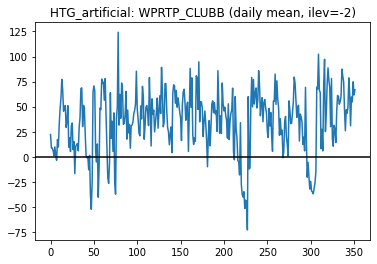

In [178]:
plt.plot(artSfc_allCases_dailyMean.WPRTP_CLUBB.values[:,1,-2,0,0])
plt.axhline(0,color='k')
plt.title('HTG_artificial: WPRTP_CLUBB (daily mean, ilev=-2)')

In [179]:
# Define classification by day... 

# Define cutoff for classifying a "dry day" [mm/day] 
prectCutoff = 1


## Now get day wet/dry classifications per case/sfc
realSfc_classArr     = np.empty([len(realSfc_allCases.case.values),    len(realSfc_allCasesDailySum.year_month_day.values)]).astype(str)
artSfc_classArr      = np.empty([len(artSfc_allCases.case.values),     len(artSfc_allCasesDailySum.year_month_day.values)]).astype(str)
artSfcMult_classArr  = np.empty([len(artSfcMult_allCases.case.values), len(artSfcMult_allCasesDailySum.year_month_day.values)]).astype(str)

for iCase in range(len(realSfc_allCases.case.values)):
    realSfc_classArr[iCase,:] = classifyPrectDays_SCAM(realSfc_allCasesDailySum.year_month_day.values, # Time array 
                                          realSfc_allCasesDailySum.PRECT_mmPerDT.values[:,iCase,:,:],  # Precip array 
                                          prectCutoff)                        # Threshold that defines wet/dry days 


for iCase in range(len(artSfc_allCases.case.values)):
    artSfc_classArr[iCase,:] = classifyPrectDays_SCAM(
                                          artSfc_allCasesDailySum.year_month_day.values, # Time array 
                                          artSfc_allCasesDailySum.PRECT_mmPerDT.values[:,iCase,:,:],  # Precip array 
                                          prectCutoff)                        # Threshold that defines wet/dry days 

    
for iCase in range(len(artSfcMult_allCases.case.values)):
    artSfcMult_classArr[iCase,:] = classifyPrectDays_SCAM(
                                          artSfcMult_allCasesDailySum.year_month_day.values, # Time array 
                                          artSfcMult_allCasesDailySum.PRECT_mmPerDT.values[:,iCase,:,:],  # Precip array 
                                          prectCutoff)                        # Threshold that defines wet/dry days 
    
    
## Add that classification to larger datasets
realSfc_allCasesDailySum['dayClass']    = (('case','year_month_day'), realSfc_classArr)
artSfc_allCasesDailySum['dayClass']     = (('case','year_month_day'), artSfc_classArr)  
artSfcMult_allCasesDailySum['dayClass'] = (('case','year_month_day'), artSfcMult_classArr)  
    


In [180]:
## Identify dates that are dry in *all* cases being assessed 

# Real surfaces 
idDry_real0 = set(np.where(realSfc_allCasesDailySum['dayClass'].values[0,:]=='dDry')[0])
idDry_real1 = set(np.where(realSfc_allCasesDailySum['dayClass'].values[1,:]=='dDry')[0])
idDry_real2 = set(np.where(realSfc_allCasesDailySum['dayClass'].values[2,:]=='dDry')[0])

# Artificial surfaces 
idDry_art0  = set(np.where(artSfc_allCasesDailySum['dayClass'].values[0,:]=='dDry')[0])
idDry_art1  = set(np.where(artSfc_allCasesDailySum['dayClass'].values[1,:]=='dDry')[0])

idDry_art2  = set(np.where(artSfcMult_allCasesDailySum['dayClass'].values[0,:]=='dDry')[0])
idDry_art3  = set(np.where(artSfcMult_allCasesDailySum['dayClass'].values[1,:]=='dDry')[0])

# Get union of all those dry days
iKeep_dDry = list(idDry_real0 & idDry_real1 & idDry_real2 &
                 idDry_art0  & idDry_art1  &
                 idDry_art2  & idDry_art3)

# Select just those days in larger arrays 
realSfc_allCasesDailySum_dDry       = realSfc_allCasesDailySum.isel(year_month_day     = iKeep_dDry)
artSfc_allCasesDailySum_dDry        = artSfc_allCasesDailySum.isel(year_month_day      = iKeep_dDry)
artSfcMult_allCasesDailySum_dDry    = artSfcMult_allCasesDailySum.isel(year_month_day  = iKeep_dDry)



In [181]:
## Identify dates that are wet in *all* cases being assessed 

# Real surfaces 
iwWet_real0 = set(np.where(realSfc_allCasesDailySum['dayClass'].values[0,:]=='wWet')[0])
iwWet_real1 = set(np.where(realSfc_allCasesDailySum['dayClass'].values[1,:]=='wWet')[0])
iwWet_real2 = set(np.where(realSfc_allCasesDailySum['dayClass'].values[2,:]=='wWet')[0])

# Artificial surfaces 
iwWet_art0  = set(np.where(artSfc_allCasesDailySum['dayClass'].values[0,:]=='wWet')[0])
iwWet_art1  = set(np.where(artSfc_allCasesDailySum['dayClass'].values[1,:]=='wWet')[0])

iwWet_art2  = set(np.where(artSfcMult_allCasesDailySum['dayClass'].values[0,:]=='wWet')[0])
iwWet_art3  = set(np.where(artSfcMult_allCasesDailySum['dayClass'].values[1,:]=='wWet')[0])

# Get union of all those dry days
iKeep_wWet = list(iwWet_real0 & iwWet_real1 & iwWet_real2 &
                 iwWet_art0  & iwWet_art1  &
                 iwWet_art2  & iwWet_art3)

# Select just those days in larger arrays 
realSfc_allCasesDailySum_wWet       = realSfc_allCasesDailySum.isel(year_month_day     = iKeep_wWet)
artSfc_allCasesDailySum_wWet        = artSfc_allCasesDailySum.isel(year_month_day      = iKeep_wWet)
artSfcMult_allCasesDailySum_wWet    = artSfcMult_allCasesDailySum.isel(year_month_day  = iKeep_wWet)



In [182]:
print('   Number of days in each category   ')
print('         HMG              HTG   ')
print('dDry: %6i %16i' % (len(realSfc_allCasesDailySum_wWet.year_month_day.values), len(realSfc_allCasesDailySum_wWet.year_month_day.values)) )
print('wWet: %6i %16i' % (len(realSfc_allCasesDailySum_wWet.year_month_day.values), len(realSfc_allCasesDailySum_wWet.year_month_day.values)) )



   Number of days in each category   
         HMG              HTG   
dDry:     86               86
wWet:     86               86


In [184]:
# Next, get all the times in the full array that line up with each of those classifications above 

dDryDays_realSfc     = getTimes_basedOnDayClass(realSfc_allCases,     realSfc_allCasesDailySum_dDry)
dDryDays_artSfc      = getTimes_basedOnDayClass(artSfc_allCases,      artSfc_allCasesDailySum_dDry)
dDryDays_artSfcMult  = getTimes_basedOnDayClass(artSfcMult_allCases,  artSfcMult_allCasesDailySum_dDry)

wWetDays_realSfc     = getTimes_basedOnDayClass(realSfc_allCases,     realSfc_allCasesDailySum_wWet)
wWetDays_artSfc      = getTimes_basedOnDayClass(artSfc_allCases,      artSfc_allCasesDailySum_wWet)
wWetDays_artSfcMult  = getTimes_basedOnDayClass(artSfcMult_allCases,  artSfcMult_allCasesDailySum_wWet)


In [185]:
## Get the same dDry and wWet dates in the forcing files 
dDryDays_obs = getTimes_basedOnDayClass(nateDS_local, realSfc_allCasesDailySum_dDry)
wWetDays_obs = getTimes_basedOnDayClass(nateDS_local, realSfc_allCasesDailySum_wWet)


In [194]:
# Get all those times in the CLM land files as well 
dDryDaysCLM_HTGreal = getTimes_basedOnDayClass(HTGclmDS_localReal, realSfc_allCasesDailySum_dDry)
wWetDaysCLM_HTGreal = getTimes_basedOnDayClass(HTGclmDS_localReal, realSfc_allCasesDailySum_wWet)

dDryDaysCLM_HMGreal = getTimes_basedOnDayClass(HMGclmDS_localReal, realSfc_allCasesDailySum_dDry)
wWetDaysCLM_HMGreal = getTimes_basedOnDayClass(HMGclmDS_localReal, realSfc_allCasesDailySum_wWet)


dDryDaysCLM_HTGart  = getTimes_basedOnDayClass(HTGclmDS_localArt, artSfc_allCasesDailySum_dDry)
wWetDaysCLM_HTGart  = getTimes_basedOnDayClass(HTGclmDS_localArt, artSfc_allCasesDailySum_wWet)

dDryDaysCLM_HMGart  = getTimes_basedOnDayClass(HMGclmDS_localArt, artSfc_allCasesDailySum_dDry)
wWetDaysCLM_HMGart  = getTimes_basedOnDayClass(HMGclmDS_localArt, artSfc_allCasesDailySum_wWet)




In [186]:
# Get all those times in the patch land files as well 
dDryDaysPatch_HTGreal = getTimes_basedOnDayClass(HTGclmDS_localRealPatch, realSfc_allCasesDailySum_dDry)
wWetDaysPatch_HTGreal = getTimes_basedOnDayClass(HTGclmDS_localRealPatch, realSfc_allCasesDailySum_wWet)

dDryDaysPatch_HMGreal = getTimes_basedOnDayClass(HMGclmDS_localRealPatch, realSfc_allCasesDailySum_dDry)
wWetDaysPatch_HMGreal = getTimes_basedOnDayClass(HMGclmDS_localRealPatch, realSfc_allCasesDailySum_wWet)


dDryDaysPatch_HTGart  = getTimes_basedOnDayClass(HTGclmDS_localArtPatch, artSfc_allCasesDailySum_dDry)
wWetDaysPatch_HTGart  = getTimes_basedOnDayClass(HTGclmDS_localArtPatch, artSfc_allCasesDailySum_wWet)

dDryDaysPatch_HMGart  = getTimes_basedOnDayClass(HMGclmDS_localArtPatch, artSfc_allCasesDailySum_dDry)
wWetDaysPatch_HMGart  = getTimes_basedOnDayClass(HMGclmDS_localArtPatch, artSfc_allCasesDailySum_wWet)




In [34]:
# ## Save an array of wet/dry days to pickle file for use later 
# saveDir = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/FinalOption/ProcessedFiles/'

# pickle.dump( artSfc_allCasesDailySum_dDry, open( saveDir+"artSfc_allCasesDailySum_dDry.p", "wb" ) )
# pickle.dump( artSfc_allCasesDailySum_wWet, open( saveDir+"artSfc_allCasesDailySum_wWet.p", "wb" ) )


**Now get hourly means/std as well**

In [187]:
hourlyMean_dDry_realSfc    = dDryDays_realSfc.groupby("time.hour").mean(dim="time")
hourlyMean_dDry_artSfc     = dDryDays_artSfc.groupby("time.hour").mean(dim="time")
hourlyMean_dDry_artSfcMult = dDryDays_artSfcMult.groupby("time.hour").mean(dim="time")

hourlyMean_wWet_realSfc    = wWetDays_realSfc.groupby("time.hour").mean(dim="time")
hourlyMean_wWet_artSfc     = wWetDays_artSfc.groupby("time.hour").mean(dim="time")
hourlyMean_wWet_artSfcMult = wWetDays_artSfcMult.groupby("time.hour").mean(dim="time")
print('Computed hourly means for all surfaces + cases')


hourlyStd_dDry_realSfc    = dDryDays_realSfc.groupby("time.hour").std(dim="time")
hourlyStd_dDry_artSfc     = dDryDays_artSfc.groupby("time.hour").std(dim="time")
hourlyStd_dDry_artSfcMult = dDryDays_artSfcMult.groupby("time.hour").std(dim="time")

hourlyStd_wWet_realSfc    = wWetDays_realSfc.groupby("time.hour").std(dim="time")
hourlyStd_wWet_artSfc     = wWetDays_artSfc.groupby("time.hour").std(dim="time")
hourlyStd_wWet_artSfcMult = wWetDays_artSfcMult.groupby("time.hour").std(dim="time")
print('Computed hourly std for all surfaces + cases')


Computed hourly means for all surfaces + cases
Computed hourly std for all surfaces + cases


In [195]:
# And CLMvariables for mean
hourlyMeanCLM_dDry_HMGreal = dDryDaysCLM_HMGreal.groupby("time.hour").mean()
hourlyMeanCLM_dDry_HTGreal = dDryDaysCLM_HTGreal.groupby("time.hour").mean()

hourlyMeanCLM_wWet_HMGreal = wWetDaysCLM_HMGreal.groupby("time.hour").mean()
hourlyMeanCLM_wWet_HTGreal = wWetDaysCLM_HTGreal.groupby("time.hour").mean()


hourlyMeanCLM_dDry_HMGart = dDryDaysCLM_HMGart.groupby("time.hour").mean()
hourlyMeanCLM_dDry_HTGart = dDryDaysCLM_HTGart.groupby("time.hour").mean()

hourlyMeanCLM_wWet_HMGart = wWetDaysCLM_HMGart.groupby("time.hour").mean()
hourlyMeanCLM_wWet_HTGart = wWetDaysCLM_HTGart.groupby("time.hour").mean()

In [188]:
# And patch-specific variables for mean
hourlyMeanPatch_dDry_HMGreal = dDryDaysPatch_HMGreal.groupby("time.hour").mean()
hourlyMeanPatch_dDry_HTGreal = dDryDaysPatch_HTGreal.groupby("time.hour").mean()

hourlyMeanPatch_wWet_HMGreal = wWetDaysPatch_HMGreal.groupby("time.hour").mean()
hourlyMeanPatch_wWet_HTGreal = wWetDaysPatch_HTGreal.groupby("time.hour").mean()


hourlyMeanPatch_dDry_HMGart = dDryDaysPatch_HMGart.groupby("time.hour").mean()
hourlyMeanPatch_dDry_HTGart = dDryDaysPatch_HTGart.groupby("time.hour").mean()

hourlyMeanPatch_wWet_HMGart = wWetDaysPatch_HMGart.groupby("time.hour").mean()
hourlyMeanPatch_wWet_HTGart = wWetDaysPatch_HTGart.groupby("time.hour").mean()


# And patch-specific variables for std 
hourlyStdPatch_dDry_HTGreal = dDryDaysPatch_HTGreal.groupby("time.hour").std(dim="time")
hourlyStdPatch_wWet_HTGreal = wWetDaysPatch_HTGreal.groupby("time.hour").std(dim="time")

hourlyStdPatch_dDry_HMGreal = dDryDaysPatch_HMGreal.groupby("time.hour").std(dim="time")
hourlyStdPatch_wWet_HMGreal = wWetDaysPatch_HMGreal.groupby("time.hour").std(dim="time")


hourlyStdPatch_dDry_HTGart = dDryDaysPatch_HTGart.groupby("time.hour").std(dim="time")
hourlyStdPatch_wWet_HTGart = wWetDaysPatch_HTGart.groupby("time.hour").std(dim="time")

hourlyStdPatch_dDry_HMGart = dDryDaysPatch_HMGart.groupby("time.hour").std(dim="time")
hourlyStdPatch_wWet_HMGart = wWetDaysPatch_HMGart.groupby("time.hour").std(dim="time")



In [189]:
# Get number of obs going into those hourly means (for error bars)
nTimes_dDry   = np.full([24], np.nan)
nTimes_wWet   = np.full([24], np.nan)

for iHr in range(24): 
    nTimes_dDry[iHr]  = len(np.where(dDryDays_realSfc["time.hour"]==iHr)[0])
    nTimes_wWet[iHr]  = len(np.where(wWetDays_realSfc["time.hour"]==iHr)[0])

hourlyMean_dDry_realSfc['SampleCount']       = (('hour'), nTimes_dDry)
hourlyMean_dDry_artSfc['SampleCount']        = (('hour'), nTimes_dDry)
hourlyMean_dDry_artSfcMult['SampleCount']    = (('hour'), nTimes_dDry)

hourlyMean_wWet_realSfc['SampleCount']       = (('hour'), nTimes_wWet)
hourlyMean_wWet_artSfc['SampleCount']        = (('hour'), nTimes_wWet)
hourlyMean_wWet_artSfcMult['SampleCount']    = (('hour'), nTimes_wWet)



In [190]:
hourlyMean_dDry_Obs  = dDryDays_obs.groupby("time.hour").mean()
hourlyMean_wWet_Obs  = wWetDays_obs.groupby("time.hour").mean()

hourlyStd_dDry_Obs  = dDryDays_obs.groupby("time.hour").std(dim='time')
hourlyStd_wWet_Obs  = wWetDays_obs.groupby("time.hour").std(dim='time')

hourlyMean_dDry_Obs['SampleCount']       = (('hour'), nTimes_dDry)
hourlyMean_wWet_Obs['SampleCount']       = (('hour'), nTimes_dDry)


## Make some plots 

**Aside: plot the surface diurnal cycles of T2m and Q2m**

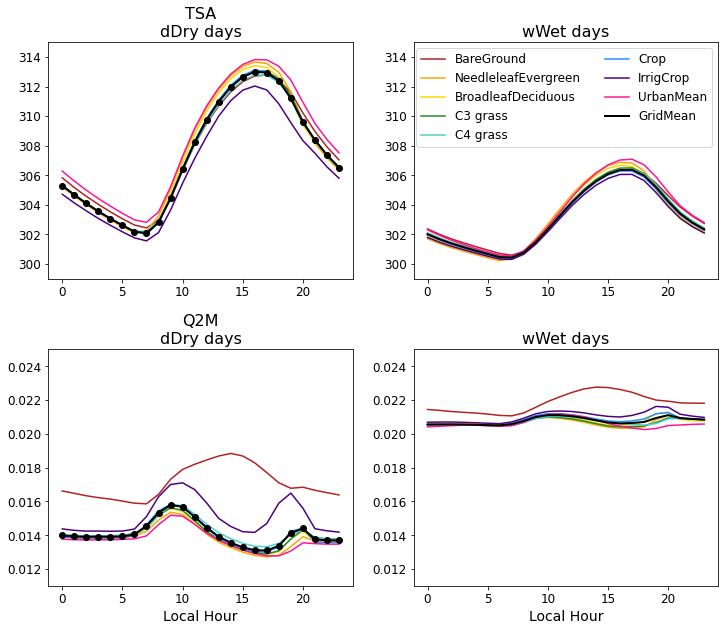

In [217]:
## Figure for manuscript

varSel = np.asarray(['TSA','Q2M'])

fig,axs = plt.subplots(len(varSel),2, figsize=(12,10))
axs     = axs.ravel()
fig.subplots_adjust(hspace = 0.3)

lineColors = np.asarray(['firebrick','orange','gold','forestgreen','mediumturquoise','dodgerblue','indigo','deeppink'])

yMax = np.asarray([315, 0.025])
yMin = np.asarray([299, 0.011])

iPlot=0
for iVar in range(len(varSel)):
    ## Get urban mean
    iUrban = np.where((colType>=70) & (colType<80))[0]

    varSel_urban_dDry = np.nansum(hourlyMeanPatch_dDry_HTGreal[varSel[iVar]].values[:, iUrban]*PFTwgt[iUrban], axis=1)/np.nansum(PFTwgt[iUrban])
    varSel_urban_wWet = np.nansum(hourlyMeanPatch_wWet_HTGreal[varSel[iVar]].values[:, iUrban]*PFTwgt[iUrban], axis=1)/np.nansum(PFTwgt[iUrban])

    nPatches = len(patchLabels)-len(iUrban)
    
    for iPatch in range(nPatches):
        axs[iPlot].plot(hourlyMeanPatch_dDry_HTGreal.hour.values, 
                        np.squeeze(hourlyMeanPatch_dDry_HTGreal[varSel[iVar]].values[:, iPatch]),
                        '-', color=lineColors[iPatch], label=patchLabels[iPatch])
        
        axs[iPlot+1].plot(hourlyMeanPatch_wWet_HTGreal.hour.values, 
                        np.squeeze(hourlyMeanPatch_wWet_HTGreal[varSel[iVar]].values[:, iPatch]),
                        '-', color=lineColors[iPatch], label=patchLabels[iPatch])
    
    axs[iPlot].plot(hourlyMeanCLM_dDry_HTGreal.hour.values, varSel_urban_dDry,
             '-',color=lineColors[-1],label='UrbanMean')
    axs[iPlot+1].plot(hourlyMeanCLM_wWet_HTGreal.hour.values, varSel_urban_wWet,
             '-',color=lineColors[-1],label='UrbanMean')
    
    
    ## dDry days 
    axs[iPlot].plot(hourlyMeanCLM_dDry_HTGreal.hour.values, hourlyMeanCLM_dDry_HTGreal[varSel[iVar]].values, 'k-o',linewidth=2,label='GridMean')
    axs[iPlot].set_title(varSel[iVar]+'\ndDry days',fontsize=16)
    axs[iPlot].set_ylim([yMin[iVar], yMax[iVar]])


    ## wWet days 
    axs[iPlot+1].plot(hourlyMeanCLM_wWet_HTGreal.hour.values, hourlyMeanCLM_wWet_HTGreal[varSel[iVar]].values, 'k-',linewidth=2,label='GridMean')
    axs[iPlot+1].set_title('\nwWet days',fontsize=16)
    axs[iPlot+1].set_ylim([yMin[iVar], yMax[iVar]])
    
    if iVar==0:
        axs[iPlot+1].legend(fontsize=12,ncol=2)
    
    if iVar==(len(varSel)-1):
        axs[iPlot].set_xlabel('Local Hour', fontsize=14)
        axs[iPlot+1].set_xlabel('Local Hour', fontsize=14)
        
        
    axs[iPlot+0].tick_params(axis='both', labelsize= 12)
    axs[iPlot+1].tick_params(axis='both', labelsize= 12)

    iPlot = iPlot+2


# axs[0].grid()
# axs[1].grid()



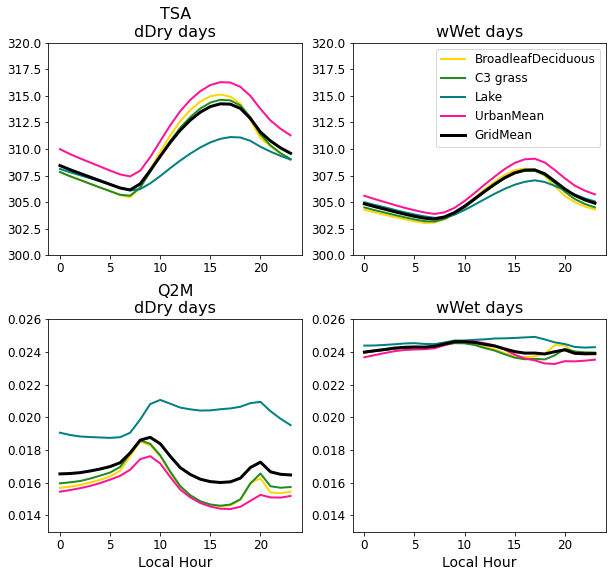

In [219]:
## Figure for manuscript

varSel = np.asarray(['TSA','Q2M'])

fig,axs = plt.subplots(len(varSel),2, figsize=(10,9))
axs     = axs.ravel()
fig.subplots_adjust(hspace = 0.3)


yMax = np.asarray([320, 0.026])
yMin = np.asarray([300, 0.013])

PFTwgt_art  = HTGclmDS_localArtPatch.pfts1d_wtgcell.values
colType_art = HTGclmDS_localArtPatch.pfts1d_itype_col.values


iPlot=0
for iVar in range(len(varSel)):
    ## Get urban mean
    iUrban = np.where((colType_art>=70) & (colType_art<80))[0]

    varSel_urban_dDry = np.nansum(hourlyMeanPatch_dDry_HTGart[varSel[iVar]].values[:, iUrban]*PFTwgt_art[iUrban], axis=1)/np.nansum(PFTwgt_art[iUrban])
    varSel_urban_wWet = np.nansum(hourlyMeanPatch_wWet_HTGart[varSel[iVar]].values[:, iUrban]*PFTwgt_art[iUrban], axis=1)/np.nansum(PFTwgt_art[iUrban])

    ## dDry days 
    axs[iPlot].plot(hourlyMeanPatch_dDry_HTGart.hour.values, np.squeeze(hourlyMeanPatch_dDry_HTGart[varSel[iVar]].values[:, 0]),
             '-', color='gold',linewidth=2, label=patchLabels_art[0])
    axs[iPlot].plot(hourlyMeanPatch_dDry_HTGart.hour.values, np.squeeze(hourlyMeanPatch_dDry_HTGart[varSel[iVar]].values[:, 1]),
             '-',color='forestgreen',linewidth=2, label=patchLabels_art[1])
    axs[iPlot].plot(hourlyMeanPatch_dDry_HTGart.hour.values, np.squeeze(hourlyMeanPatch_dDry_HTGart[varSel[iVar]].values[:, -1]),
             '-',color='teal',linewidth=2,label=patchLabels_art[-1])
    axs[iPlot].plot(hourlyMeanCLM_dDry_HTGart.hour.values, varSel_urban_dDry,
             '-',color='deeppink',linewidth=2,label='UrbanMean')
    axs[iPlot].plot(hourlyMeanCLM_dDry_HTGart.hour.values, hourlyMeanCLM_dDry_HTGart[varSel[iVar]].values, 
                    'k-',linewidth=3,label='GridMean')
    
#     axs[iPlot].set_title(HTGclmDS_patch_local[varSel[iVar]].long_name+'\ndDry days')
    axs[iPlot].set_title(varSel[iVar]+'\ndDry days',fontsize=16)
    axs[iPlot].set_ylim([yMin[iVar], yMax[iVar]])


    ## wWet days 
    axs[iPlot+1].plot(hourlyMeanPatch_wWet_HTGart.hour.values, np.squeeze(hourlyMeanPatch_wWet_HTGart[varSel[iVar]].values[:, 0]),
             color='gold',linewidth=2,label=patchLabels_art[0])
    axs[iPlot+1].plot(hourlyMeanPatch_wWet_HTGart.hour.values, np.squeeze(hourlyMeanPatch_wWet_HTGart[varSel[iVar]].values[:, 1]),
             color='forestgreen',linewidth=2,label=patchLabels_art[1])
    axs[iPlot+1].plot(hourlyMeanPatch_wWet_HTGart.hour.values, np.squeeze(hourlyMeanPatch_wWet_HTGart[varSel[iVar]].values[:, -1]),
             color='teal',linewidth=2,label=patchLabels_art[-1])
    axs[iPlot+1].plot(hourlyMeanCLM_wWet_HTGart.hour.values, varSel_urban_wWet,
             color='deeppink',linewidth=2,label='UrbanMean')
    axs[iPlot+1].plot(hourlyMeanCLM_wWet_HTGart.hour.values, hourlyMeanCLM_wWet_HTGart[varSel[iVar]].values, 
                      'k-',linewidth=3,label='GridMean')
    axs[iPlot+1].set_title('\nwWet days',fontsize=16)
    axs[iPlot+1].set_ylim([yMin[iVar], yMax[iVar]])
    
    if iVar==0:
        axs[iPlot+1].legend(fontsize=12)

#     axs[iPlot+0].grid()
#     axs[iPlot+1].grid()
    
    if iVar==(len(varSel)-1):
        axs[iPlot].set_xlabel('Local Hour', fontsize=14)
        axs[iPlot+1].set_xlabel('Local Hour', fontsize=14)

    axs[iPlot+0].tick_params(axis='both', labelsize= 12)
    axs[iPlot+1].tick_params(axis='both', labelsize= 12)
    
    iPlot = iPlot+2


# axs[0].grid()
# axs[1].grid()
# axs[2].grid()
# axs[3].grid()


**Now return focus to atmospheric variables again**

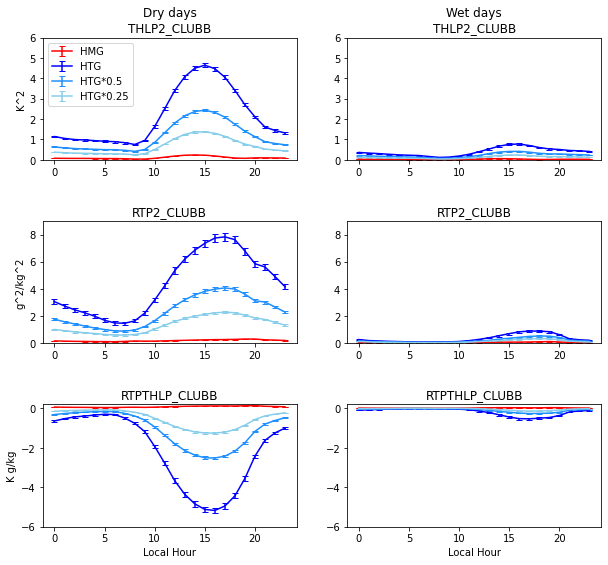

In [135]:
varSel=np.asarray(['THLP2_CLUBB','RTP2_CLUBB','RTPTHLP_CLUBB'])

yMax = np.asarray([6.0, 9.0,  0.2])
yMin = np.asarray([0.0, 0.0, -6.0])

diurnalCycle_sfcVars(varSel, 'artificial',
                    yMin, yMax)

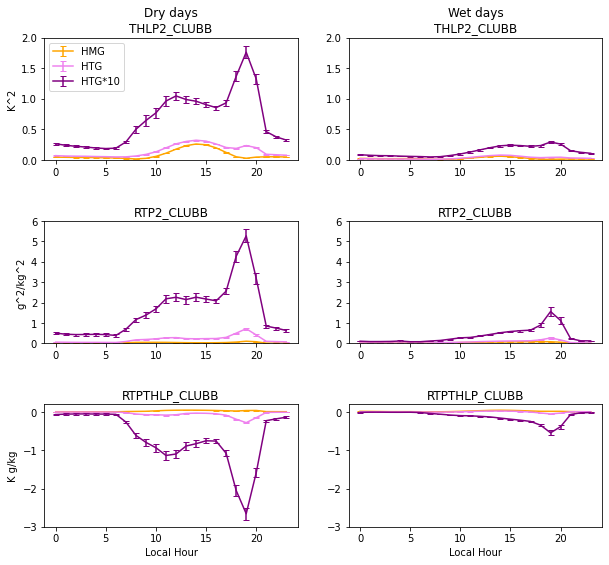

In [136]:
varSel=np.asarray(['THLP2_CLUBB','RTP2_CLUBB','RTPTHLP_CLUBB'])

yMax = np.asarray([2.0, 6.0,  0.2])
yMin = np.asarray([0.0, 0.0, -3.0])

diurnalCycle_sfcVars(varSel, 'real',
                    yMin, yMax)

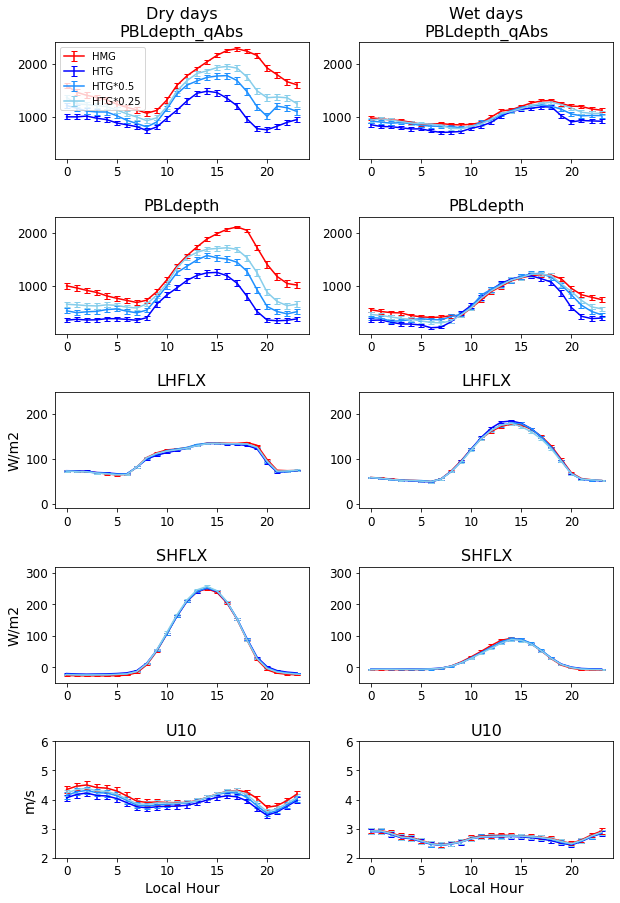

In [238]:
varSel = np.asarray(['PBLdepth_qAbs','PBLdepth','LHFLX','SHFLX','U10'])

yMax = np.asarray([2400,2300, 250,  320,  6])
yMin = np.asarray([200,  100, -10,  -50,  2])
diurnalCycle_sfcVars(varSel, 'artificial',
                     yMin, yMax)


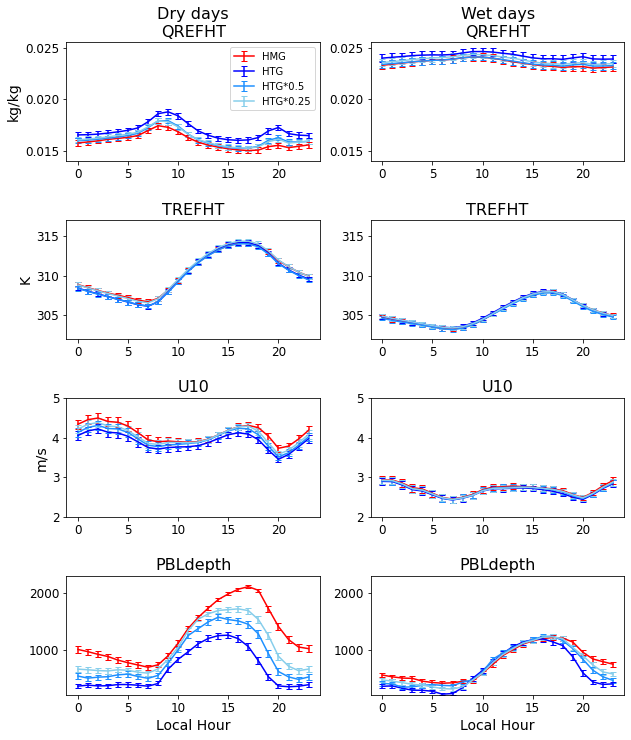

In [250]:
varSel = np.asarray(['QREFHT','TREFHT','U10','PBLdepth'])

yMax = np.asarray([0.0255, 317, 5, 2300])
yMin = np.asarray([0.014,  302, 2,  200])

diurnalCycle_sfcVars(varSel, 'artificial',
                     yMin, yMax)


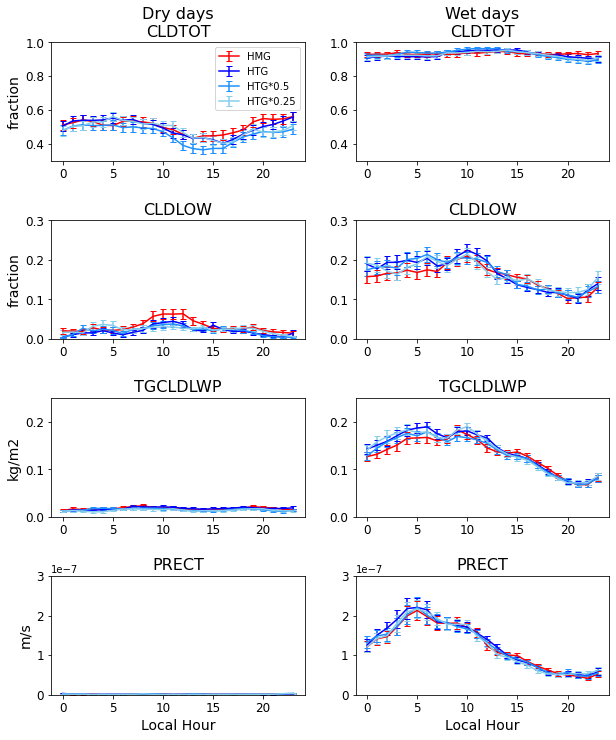

In [240]:
varSel = np.asarray(['CLDTOT','CLDLOW','TGCLDLWP','PRECT'])

yMax = np.asarray([1.0, 0.3, 0.25, 0.3e-6])
yMin = np.asarray([0.3, 0.0, 0.0,  0.0])

diurnalCycle_sfcVars(varSel, 'artificial',
                     yMin, yMax)


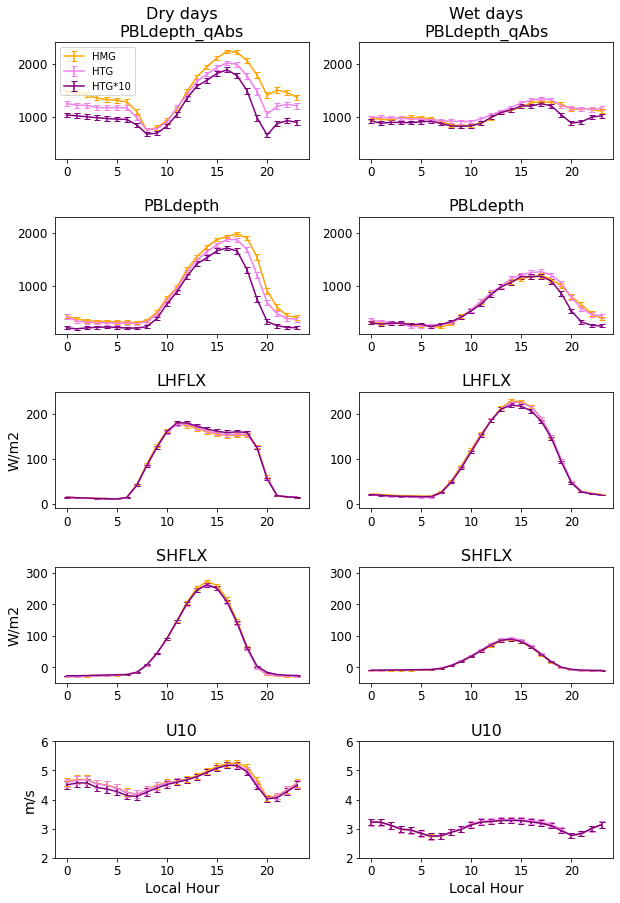

In [241]:
varSel = np.asarray(['PBLdepth_qAbs','PBLdepth','LHFLX','SHFLX','U10'])

yMax = np.asarray([2400,2300, 250,  320,  6])
yMin = np.asarray([200,  100, -10,  -50,  2])

diurnalCycle_sfcVars(varSel, 'real',
                     yMin, yMax)


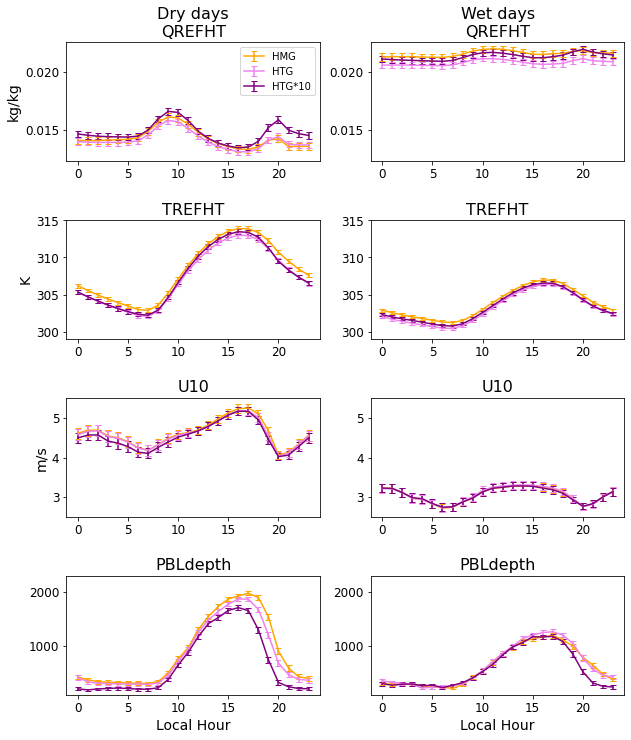

In [252]:
varSel = np.asarray(['QREFHT','TREFHT','U10','PBLdepth'])

yMax = np.asarray([0.0225, 315, 5.5, 2300])
yMin = np.asarray([0.0123, 299, 2.5,  100])

diurnalCycle_sfcVars(varSel, 'real',
                     yMin, yMax)


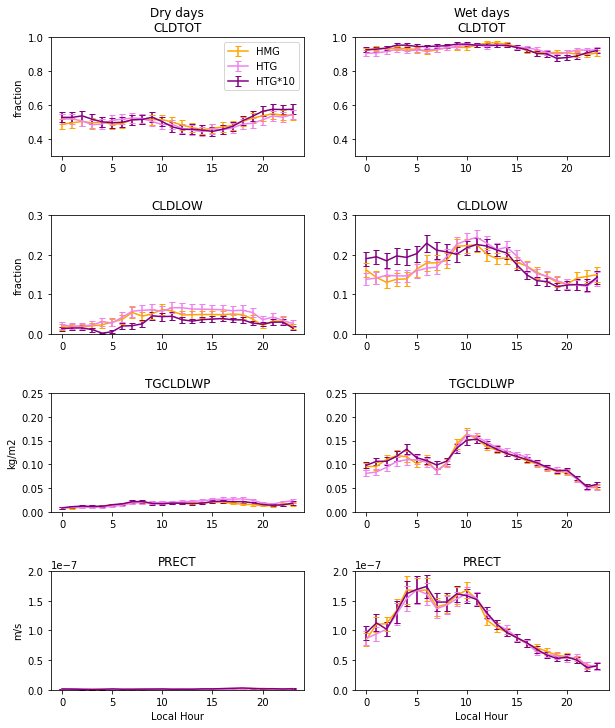

In [160]:
varSel = np.asarray(['CLDTOT','CLDLOW','TGCLDLWP','PRECT'])

yMax = np.asarray([1.0, 0.3, 0.25, 0.2e-6])
yMin = np.asarray([0.3, 0.0, 0.0,  0.0])

diurnalCycle_sfcVars(varSel, 'real',
                     yMin, yMax)


**Atmospheric profiles averaged over some set of hours**

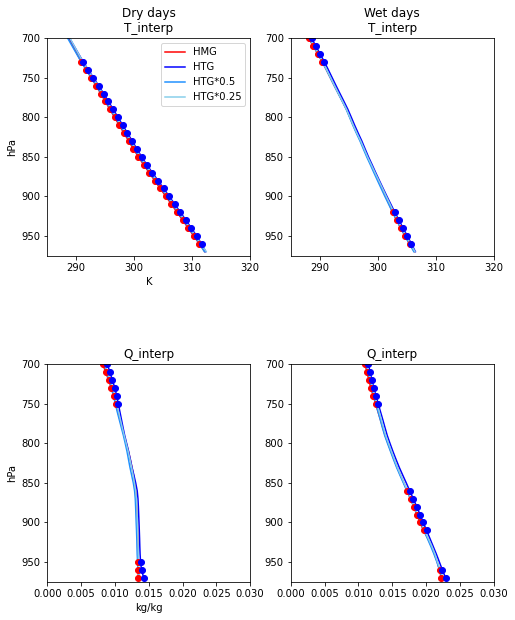

In [32]:
sfcType = 'artificial'
listVars = np.asarray(['T_interp','Q_interp'])
startHr = 14
endHr   = 16
lowLev  = 975
highLev = 700
xMin    = np.asarray([285, 0.0])
xMax    = np.asarray([320, 0.03])

plotProfiles_meanOverHours(listVars, sfcType,
                           startHr, endHr, 
                           lowLev, highLev,
                           xMin, xMax)

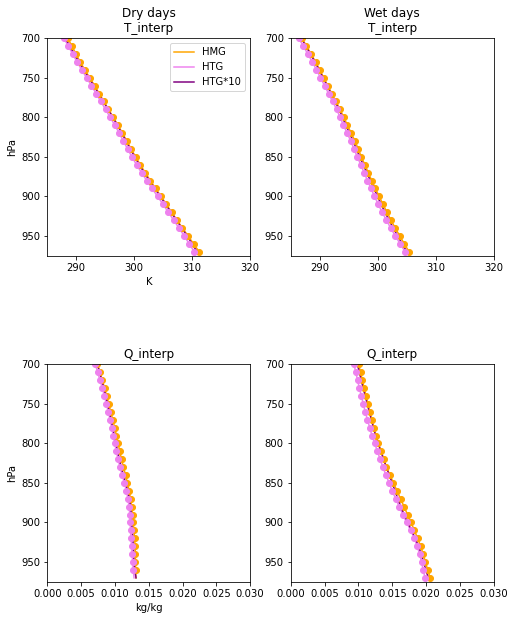

In [128]:
sfcType = 'real'
listVars = np.asarray(['T_interp','Q_interp'])
startHr = 14
endHr   = 16
lowLev  = 975
highLev = 700
xMin    = np.asarray([285, 0.0])
xMax    = np.asarray([320, 0.03])

plotProfiles_meanOverHours(listVars, sfcType,
                           startHr, endHr, 
                           lowLev, highLev,
                           xMin, xMax)

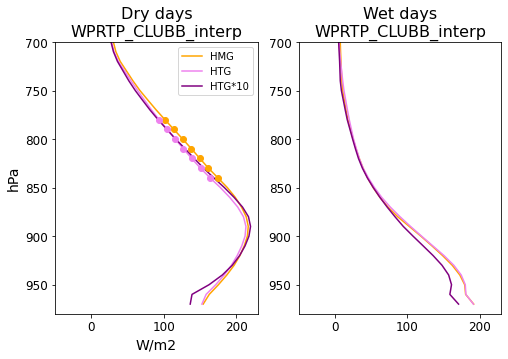

In [344]:
sfcType = 'real'
listVars = np.asarray(['WPRTP_CLUBB_interp'])
startHr = 14
endHr   = 17
lowLev  = 980
highLev = 700
xMin    = np.asarray([ -50, ])
xMax    = np.asarray([ 230])

plotProfiles_meanOverHours(listVars, sfcType,
                               startHr, endHr, 
                               lowLev, highLev,
                               xMin, xMax)

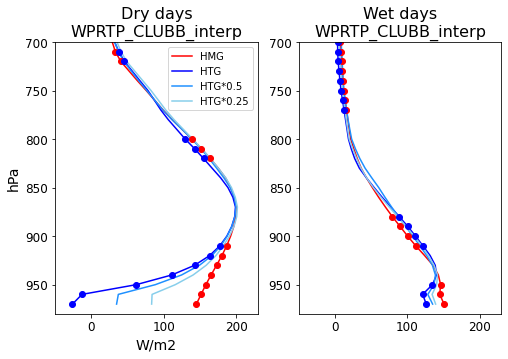

In [343]:
sfcType = 'artificial'
listVars = np.asarray(['WPRTP_CLUBB_interp'])
startHr = 14
endHr   = 17
lowLev  = 980
highLev = 700
xMin    = np.asarray([ -50, ])
xMax    = np.asarray([ 230])

plotProfiles_meanOverHours(listVars, sfcType,
                               startHr, endHr, 
                               lowLev, highLev,
                               xMin, xMax)

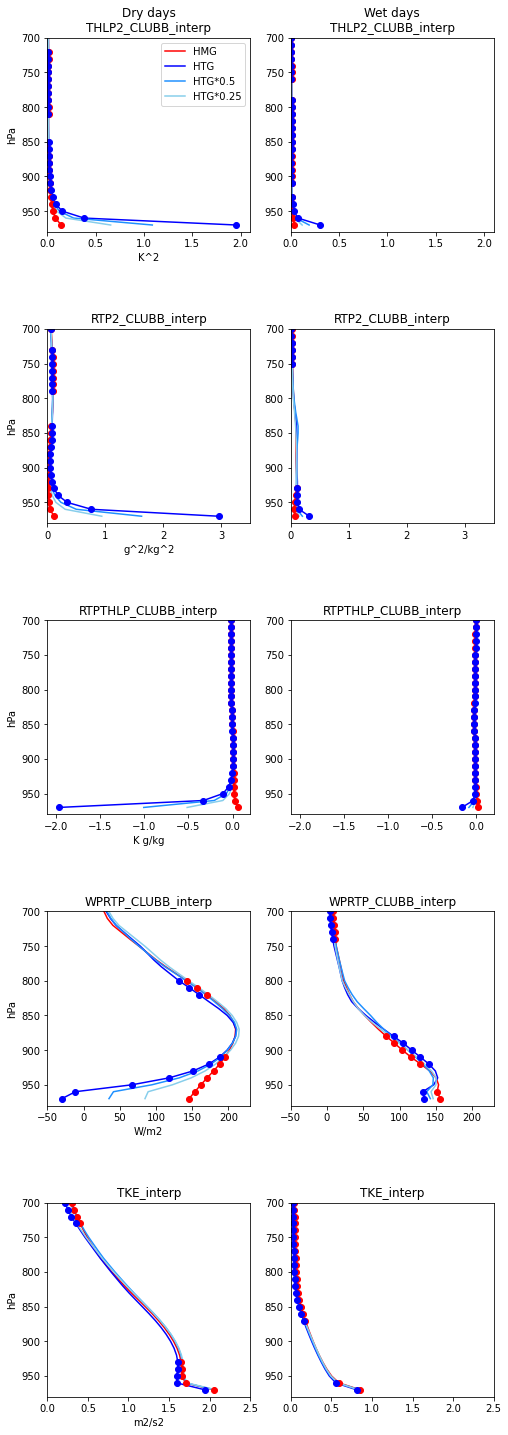

In [339]:
sfcType = 'artificial'
listVars = np.asarray(['THLP2_CLUBB_interp','RTP2_CLUBB_interp','RTPTHLP_CLUBB_interp',
                       'WPRTP_CLUBB_interp','TKE_interp'])
startHr = 14
endHr   = 16
lowLev  = 980
highLev = 700
xMin    = np.asarray([0,   0,   -2.1, -50, 0])
xMax    = np.asarray([2.1, 3.5, 0.2,  230, 2.5])

plotProfiles_meanOverHours(listVars, sfcType,
                               startHr, endHr, 
                               lowLev, highLev,
                               xMin, xMax)

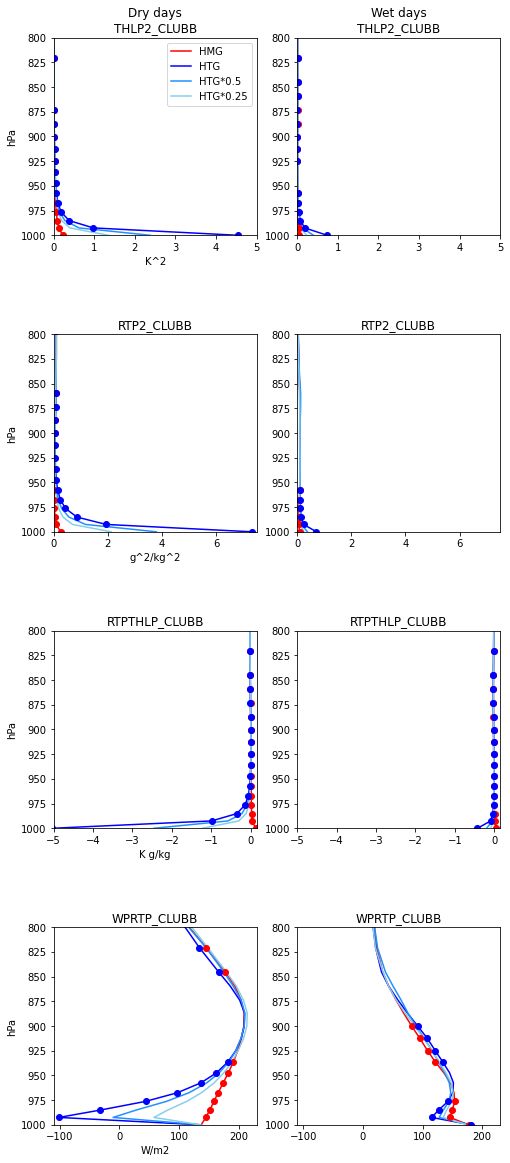

In [338]:
sfcType = 'artificial'
listVars = np.asarray(['THLP2_CLUBB','RTP2_CLUBB','RTPTHLP_CLUBB','WPRTP_CLUBB'])
startHr = 14
endHr   = 16
lowLev  = 1000
highLev = 800
xMin    = np.asarray([0,   0,   -5, -110])
xMax    = np.asarray([5, 7.5, 0.15,  230])

plotProfiles_meanOverHours(listVars, sfcType,
                               startHr, endHr, 
                               lowLev, highLev,
                               xMin, xMax)

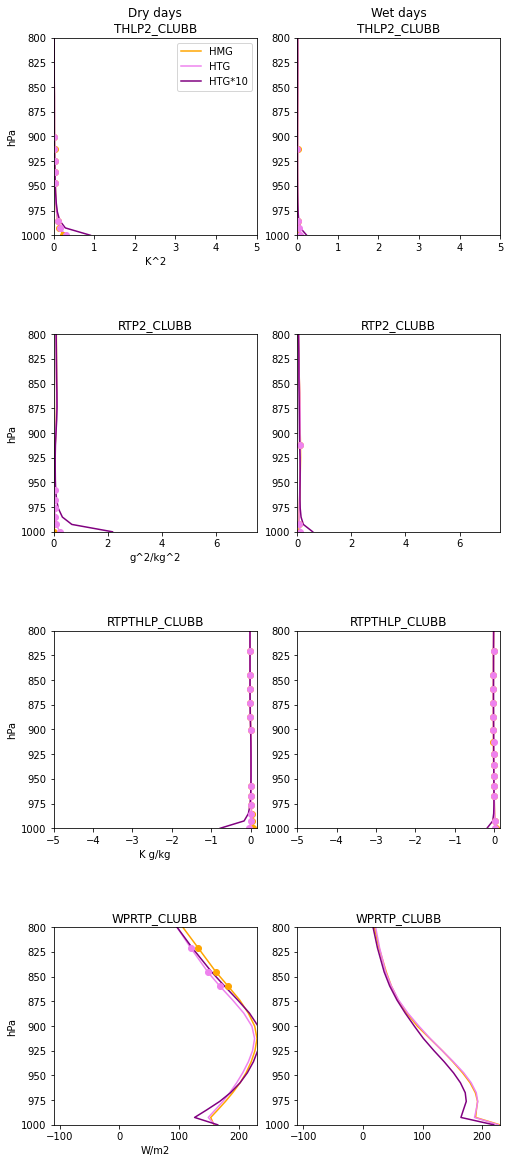

In [34]:
sfcType = 'real'
listVars = np.asarray(['THLP2_CLUBB','RTP2_CLUBB','RTPTHLP_CLUBB','WPRTP_CLUBB'])
startHr = 14
endHr   = 16
lowLev  = 1000
highLev = 800
xMin    = np.asarray([0,   0,   -5, -110])
xMax    = np.asarray([5, 7.5, 0.15,  230])

plotProfiles_meanOverHours(listVars, sfcType,
                               startHr, endHr, 
                               lowLev, highLev,
                               xMin, xMax)

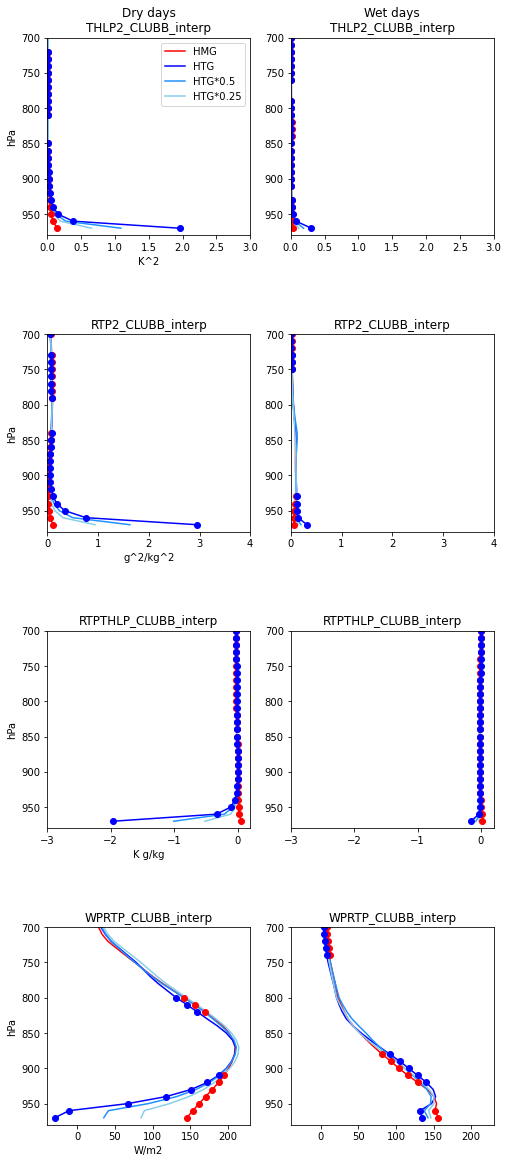

In [35]:
sfcType = 'artificial'
listVars = np.asarray(['THLP2_CLUBB_interp',
                       'RTP2_CLUBB_interp',
                       'RTPTHLP_CLUBB_interp',
                       'WPRTP_CLUBB_interp'])
startHr = 14
endHr   = 16
lowLev  = 980
highLev = 700

xMin    = np.asarray([0,   0,   -3,  -40])
xMax    = np.asarray([3,   4,  0.2,  230])

plotProfiles_meanOverHours(listVars, sfcType,
                               startHr, endHr, 
                               lowLev, highLev,
                               xMin, xMax)


In [346]:
## Plot budget terms 

def wprtp_budget_plot(HMGds,HTGds,startHr,endHr,xmax,xmin):
    
    # ------- dDry days ----------
    iTimeSel_dDryHMG = np.where((HMGds["time.hour"].values>=startHr) & 
                                (HMGds["time.hour"].values<=endHr))[0]
    iTimeSel_dDryHTG = np.where((HTGds["time.hour"].values>=startHr) & 
                                (HTGds["time.hour"].values<=endHr))[0]


    hourlyMean_dDryTimeSel_HMG = HMGds.isel(time=iTimeSel_dDryHMG).mean(dim='time')
    hourlyMean_dDryTimeSel_HTG = HTGds.isel(time=iTimeSel_dDryHTG).mean(dim='time')


    print('Means computed over the inclusive period of %i to %i.' % (startHr, endHr))


    meanAdvHMG        = hourlyMean_dDryTimeSel_HMG['wprtp_ma'].values[:,0,0]
    turbTranspHMG     = hourlyMean_dDryTimeSel_HMG['wprtp_ta'].values[:,0,0]
    turbProdHMG       = hourlyMean_dDryTimeSel_HMG['wprtp_tp'].values[:,0,0]
    accumHMG          = hourlyMean_dDryTimeSel_HMG['wprtp_ac'].values[:,0,0]
    buoyProdHMG       = hourlyMean_dDryTimeSel_HMG['wprtp_bp'].values[:,0,0]
    press1HMG         = hourlyMean_dDryTimeSel_HMG['wprtp_pr1'].values[:,0,0]
    press2HMG         = hourlyMean_dDryTimeSel_HMG['wprtp_pr2'].values[:,0,0]
    press3HMG         = hourlyMean_dDryTimeSel_HMG['wprtp_pr3'].values[:,0,0]
    pressureApproxHMG = press1HMG+press2HMG+press3HMG
    dissipationHMG    = hourlyMean_dDryTimeSel_HMG['wprtp_dp1'].values[:,0,0]

    dwprtpdtHMG = hourlyMean_dDryTimeSel_HMG['wprtp_bt'].values[:,0,0]
    sumTermsHMG = meanAdvHMG + turbTranspHMG + turbProdHMG + accumHMG + buoyProdHMG + pressureApproxHMG + dissipationHMG

    residualHMG = dwprtpdtHMG - sumTermsHMG


    meanAdvHTG        = hourlyMean_dDryTimeSel_HTG['wprtp_ma'].values[:,0,0]
    turbTranspHTG     = hourlyMean_dDryTimeSel_HTG['wprtp_ta'].values[:,0,0]
    turbProdHTG       = hourlyMean_dDryTimeSel_HTG['wprtp_tp'].values[:,0,0]
    accumHTG          = hourlyMean_dDryTimeSel_HTG['wprtp_ac'].values[:,0,0]
    buoyProdHTG       = hourlyMean_dDryTimeSel_HTG['wprtp_bp'].values[:,0,0]
    press1HTG         = hourlyMean_dDryTimeSel_HTG['wprtp_pr1'].values[:,0,0]
    press2HTG         = hourlyMean_dDryTimeSel_HTG['wprtp_pr2'].values[:,0,0]
    press3HTG         = hourlyMean_dDryTimeSel_HTG['wprtp_pr3'].values[:,0,0]
    pressureApproxHTG = press1HTG+press2HTG+press3HTG
    dissipationHTG    = hourlyMean_dDryTimeSel_HTG['wprtp_dp1'].values[:,0,0]

    dwprtpdtHTG = hourlyMean_dDryTimeSel_HTG['wprtp_bt'].values[:,0,0]
    sumTermsHTG = meanAdvHTG + turbTranspHTG + turbProdHTG + accumHTG + buoyProdHTG + pressureApproxHTG + dissipationHTG

    residualHTG = dwprtpdtHTG - sumTermsHTG
    
    
    fig,axs = plt.subplots(1,2, figsize=(10,4))
    axs = axs.ravel()

    colorsList = np.asarray(['firebrick','sandybrown','olivedrab','limegreen','lightseagreen','royalblue','darkviolet'])

    axs[0].plot(meanAdvHMG[0:-1],        HMGds.ilev.values[0:-1], color=colorsList[0], label='meanAdv')
    axs[0].plot(turbTranspHMG[0:-1],     HMGds.ilev.values[0:-1], color=colorsList[1], label='turbTransp')
    axs[0].plot(turbProdHMG[0:-1],       HMGds.ilev.values[0:-1], color=colorsList[2], label='turbProd')
    axs[0].plot(accumHMG[0:-1],          HMGds.ilev.values[0:-1], color=colorsList[3], label='accum')
    axs[0].plot(buoyProdHMG[0:-1],       HMGds.ilev.values[0:-1], color=colorsList[4], label='buoyProd')
    axs[0].plot(pressureApproxHMG[0:-1], HMGds.ilev.values[0:-1], color=colorsList[5], label='pressureTerms')
    axs[0].plot(dissipationHMG[0:-1],    HMGds.ilev.values[0:-1], color=colorsList[6], label='dissipation')
    # axs[0].plot(residualHMG[0:-1],       HMGcamDS_local.ilev.values[0:-1],'ko-', label='residual')

    axs[1].plot(meanAdvHTG[0:-1],        HTGds.ilev.values[0:-1], color=colorsList[0], label='meanAdv')
    axs[1].plot(turbTranspHTG[0:-1],     HTGds.ilev.values[0:-1], color=colorsList[1], label='turbTransp')
    axs[1].plot(turbProdHTG[0:-1],       HTGds.ilev.values[0:-1], color=colorsList[2], label='turbProd')
    axs[1].plot(accumHTG[0:-1],          HTGds.ilev.values[0:-1], color=colorsList[3], label='accum')
    axs[1].plot(buoyProdHTG[0:-1],       HTGds.ilev.values[0:-1], color=colorsList[4], label='buoyProd')
    axs[1].plot(pressureApproxHTG[0:-1], HTGds.ilev.values[0:-1], color=colorsList[5], label='pressureTerms')
    axs[1].plot(dissipationHTG[0:-1],    HTGds.ilev.values[0:-1], color=colorsList[6], label='dissipation')
    # axs[0].plot(residualHMG[0:-1],       HMGcamDS_local.ilev.values[0:-1],'ko-', label='residual')


    # Consistent settings across subplots 
    axs[0].set_ylim([800,1000])
    axs[0].set_xlim([xmin,xmax])
    axs[0].invert_yaxis()
    axs[0].legend()
    axs[0].set_title('HMG wprtp budget')

    axs[1].set_ylim([800,1000])
    axs[1].set_xlim([xmin,xmax])
    axs[1].invert_yaxis()
    axs[1].legend()
    axs[1].set_title('HTG wprtp budget')

    return



Means computed over the inclusive period of 14 to 17.


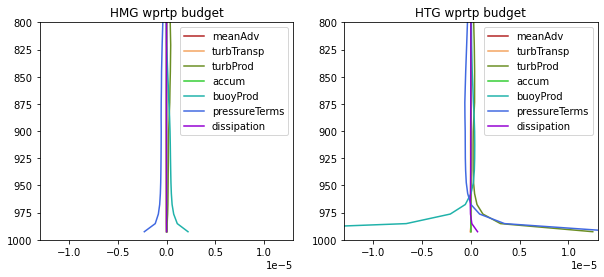

In [350]:
wprtp_budget_plot(dDryDays_artSfc.isel(case=0),dDryDays_artSfc.isel(case=1),
                  14,17,
                  1.3e-5,-1.3e-5)

Means computed over the inclusive period of 14 to 17.


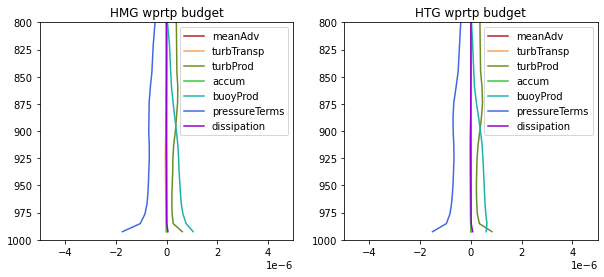

In [352]:
wprtp_budget_plot(dDryDays_realSfc.isel(case=0),dDryDays_realSfc.isel(case=1),
                  14,17,
                  0.5e-5,-0.5e-5)

Means computed over the inclusive period of 14 to 17.


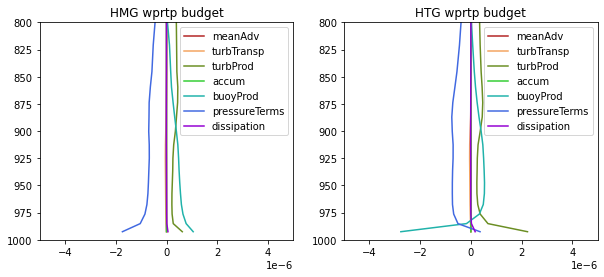

In [353]:
wprtp_budget_plot(dDryDays_realSfc.isel(case=0),dDryDays_realSfc.isel(case=2),
                  14,17,
                  0.5e-5,-0.5e-5)

**Contour plots**

In [321]:
def plotTimeHeightDifference_meanDiurnalCycle_contourfCondense_Dry(varSel,
                                                                   minLev,   maxLev,
                                                                   levsDiff, levsRaw):
    
    ## Select which levels array to use
    if np.shape(hourlyMean_dDry_artSfc[varSel].values)[2]==len(hourlyMean_dDry_artSfc.ilev.values): 
        levSel = 'ilev'
    elif np.shape(hourlyMean_dDry_artSfc[varSel].values)[2]==len(hourlyMean_dDry_artSfc.lev.values):
        levSel = 'lev'
    elif np.shape(hourlyMean_dDry_artSfc[varSel].values)[2]==len(hourlyMean_dDry_artSfc.levInterp.values):
        levSel = 'levInterp'
        
    HMGvar_real   = np.squeeze(hourlyMean_dDry_realSfc[varSel].values[:,0,:])
    HMGvar_art    = np.squeeze(hourlyMean_dDry_artSfc[varSel].values[:,0,:])
    
    HTGvar_real   = np.squeeze(hourlyMean_dDry_realSfc[varSel].values[:,1,:])
    HTGvar_art    = np.squeeze(hourlyMean_dDry_artSfc[varSel].values[:,1,:]) 
    
    HTG10var      = np.squeeze(hourlyMean_dDry_realSfc[varSel].values[:,2,:])
    HTG5var       = np.squeeze(hourlyMean_dDry_artSfcMult[varSel].values[:,0,:])
    HTG25var      = np.squeeze(hourlyMean_dDry_artSfcMult[varSel].values[:,1,:])
    
    diffHTG_real   = HTGvar_real    - HMGvar_real
    diffHTG_art    = HTGvar_art     - HMGvar_art
    
    diffHTG10_real = HTG10var   - HMGvar_real 
    diffHTG5_art   = HTG5var - HMGvar_art
    diffHTG25_art  = HTG25var - HMGvar_art
               
    ## Set up figure
    fig,axs = plt.subplots(2,4, figsize=(18,9))
    axs     = axs.ravel()  
    fig.subplots_adjust(hspace=0.2)
    
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    ## Plot raw values 
    contour_plot = axs[0].contourf(hourlyMean_dDry_realSfc.hour.values, hourlyMean_dDry_realSfc[levSel].values, 
                                 np.squeeze(HMGvar_real).transpose(),
                                 levels=levsRaw, cmap='jet',extend='both')
    contour_plot = axs[4].contourf(hourlyMean_dDry_artSfc.hour.values, hourlyMean_dDry_artSfc[levSel].values, 
                                 np.squeeze(HMGvar_art).transpose(),
                                 levels=levsRaw, cmap='jet',extend='both')
    
    # Add colorbar
    ax_position = axs[4].get_position()
    cbar_ax = fig.add_axes([ax_position.x0-0.025, ax_position.y0-0.1, ax_position.width+0.05, 0.02])
    cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax)
    cbar.ax.tick_params(labelsize=12)
    if hasattr(realSfc_allCases[varSel], 'units'):
        cbar.set_label(realSfc_allCases[varSel].units,fontsize=12)
        
    
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    ## Plot differences 
    contour_plot = axs[1].contourf(hourlyMean_dDry_realSfc.hour.values, hourlyMean_dDry_realSfc[levSel].values, 
                                     diffHTG_real.transpose(),
                                     levels=levsDiff, cmap='bwr',extend='both')  
        
    contour_plot = axs[2].contourf(hourlyMean_dDry_realSfc.hour.values, hourlyMean_dDry_realSfc[levSel].values, 
                                     diffHTG10_real.transpose(),
                                     levels=levsDiff, cmap='bwr',extend='both')
    fig.delaxes(axs[3])
    
    contour_plot = axs[5].contourf(hourlyMean_dDry_artSfc.hour.values, hourlyMean_dDry_artSfc[levSel].values, 
                                     diffHTG_art.transpose(),
                                     levels=levsDiff, cmap='bwr',extend='both')  
    contour_plot = axs[6].contourf(hourlyMean_dDry_artSfc.hour.values, hourlyMean_dDry_artSfc[levSel].values, 
                                     diffHTG5_art.transpose(),
                                     levels=levsDiff, cmap='bwr',extend='both')
    contour_plot = axs[7].contourf(hourlyMean_dDry_artSfc.hour.values, hourlyMean_dDry_artSfc[levSel].values, 
                                     diffHTG25_art.transpose(),
                                     levels=levsDiff, cmap='bwr',extend='both')
    
    # Add colorbar
    ax_position = axs[6].get_position()
    cbar_ax = fig.add_axes([ax_position.x0-0.1, ax_position.y0-0.1, ax_position.width+0.20, 0.02])
    cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax)
    cbar.ax.tick_params(labelsize=12)
    if hasattr(realSfc_allCases[varSel], 'units'):
        cbar.set_label(realSfc_allCases[varSel].units,fontsize=12)
        
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    ## Add markers of significant differences 
    
    ## Real surface significance
    for il in range(len(hourlyMean_dDry_artSfc[levSel].values)):
        stdErr_dDry_HMG = np.squeeze(hourlyStd_dDry_realSfc[varSel].values)[:,0,il]/np.sqrt(hourlyMean_dDry_realSfc['SampleCount'].values)
        stdErr_dDry_HTG = np.squeeze(hourlyStd_dDry_realSfc[varSel].values)[:,1,il]/np.sqrt(hourlyMean_dDry_realSfc['SampleCount'].values)
        stdErr_dDry_HTG10 = np.squeeze(hourlyStd_dDry_realSfc[varSel].values)[:,2,il]/np.sqrt(hourlyMean_dDry_realSfc['SampleCount'].values)

        xmax1_dry = np.squeeze(HMGvar_real)[:,il] + (2*stdErr_dDry_HMG)
        xmin1_dry = np.squeeze(HMGvar_real)[:,il] - (2*stdErr_dDry_HMG)
        xmax2_dry = np.squeeze(HTGvar_real)[:,il] + (2*stdErr_dDry_HTG)
        xmin2_dry = np.squeeze(HTGvar_real)[:,il] - (2*stdErr_dDry_HTG)     

        xmax2_dry10 = np.squeeze(HTG10var)[:,il] + (2*stdErr_dDry_HTG10)
        xmin2_dry10 = np.squeeze(HTG10var)[:,il] - (2*stdErr_dDry_HTG10)     


        levSig_dry = np.ones([24])
        levSig_dry10 = np.ones([24])
        for iHr in range(24):
            # HTG
            if ((abs(xmin1_dry[iHr])>=abs(xmin2_dry[iHr])) & (abs(xmin1_dry[iHr])<=abs(xmax2_dry[iHr]))):
                levSig_dry[iHr] = 0
            elif ((abs(xmin2_dry[iHr])>=abs(xmin1_dry[iHr])) & (abs(xmin2_dry[iHr])<=abs(xmax1_dry[iHr]))):
                levSig_dry[iHr] = 0

            if levSig_dry[iHr]==1:
                axs[1].plot(hourlyMean_dDry_realSfc['hour'].values[iHr], 
                            hourlyMean_dDry_realSfc[levSel].values[il], 
                            'ko',alpha=0.3,markersize=2)

            # HTG10
            if ((abs(xmin1_dry[iHr])>=abs(xmin2_dry10[iHr])) & (abs(xmin1_dry[iHr])<=abs(xmax2_dry10[iHr]))):
                levSig_dry10[iHr] = 0
            elif ((abs(xmin2_dry10[iHr])>=abs(xmin1_dry[iHr])) & (abs(xmin2_dry10[iHr])<=abs(xmax1_dry[iHr]))):
                levSig_dry10[iHr] = 0

            if levSig_dry10[iHr]==1:
                axs[2].plot(hourlyMean_dDry_realSfc['hour'].values[iHr], 
                            hourlyMean_dDry_realSfc[levSel].values[il], 
                            'ko',alpha=0.3,markersize=2)

    # Artificial surface significance
    for il in range(len(hourlyMean_dDry_artSfc[levSel].values)):
        stdErr_dDry_HMG = np.squeeze(hourlyStd_dDry_artSfc[varSel].values)[:,0,il]/np.sqrt(hourlyMean_dDry_artSfc['SampleCount'].values)
        stdErr_dDry_HTG = np.squeeze(hourlyStd_dDry_artSfc[varSel].values)[:,1,il]/np.sqrt(hourlyMean_dDry_artSfc['SampleCount'].values)
        stdErr_dDry_HTG5  = np.squeeze(hourlyStd_dDry_artSfcMult[varSel].values)[:,0,il]/np.sqrt(hourlyMean_dDry_artSfcMult['SampleCount'].values)
        stdErr_dDry_HTG25 = np.squeeze(hourlyStd_dDry_artSfcMult[varSel].values)[:,1,il]/np.sqrt(hourlyMean_dDry_artSfcMult['SampleCount'].values)

        xmax1_dry = np.squeeze(HMGvar_art)[:,il] + (2*stdErr_dDry_HMG)
        xmin1_dry = np.squeeze(HMGvar_art)[:,il] - (2*stdErr_dDry_HMG)
        xmax2_dry = np.squeeze(HTGvar_art)[:,il] + (2*stdErr_dDry_HTG)
        xmin2_dry = np.squeeze(HTGvar_art)[:,il] - (2*stdErr_dDry_HTG)    

        xmax2_dry5 = np.squeeze(HTG5var)[:,il] + (2*stdErr_dDry_HTG5)
        xmin2_dry5 = np.squeeze(HTG5var)[:,il] - (2*stdErr_dDry_HTG5)
        xmax2_dry25 = np.squeeze(HTG25var)[:,il] + (2*stdErr_dDry_HTG25)
        xmin2_dry25 = np.squeeze(HTG25var)[:,il] - (2*stdErr_dDry_HTG25)


        levSig_dry = np.ones([24])
        levSig_dry5  = np.ones([24])
        levSig_dry25 = np.ones([24])
        for iHr in range(24):
            # HTG 
            if ((abs(xmin1_dry[iHr])>=abs(xmin2_dry[iHr])) & (abs(xmin1_dry[iHr])<=abs(xmax2_dry[iHr]))):
                levSig_dry[iHr] = 0
            elif ((abs(xmin2_dry[iHr])>=abs(xmin1_dry[iHr])) & (abs(xmin2_dry[iHr])<=abs(xmax1_dry[iHr]))):
                levSig_dry[iHr] = 0

            if levSig_dry[iHr]==1:
                axs[5].plot(hourlyMean_dDry_artSfc['hour'].values[iHr], 
                            hourlyMean_dDry_artSfc[levSel].values[il], 
                            'ko',alpha=0.3,markersize=2)

            # HTG5
            if ((abs(xmin1_dry[iHr])>=abs(xmin2_dry5[iHr])) & (abs(xmin1_dry[iHr])<=abs(xmax2_dry5[iHr]))):
                levSig_dry5[iHr] = 0
            elif ((abs(xmin2_dry5[iHr])>=abs(xmin1_dry[iHr])) & (abs(xmin2_dry5[iHr])<=abs(xmax1_dry[iHr]))):
                levSig_dry5[iHr] = 0

            if levSig_dry5[iHr]==1:
                axs[6].plot(hourlyMean_dDry_artSfcMult['hour'].values[iHr], 
                            hourlyMean_dDry_artSfcMult[levSel].values[il], 
                            'ko',alpha=0.3,markersize=2)

            # HTG25
            if ((abs(xmin1_dry[iHr])>=abs(xmin2_dry25[iHr])) & (abs(xmin1_dry[iHr])<=abs(xmax2_dry25[iHr]))):
                levSig_dry25[iHr] = 0
            elif ((abs(xmin2_dry25[iHr])>=abs(xmin1_dry[iHr])) & (abs(xmin2_dry25[iHr])<=abs(xmax1_dry[iHr]))):
                levSig_dry25[iHr] = 0

            if levSig_dry25[iHr]==1:
                axs[7].plot(hourlyMean_dDry_artSfcMult['hour'].values[iHr], 
                            hourlyMean_dDry_artSfcMult[levSel].values[il], 
                            'ko',alpha=0.3,markersize=2)

                
                
                
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # Other plot options
    axs[0].invert_yaxis()
    axs[1].invert_yaxis()
    axs[2].invert_yaxis()
    axs[4].invert_yaxis()
    axs[5].invert_yaxis()
    axs[6].invert_yaxis()
    axs[7].invert_yaxis()

    axs[0].set_ylim([minLev, maxLev])
    axs[1].set_ylim([minLev, maxLev])
    axs[2].set_ylim([minLev, maxLev])
    axs[4].set_ylim([minLev, maxLev])
    axs[5].set_ylim([minLev, maxLev])
    axs[6].set_ylim([minLev, maxLev])
    axs[7].set_ylim([minLev, maxLev])

    axs[0].axes.xaxis.set_ticklabels([])
    axs[1].axes.xaxis.set_ticklabels([])
    axs[2].axes.xaxis.set_ticklabels([])
    axs[1].axes.yaxis.set_ticklabels([])
    axs[2].axes.yaxis.set_ticklabels([])
    axs[5].axes.yaxis.set_ticklabels([])
    axs[6].axes.yaxis.set_ticklabels([])
    axs[7].axes.yaxis.set_ticklabels([])
    
    axs[0].set_title(varSel+' on Dry Days\nHMG (Real Sfc)', fontsize=16)
    axs[1].set_title('HTG-HMG', fontsize=16)
    axs[2].set_title('HTG10-HMG', fontsize=16)
    axs[4].set_title('HMG (Artificial Sfc)', fontsize=16)
    axs[5].set_title('HTG-HMG', fontsize=16)
    axs[6].set_title('HTG5-HMG', fontsize=16)
    axs[7].set_title('HTG25-HMG', fontsize=16)

    axs[4].set_xlabel('Local Hour', fontsize=14)
    axs[5].set_xlabel('Local Hour', fontsize=14)
    axs[6].set_xlabel('Local Hour', fontsize=14)
    axs[7].set_xlabel('Local Hour', fontsize=14)

    axs[0].set_ylabel('hPa (model hybrid coord)', fontsize=14)
    axs[4].set_ylabel('hPa (model hybrid coord)', fontsize=14)
        
    if varSel.endswith('_interp'):
        axs[0].set_ylabel('hPa', fontsize=14)
        axs[4].set_ylabel('hPa', fontsize=14)
    else:
        axs[0].set_ylabel('hPa (model hybrid coord)', fontsize=14)
        axs[4].set_ylabel('hPa (model hybrid coord)', fontsize=14)
    
    
    return

In [322]:
def plotTimeHeightDifference_meanDiurnalCycle_contourfCondense_Wet(varSel,
                                                                   minLev,   maxLev,
                                                                   levsDiff, levsRaw):
    
    ## Select which levels array to use
    if np.shape(hourlyMean_wWet_artSfc[varSel].values)[2]==len(hourlyMean_wWet_artSfc.ilev.values): 
        levSel = 'ilev'
    elif np.shape(hourlyMean_wWet_artSfc[varSel].values)[2]==len(hourlyMean_wWet_artSfc.lev.values):
        levSel = 'lev'
    elif np.shape(hourlyMean_wWet_artSfc[varSel].values)[2]==len(hourlyMean_wWet_artSfc.levInterp.values):
        levSel = 'levInterp'
        
    HMGvar_real   = np.squeeze(hourlyMean_wWet_realSfc[varSel].values[:,0,:])
    HMGvar_art    = np.squeeze(hourlyMean_wWet_artSfc[varSel].values[:,0,:])
    
    HTGvar_real   = np.squeeze(hourlyMean_wWet_realSfc[varSel].values[:,1,:])
    HTGvar_art    = np.squeeze(hourlyMean_wWet_artSfc[varSel].values[:,1,:]) 
    
    HTG10var      = np.squeeze(hourlyMean_wWet_realSfc[varSel].values[:,2,:])
    HTG5var       = np.squeeze(hourlyMean_wWet_artSfcMult[varSel].values[:,0,:])
    HTG25var      = np.squeeze(hourlyMean_wWet_artSfcMult[varSel].values[:,1,:])
    
    diffHTG_real   = HTGvar_real    - HMGvar_real
    diffHTG_art    = HTGvar_art     - HMGvar_art
    
    diffHTG10_real = HTG10var   - HMGvar_real 
    diffHTG5_art   = HTG5var - HMGvar_art
    diffHTG25_art  = HTG25var - HMGvar_art
               
    ## Set up figure
    fig,axs = plt.subplots(2,4, figsize=(18,9))
    axs     = axs.ravel()  
    fig.subplots_adjust(hspace=0.2)
    
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    ## Plot raw values 
    contour_plot = axs[0].contourf(hourlyMean_wWet_realSfc.hour.values, hourlyMean_wWet_realSfc[levSel].values, 
                                 np.squeeze(HMGvar_real).transpose(),
                                 levels=levsRaw, cmap='jet',extend='both')
    contour_plot = axs[4].contourf(hourlyMean_wWet_artSfc.hour.values, hourlyMean_wWet_artSfc[levSel].values, 
                                 np.squeeze(HMGvar_art).transpose(),
                                 levels=levsRaw, cmap='jet',extend='both')
    
    # Add colorbar
    ax_position = axs[4].get_position()
    cbar_ax = fig.add_axes([ax_position.x0-0.025, ax_position.y0-0.1, ax_position.width+0.05, 0.02])
    cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax)
    cbar.ax.tick_params(labelsize=12)
    if hasattr(realSfc_allCases[varSel], 'units'):
        cbar.set_label(realSfc_allCases[varSel].units,fontsize=12)
        
    
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    ## Plot differences 
    contour_plot = axs[1].contourf(hourlyMean_wWet_realSfc.hour.values, hourlyMean_wWet_realSfc[levSel].values, 
                                     diffHTG_real.transpose(),
                                     levels=levsDiff, cmap='bwr',extend='both')  
        
    contour_plot = axs[2].contourf(hourlyMean_wWet_realSfc.hour.values, hourlyMean_wWet_realSfc[levSel].values, 
                                     diffHTG10_real.transpose(),
                                     levels=levsDiff, cmap='bwr',extend='both')
    fig.delaxes(axs[3])
    
    contour_plot = axs[5].contourf(hourlyMean_wWet_artSfc.hour.values, hourlyMean_wWet_artSfc[levSel].values, 
                                     diffHTG_art.transpose(),
                                     levels=levsDiff, cmap='bwr',extend='both')  
    contour_plot = axs[6].contourf(hourlyMean_wWet_artSfc.hour.values, hourlyMean_wWet_artSfc[levSel].values, 
                                     diffHTG5_art.transpose(),
                                     levels=levsDiff, cmap='bwr',extend='both')
    contour_plot = axs[7].contourf(hourlyMean_wWet_artSfc.hour.values, hourlyMean_wWet_artSfc[levSel].values, 
                                     diffHTG25_art.transpose(),
                                     levels=levsDiff, cmap='bwr',extend='both')
    
    # Add colorbar
    ax_position = axs[6].get_position()
    cbar_ax = fig.add_axes([ax_position.x0-0.1, ax_position.y0-0.1, ax_position.width+0.20, 0.02])
    cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax)
    cbar.ax.tick_params(labelsize=12)
    if hasattr(realSfc_allCases[varSel], 'units'):
        cbar.set_label(realSfc_allCases[varSel].units,fontsize=12)
        
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    ## Add markers of significant differences 
    
    ## Real surface significance
    for il in range(len(hourlyMean_dDry_artSfc[levSel].values)):
        stdErr_dDry_HMG = np.squeeze(hourlyStd_wWet_realSfc[varSel].values)[:,0,il]/np.sqrt(hourlyMean_wWet_realSfc['SampleCount'].values)
        stdErr_dDry_HTG = np.squeeze(hourlyStd_wWet_realSfc[varSel].values)[:,1,il]/np.sqrt(hourlyMean_wWet_realSfc['SampleCount'].values)
        stdErr_dDry_HTG10 = np.squeeze(hourlyStd_wWet_realSfc[varSel].values)[:,2,il]/np.sqrt(hourlyMean_wWet_realSfc['SampleCount'].values)

        xmax1_dry = np.squeeze(HMGvar_real)[:,il] + (2*stdErr_dDry_HMG)
        xmin1_dry = np.squeeze(HMGvar_real)[:,il] - (2*stdErr_dDry_HMG)
        xmax2_dry = np.squeeze(HTGvar_real)[:,il] + (2*stdErr_dDry_HTG)
        xmin2_dry = np.squeeze(HTGvar_real)[:,il] - (2*stdErr_dDry_HTG)     

        xmax2_dry10 = np.squeeze(HTG10var)[:,il] + (2*stdErr_dDry_HTG10)
        xmin2_dry10 = np.squeeze(HTG10var)[:,il] - (2*stdErr_dDry_HTG10)     


        levSig_dry = np.ones([24])
        levSig_dry10 = np.ones([24])
        for iHr in range(24):
            # HTG
            if ((abs(xmin1_dry[iHr])>=abs(xmin2_dry[iHr])) & (abs(xmin1_dry[iHr])<=abs(xmax2_dry[iHr]))):
                levSig_dry[iHr] = 0
            elif ((abs(xmin2_dry[iHr])>=abs(xmin1_dry[iHr])) & (abs(xmin2_dry[iHr])<=abs(xmax1_dry[iHr]))):
                levSig_dry[iHr] = 0

            if levSig_dry[iHr]==1:
                axs[1].plot(hourlyMean_wWet_realSfc['hour'].values[iHr], 
                            hourlyMean_wWet_realSfc[levSel].values[il], 
                            'ko',alpha=0.3,markersize=2)

            # HTG10
            if ((abs(xmin1_dry[iHr])>=abs(xmin2_dry10[iHr])) & (abs(xmin1_dry[iHr])<=abs(xmax2_dry10[iHr]))):
                levSig_dry10[iHr] = 0
            elif ((abs(xmin2_dry10[iHr])>=abs(xmin1_dry[iHr])) & (abs(xmin2_dry10[iHr])<=abs(xmax1_dry[iHr]))):
                levSig_dry10[iHr] = 0

            if levSig_dry10[iHr]==1:
                axs[2].plot(hourlyMean_wWet_realSfc['hour'].values[iHr], 
                            hourlyMean_wWet_realSfc[levSel].values[il], 
                            'ko',alpha=0.3,markersize=2)

    # Artificial surface significance
    for il in range(len(hourlyMean_dDry_artSfc[levSel].values)):
        stdErr_dDry_HMG = np.squeeze(hourlyStd_wWet_artSfc[varSel].values)[:,0,il]/np.sqrt(hourlyMean_wWet_artSfc['SampleCount'].values)
        stdErr_dDry_HTG = np.squeeze(hourlyStd_wWet_artSfc[varSel].values)[:,1,il]/np.sqrt(hourlyMean_wWet_artSfc['SampleCount'].values)
        stdErr_dDry_HTG5  = np.squeeze(hourlyStd_wWet_artSfcMult[varSel].values)[:,0,il]/np.sqrt(hourlyMean_wWet_artSfcMult['SampleCount'].values)
        stdErr_dDry_HTG25 = np.squeeze(hourlyStd_wWet_artSfcMult[varSel].values)[:,1,il]/np.sqrt(hourlyMean_wWet_artSfcMult['SampleCount'].values)

        xmax1_dry = np.squeeze(HMGvar_art)[:,il] + (2*stdErr_dDry_HMG)
        xmin1_dry = np.squeeze(HMGvar_art)[:,il] - (2*stdErr_dDry_HMG)
        xmax2_dry = np.squeeze(HTGvar_art)[:,il] + (2*stdErr_dDry_HTG)
        xmin2_dry = np.squeeze(HTGvar_art)[:,il] - (2*stdErr_dDry_HTG)    

        xmax2_dry5 = np.squeeze(HTG5var)[:,il] + (2*stdErr_dDry_HTG5)
        xmin2_dry5 = np.squeeze(HTG5var)[:,il] - (2*stdErr_dDry_HTG5)
        xmax2_dry25 = np.squeeze(HTG25var)[:,il] + (2*stdErr_dDry_HTG25)
        xmin2_dry25 = np.squeeze(HTG25var)[:,il] - (2*stdErr_dDry_HTG25)


        levSig_dry = np.ones([24])
        levSig_dry5  = np.ones([24])
        levSig_dry25 = np.ones([24])
        for iHr in range(24):
            # HTG 
            if ((abs(xmin1_dry[iHr])>=abs(xmin2_dry[iHr])) & (abs(xmin1_dry[iHr])<=abs(xmax2_dry[iHr]))):
                levSig_dry[iHr] = 0
            elif ((abs(xmin2_dry[iHr])>=abs(xmin1_dry[iHr])) & (abs(xmin2_dry[iHr])<=abs(xmax1_dry[iHr]))):
                levSig_dry[iHr] = 0

            if levSig_dry[iHr]==1:
                axs[5].plot(hourlyMean_wWet_artSfc['hour'].values[iHr], 
                            hourlyMean_wWet_artSfc[levSel].values[il], 
                            'ko',alpha=0.3,markersize=2)

            # HTG5
            if ((abs(xmin1_dry[iHr])>=abs(xmin2_dry5[iHr])) & (abs(xmin1_dry[iHr])<=abs(xmax2_dry5[iHr]))):
                levSig_dry5[iHr] = 0
            elif ((abs(xmin2_dry5[iHr])>=abs(xmin1_dry[iHr])) & (abs(xmin2_dry5[iHr])<=abs(xmax1_dry[iHr]))):
                levSig_dry5[iHr] = 0

            if levSig_dry5[iHr]==1:
                axs[6].plot(hourlyMean_wWet_artSfcMult['hour'].values[iHr], 
                            hourlyMean_wWet_artSfcMult[levSel].values[il], 
                            'ko',alpha=0.3,markersize=2)

            # HTG25
            if ((abs(xmin1_dry[iHr])>=abs(xmin2_dry25[iHr])) & (abs(xmin1_dry[iHr])<=abs(xmax2_dry25[iHr]))):
                levSig_dry25[iHr] = 0
            elif ((abs(xmin2_dry25[iHr])>=abs(xmin1_dry[iHr])) & (abs(xmin2_dry25[iHr])<=abs(xmax1_dry[iHr]))):
                levSig_dry25[iHr] = 0

            if levSig_dry25[iHr]==1:
                axs[7].plot(hourlyMean_wWet_artSfcMult['hour'].values[iHr], 
                            hourlyMean_wWet_artSfcMult[levSel].values[il], 
                            'ko',alpha=0.3,markersize=2)

                
                
                
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # Other plot options
    axs[0].invert_yaxis()
    axs[1].invert_yaxis()
    axs[2].invert_yaxis()
    axs[4].invert_yaxis()
    axs[5].invert_yaxis()
    axs[6].invert_yaxis()
    axs[7].invert_yaxis()

    axs[0].set_ylim([minLev, maxLev])
    axs[1].set_ylim([minLev, maxLev])
    axs[2].set_ylim([minLev, maxLev])
    axs[4].set_ylim([minLev, maxLev])
    axs[5].set_ylim([minLev, maxLev])
    axs[6].set_ylim([minLev, maxLev])
    axs[7].set_ylim([minLev, maxLev])
    
    axs[0].axes.xaxis.set_ticklabels([])
    axs[1].axes.xaxis.set_ticklabels([])
    axs[2].axes.xaxis.set_ticklabels([])
    axs[1].axes.yaxis.set_ticklabels([])
    axs[2].axes.yaxis.set_ticklabels([])
    axs[5].axes.yaxis.set_ticklabels([])
    axs[6].axes.yaxis.set_ticklabels([])
    axs[7].axes.yaxis.set_ticklabels([])

    axs[0].set_title(varSel+' on Wet Days\nHMG (Real Sfc)', fontsize=16)
    axs[1].set_title('HTG-HMG', fontsize=16)
    axs[2].set_title('HTG10-HMG', fontsize=16)
    axs[4].set_title('HMG (Artificial Sfc)', fontsize=16)
    axs[5].set_title('HTG-HMG', fontsize=16)
    axs[6].set_title('HTG5-HMG', fontsize=16)
    axs[7].set_title('HTG25-HMG', fontsize=16)

    axs[4].set_xlabel('Local Hour', fontsize=14)
    axs[5].set_xlabel('Local Hour', fontsize=14)
    axs[6].set_xlabel('Local Hour', fontsize=14)
    axs[7].set_xlabel('Local Hour', fontsize=14)

    if varSel.endswith('_interp'):
        axs[0].set_ylabel('hPa', fontsize=14)
        axs[4].set_ylabel('hPa', fontsize=14)
    else:
        axs[0].set_ylabel('hPa (model hybrid coord)', fontsize=14)
        axs[4].set_ylabel('hPa (model hybrid coord)', fontsize=14)
        
    
    
    return

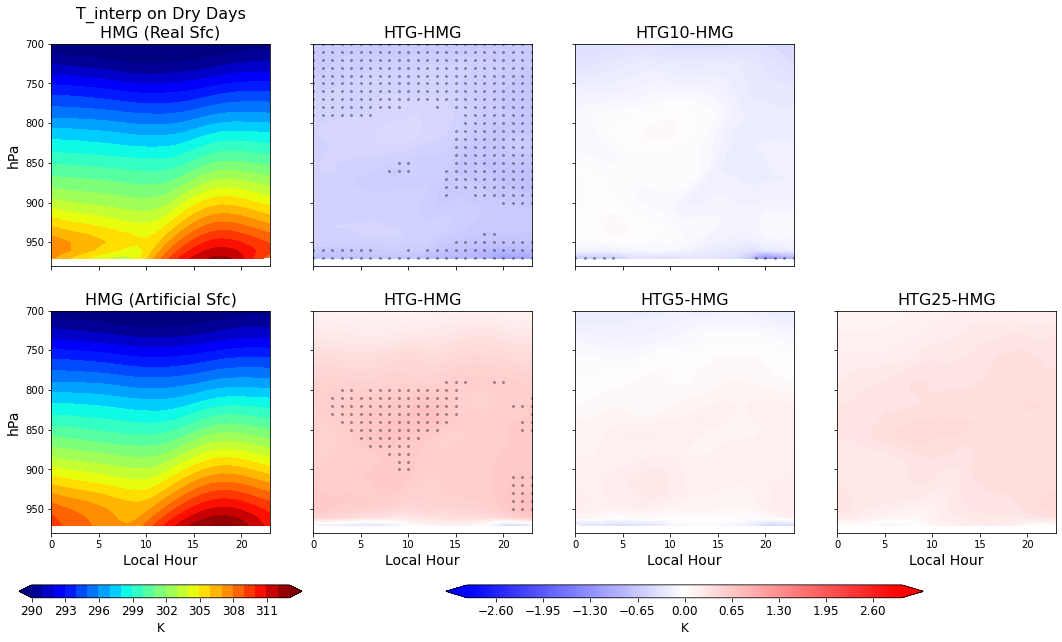

In [323]:
plotTimeHeightDifference_meanDiurnalCycle_contourfCondense_Dry('T_interp',
                                                               980,   700,
                                                               np.arange(-3.0,3.05,0.05), 
                                                               np.arange(290,314,1))

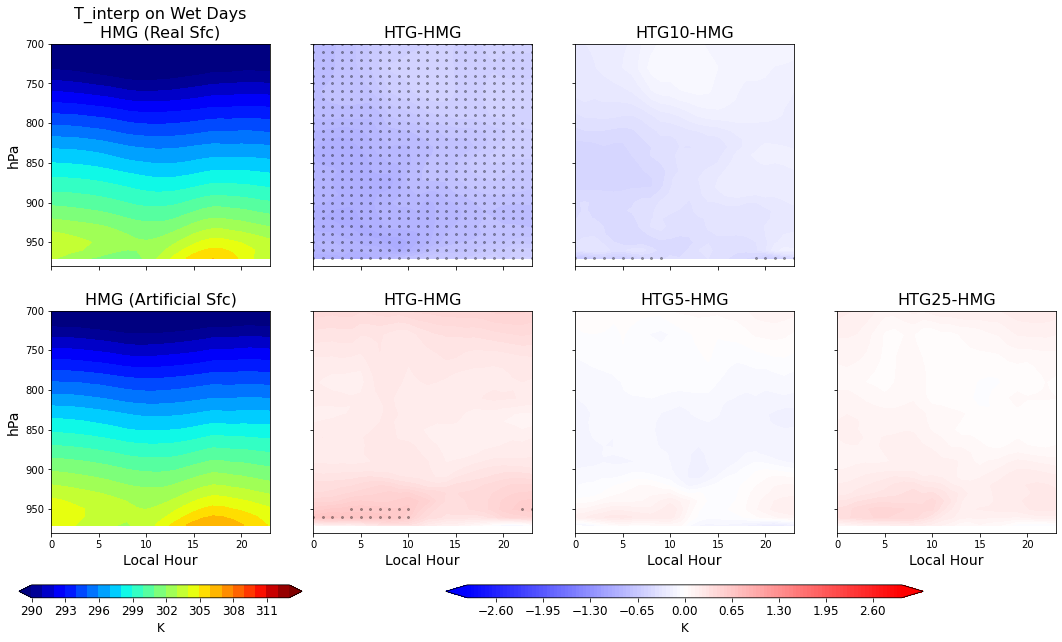

In [320]:
plotTimeHeightDifference_meanDiurnalCycle_contourfCondense_Wet('T_interp',
                                                               980,   700,
                                                               np.arange(-3.0,3.05,0.05), 
                                                               np.arange(290,314,1))

In [283]:
# varSel  = 'T_interp'

# plotTimeHeightDifference_meanDiurnalCycle_contourfDry('artificial',
#                                                    varSel,
#                                                    980,700,
#                                                    np.arange(-3.0,3.05,0.05), 
#                                                    np.arange(290,314,1))

# plotTimeHeightDifference_meanDiurnalCycle_contourfDry('real',
#                                                    varSel,
#                                                    980,700,
#                                                    np.arange(-3.0,3.05,0.05), 
#                                                    np.arange(290,314,1))


In [228]:
# varSel  = 'T_interp'

# plotTimeHeightDifference_meanDiurnalCycle_contourfWet('artificial',
#                                                    varSel,
#                                                    980,700,
#                                                    np.arange(-2.3,2.35,0.05), 
#                                                    np.arange(290,310,1))

# plotTimeHeightDifference_meanDiurnalCycle_contourfWet('real',
#                                                    varSel,
#                                                    980,700,
#                                                    np.arange(-2.3,2.35,0.05), 
#                                                    np.arange(290,310,1))


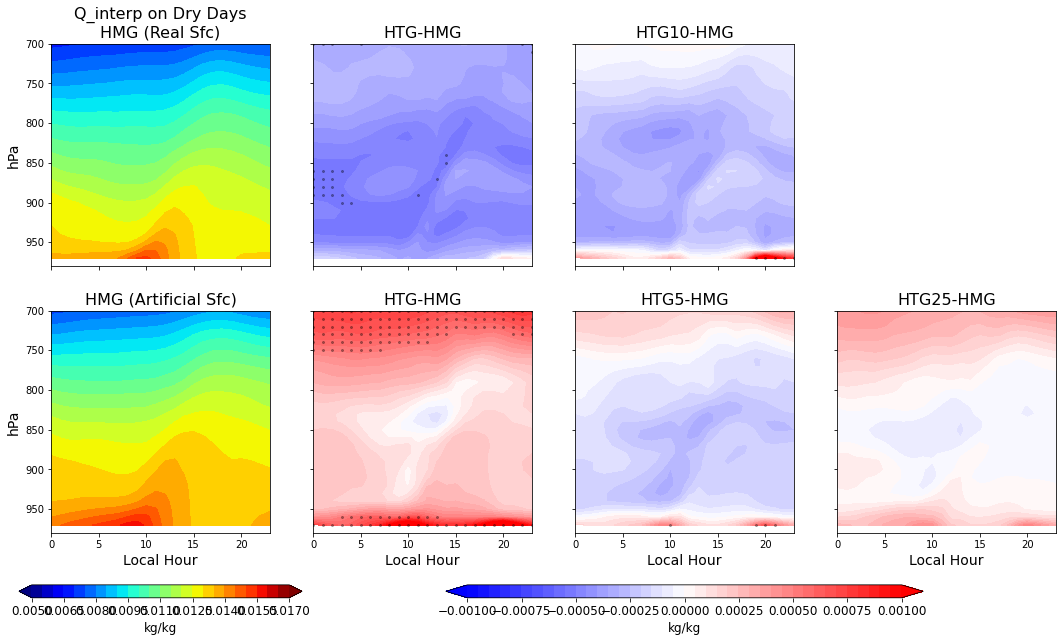

In [324]:
plotTimeHeightDifference_meanDiurnalCycle_contourfCondense_Dry('Q_interp',
                                                               980,   700,
                                                               np.arange(-1e-3, 1.05e-3, 0.05e-3), 
                                                               np.arange(0.005, 0.0175, 0.0005))

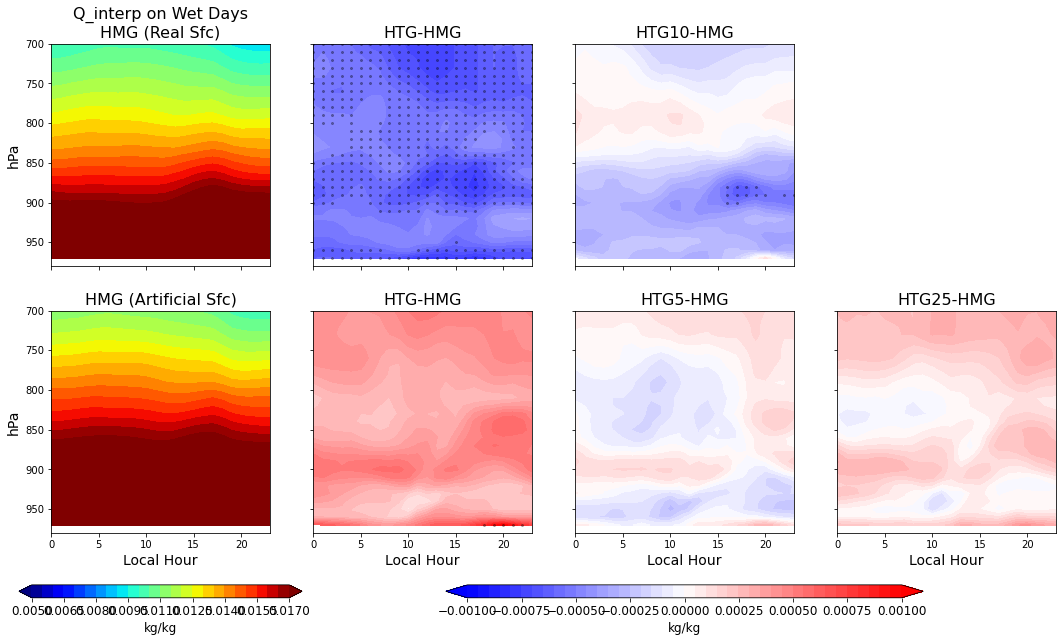

In [325]:
plotTimeHeightDifference_meanDiurnalCycle_contourfCondense_Wet('Q_interp',
                                                               980,   700,
                                                               np.arange(-1e-3, 1.05e-3, 0.05e-3), 
                                                               np.arange(0.005, 0.0175, 0.0005))

In [230]:
# varSel  = 'Q_interp'

# plotTimeHeightDifference_meanDiurnalCycle_contourfDry('artificial',
#                                                    varSel,
#                                                    980,700,
#                                                    np.arange(-1e-3, 1.05e-3, 0.05e-3), 
#                                                    np.arange(0.005, 0.0175, 0.0005))

# plotTimeHeightDifference_meanDiurnalCycle_contourfDry('real',
#                                                    varSel,
#                                                    980,700,
#                                                    np.arange(-1e-3, 1.05e-3, 0.05e-3), 
#                                                    np.arange(0.005, 0.0175, 0.0005))


In [231]:
# varSel  = 'Q_interp'

# plotTimeHeightDifference_meanDiurnalCycle_contourfWet('artificial',
#                                                    varSel,
#                                                    980,700,
#                                                    np.arange(-1e-3, 1.05e-3, 0.05e-3), 
#                                                    np.arange(0.01, 0.023, 0.0005))

# plotTimeHeightDifference_meanDiurnalCycle_contourfWet('real',
#                                                    varSel,
#                                                    980,700,
#                                                    np.arange(-1e-3, 1.05e-3, 0.05e-3), 
#                                                    np.arange(0.01, 0.023, 0.0005))


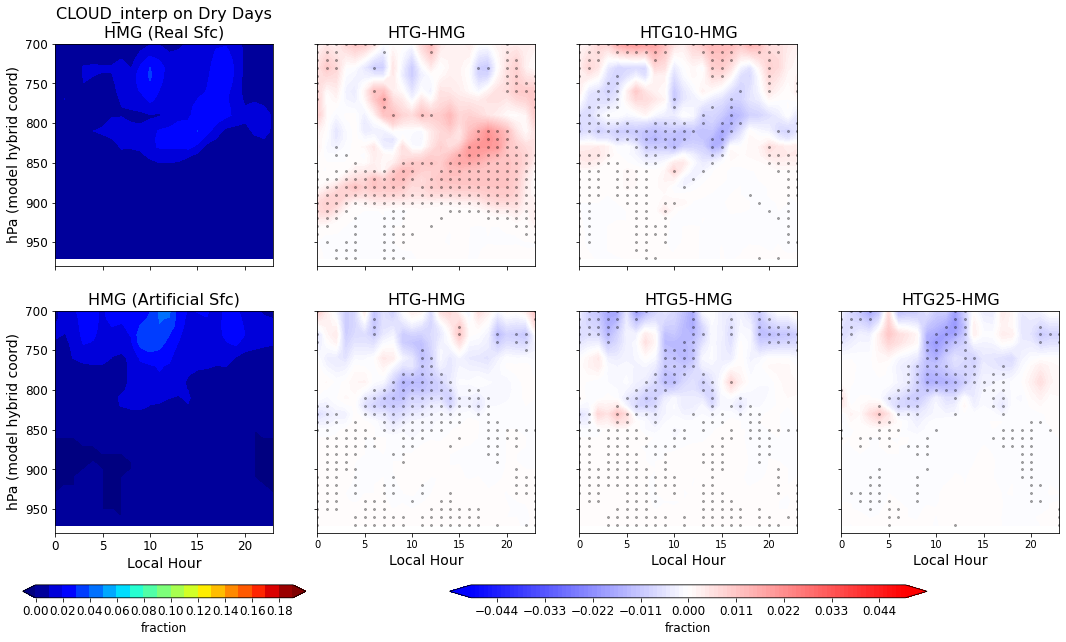

In [286]:
plotTimeHeightDifference_meanDiurnalCycle_contourfCondense_Dry('CLOUD_interp',
                                                               980,   700,
                                                               np.arange(-0.05,0.051,0.001), 
                                                               np.arange(0,0.2,0.01))

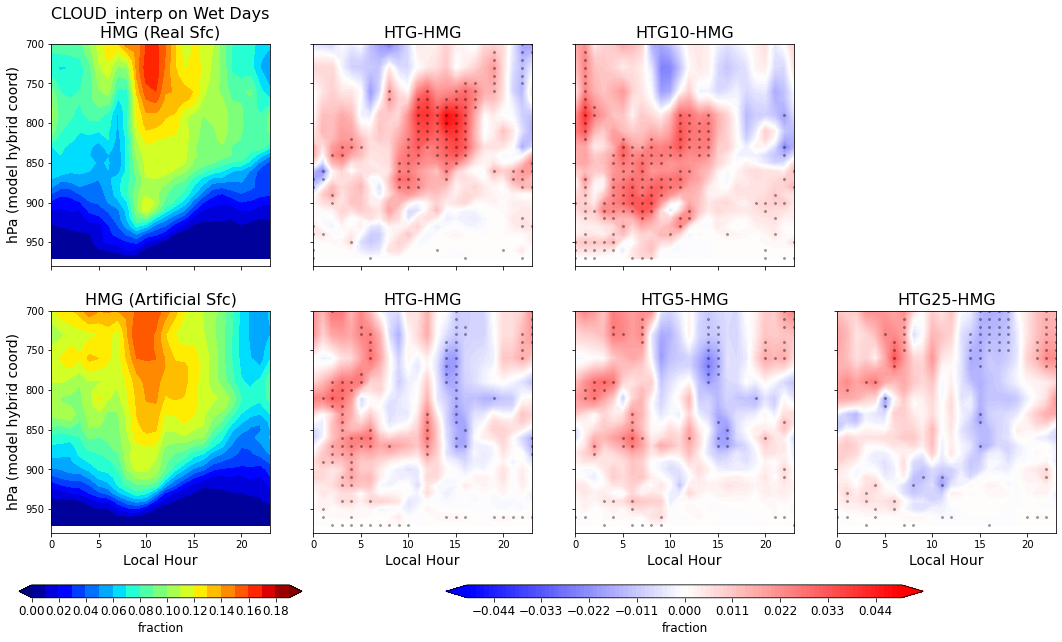

In [290]:
plotTimeHeightDifference_meanDiurnalCycle_contourfCondense_Wet('CLOUD_interp',
                                                               980,   700,
                                                               np.arange(-0.05,0.051,0.001), 
                                                               np.arange(0,0.2,0.01))

In [287]:
# varSel  = 'CLOUD'

# plotTimeHeightDifference_meanDiurnalCycle_contourfDry('artificial',
#                                                    varSel,
#                                                    1000,500,
#                                                    np.arange(-0.05,0.051,0.001), 
#                                                    np.arange(0,0.2,0.01))

# plotTimeHeightDifference_meanDiurnalCycle_contourfDry('real',
#                                                    varSel,
#                                                    1000,500,
#                                                    np.arange(-0.05,0.051,0.001), 
#                                                    np.arange(0,0.2,0.01))


In [288]:
# varSel  = 'CLOUD'

# plotTimeHeightDifference_meanDiurnalCycle_contourfWet('artificial',
#                                                    varSel,
#                                                    1000,500,
#                                                    np.arange(-0.05,0.051,0.001), 
#                                                    np.arange(0,0.5,0.01))

# plotTimeHeightDifference_meanDiurnalCycle_contourfWet('real',
#                                                    varSel,
#                                                    1000,500,
#                                                    np.arange(-0.05,0.051,0.001), 
#                                                    np.arange(0,0.5,0.01))


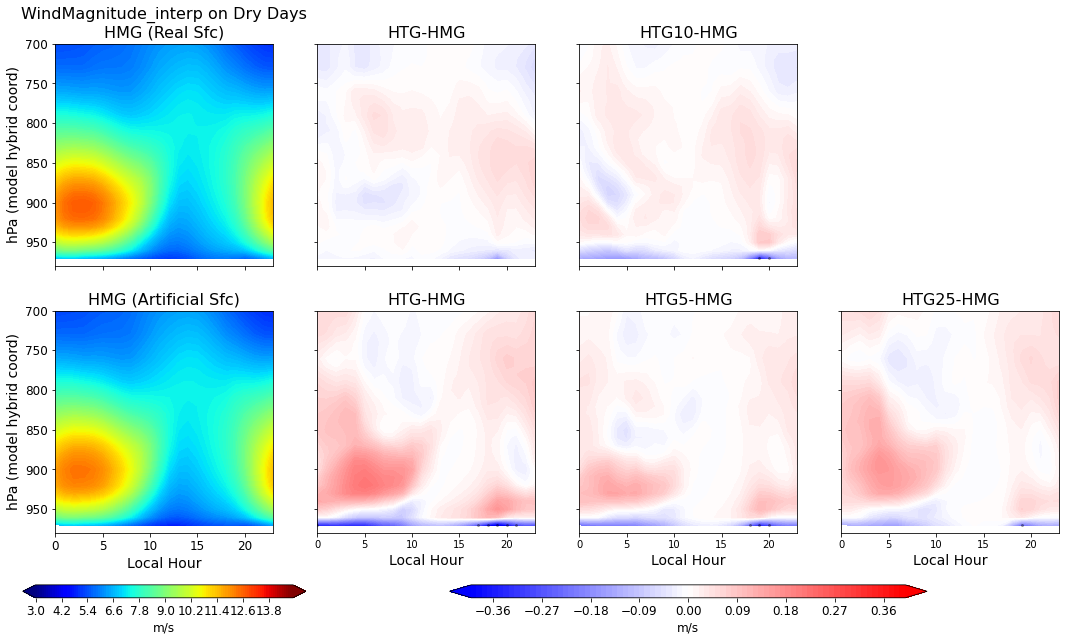

In [292]:
plotTimeHeightDifference_meanDiurnalCycle_contourfCondense_Dry('WindMagnitude_interp',
                                                               980,   700,
                                                               np.arange(-0.4,0.41,0.01), 
                                                               np.arange(3,15,0.1))

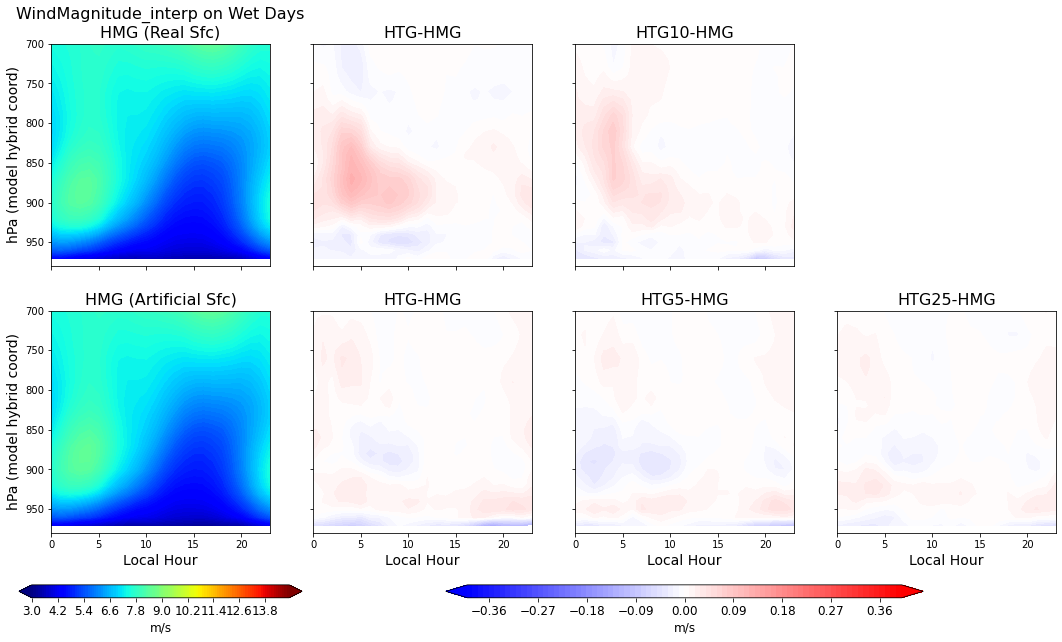

In [294]:
plotTimeHeightDifference_meanDiurnalCycle_contourfCondense_Wet('WindMagnitude_interp',
                                                               980,   700,
                                                               np.arange(-0.4,0.41,0.01), 
                                                               np.arange(3,15,0.1))

In [293]:
# varSel  = 'WindMagnitude'

# plotTimeHeightDifference_meanDiurnalCycle_contourfDry('artificial',
#                                                    varSel,
#                                                    1000,500,
#                                                    np.arange(-0.4,0.41,0.01), 
#                                                    np.arange(3,15,0.1))

# plotTimeHeightDifference_meanDiurnalCycle_contourfDry('real',
#                                                    varSel,
#                                                    1000,500,
#                                                    np.arange(-0.4,0.41,0.01), 
#                                                    np.arange(3,15,0.1))


In [295]:
# varSel  = 'WindMagnitude'

# plotTimeHeightDifference_meanDiurnalCycle_contourfWet('artificial',
#                                                    varSel,
#                                                    1000,500,
#                                                    np.arange(-0.2,0.21,0.01), 
#                                                    np.arange(0,12,0.1))

# plotTimeHeightDifference_meanDiurnalCycle_contourfWet('real',
#                                                    varSel,
#                                                    1000,500,
#                                                    np.arange(-0.2,0.21,0.01), 
#                                                    np.arange(0,12,0.1))


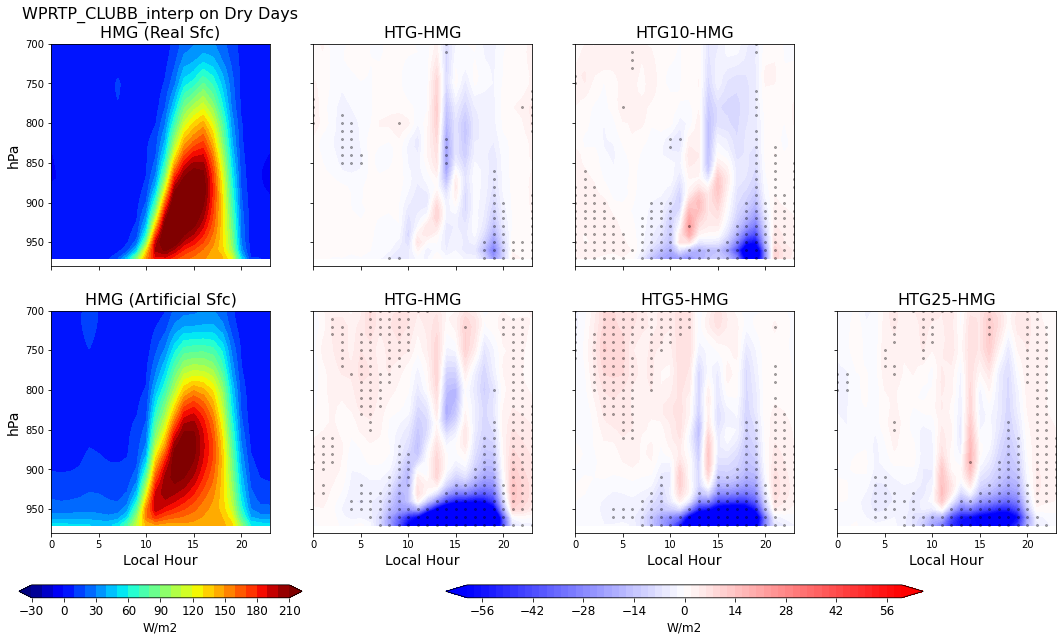

In [326]:
plotTimeHeightDifference_meanDiurnalCycle_contourfCondense_Dry('WPRTP_CLUBB_interp',
                                                               980,   700,
                                                               np.arange(-60,62,2), 
                                                               np.arange(-30,220,10))


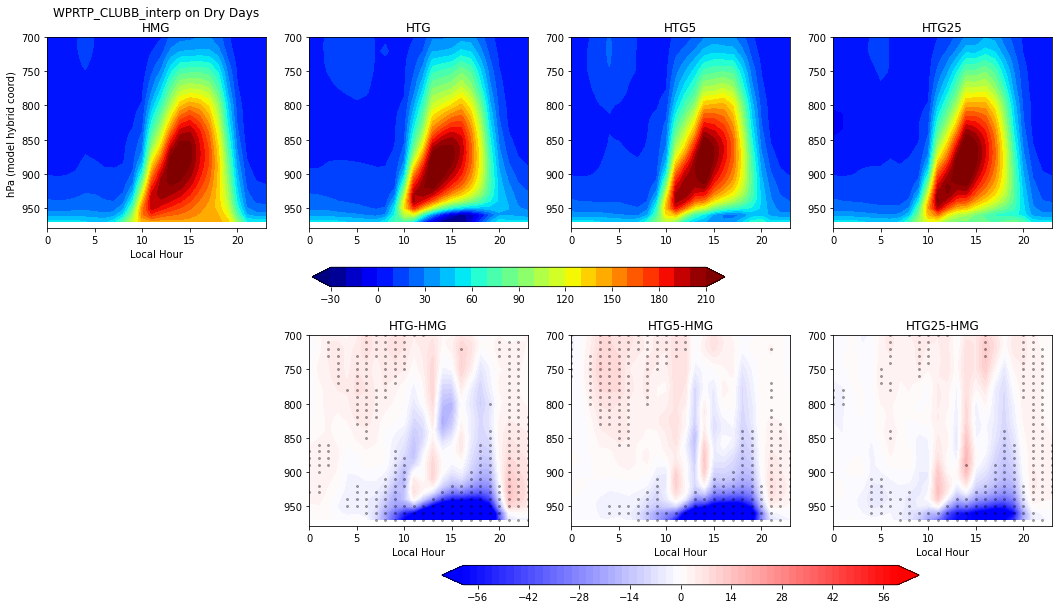

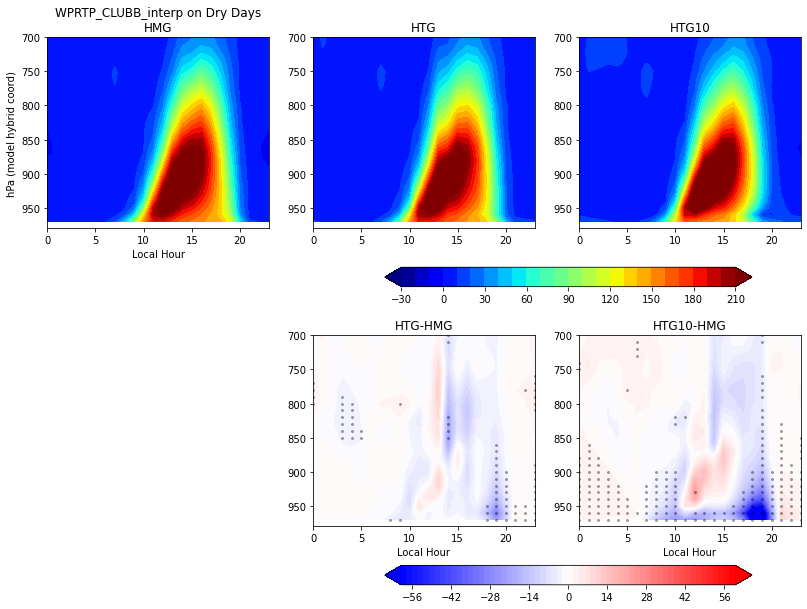

In [327]:
varSel  = 'WPRTP_CLUBB_interp'

plotTimeHeightDifference_meanDiurnalCycle_contourfDry('artificial',
                                                   varSel,
                                                   980,700,
                                                   np.arange(-60,62,2), 
                                                   np.arange(-30,220,10))

plotTimeHeightDifference_meanDiurnalCycle_contourfDry('real',
                                                   varSel,
                                                   980,700,
                                                   np.arange(-60,62,2), 
                                                   np.arange(-30,220,10))



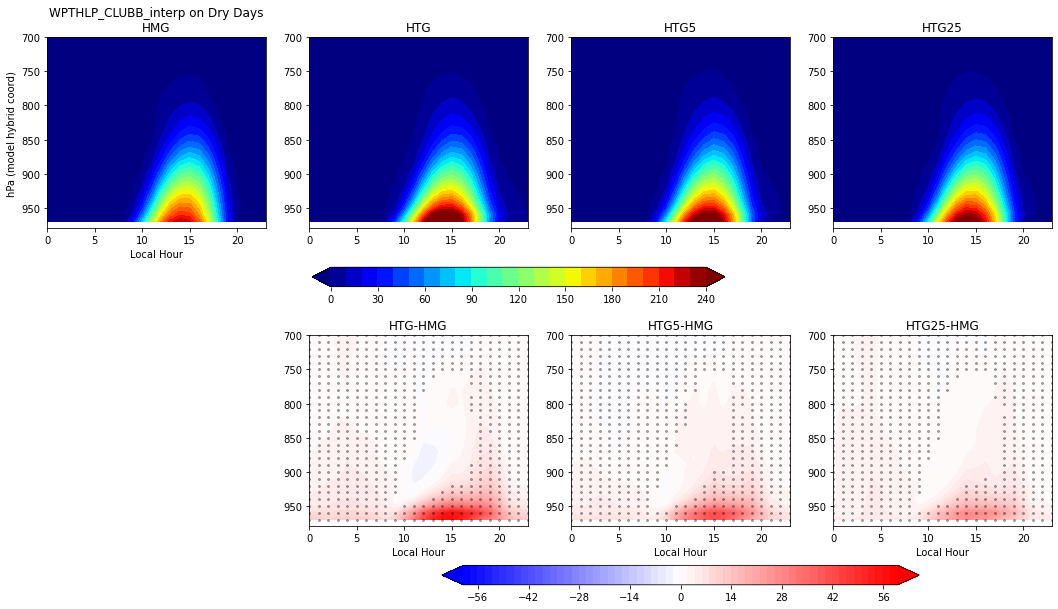

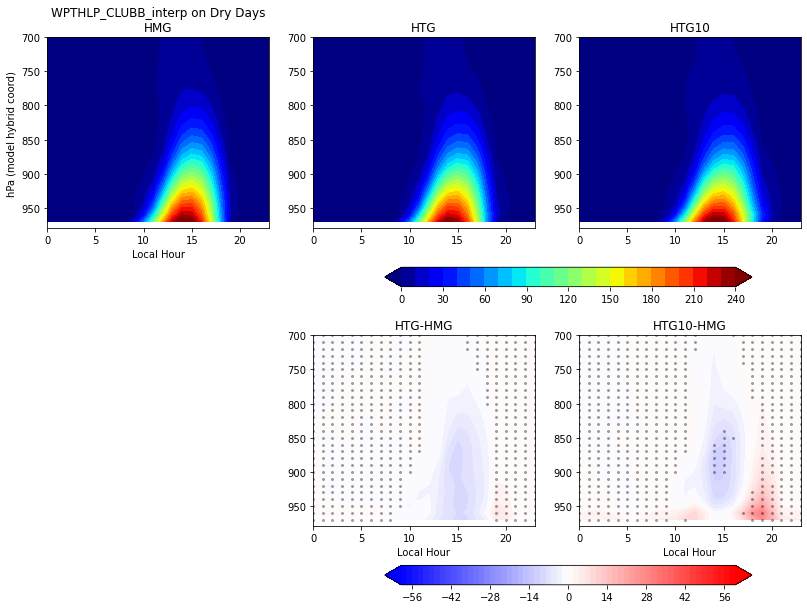

In [328]:
varSel  = 'WPTHLP_CLUBB_interp'

plotTimeHeightDifference_meanDiurnalCycle_contourfDry('artificial',
                                                   varSel,
                                                   980,700,
                                                   np.arange(-60,62,2), 
                                                   np.arange(0,250,10))

plotTimeHeightDifference_meanDiurnalCycle_contourfDry('real',
                                                   varSel,
                                                   980,700,
                                                   np.arange(-60,62,2), 
                                                   np.arange(0,250,10))



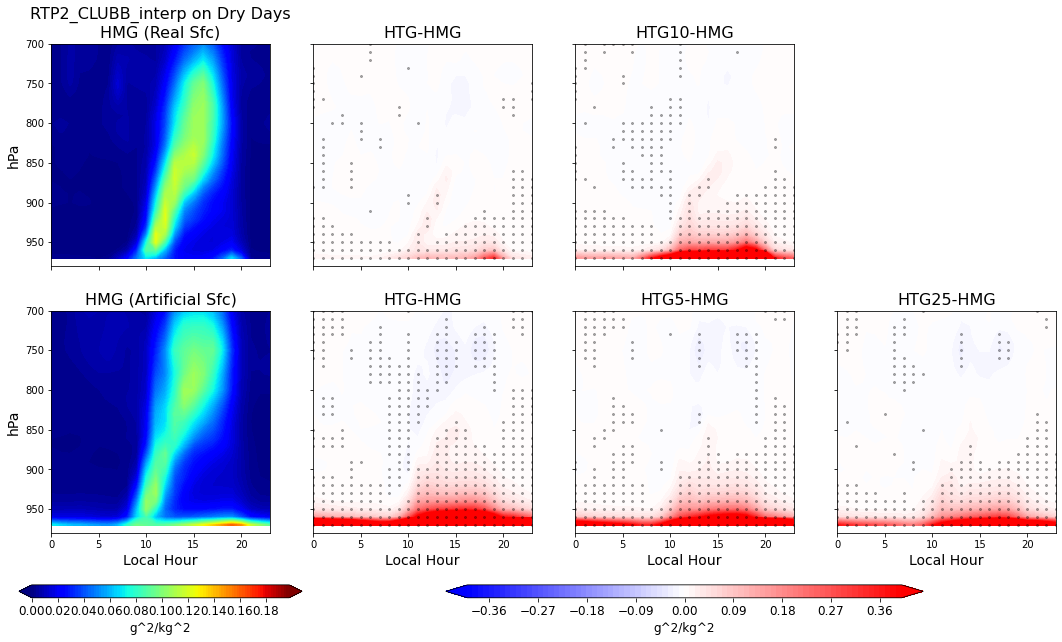

In [329]:
plotTimeHeightDifference_meanDiurnalCycle_contourfCondense_Dry('RTP2_CLUBB_interp',
                                                               980,   700,
                                                               np.arange(-0.4, 0.41, 0.01), 
                                                               np.arange(0,0.2,0.002))


In [330]:
# varSel  = 'RTP2_CLUBB_interp'

# plotTimeHeightDifference_meanDiurnalCycle_contourfDry('artificial',
#                                                    varSel,
#                                                    980,700,
#                                                    np.arange(-0.3, 0.31, 0.01), 
#                                                    np.arange(0,2.0,0.05))

# plotTimeHeightDifference_meanDiurnalCycle_contourfDry('real',
#                                                    varSel,
#                                                    980,700,
#                                                    np.arange(-0.3, 0.31, 0.01), 
#                                                    np.arange(0,2.0,0.05))



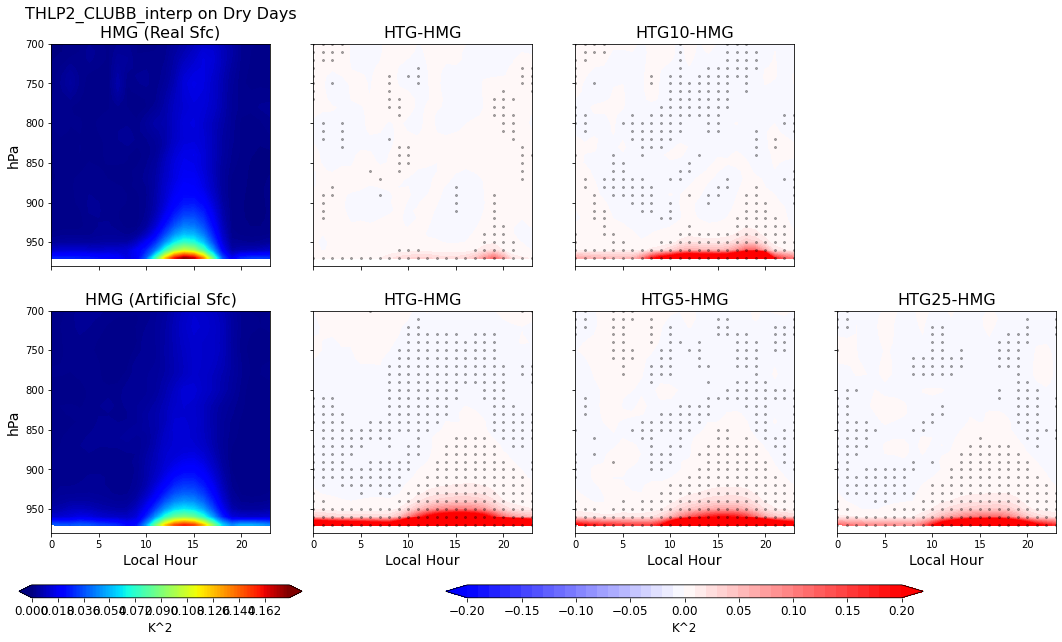

In [331]:
plotTimeHeightDifference_meanDiurnalCycle_contourfCondense_Dry('THLP2_CLUBB_interp',
                                                               980,   700,
                                                               np.arange(-0.2, 0.21, 0.01), 
                                                               np.arange(0,0.18,0.001))


In [332]:
# varSel  = 'THLP2_CLUBB_interp'

# plotTimeHeightDifference_meanDiurnalCycle_contourfDry('artificial',
#                                                    varSel,
#                                                    980,700,
#                                                    np.arange(-0.3, 0.31, 0.01), 
#                                                    np.arange(0,1.2,0.05))

# plotTimeHeightDifference_meanDiurnalCycle_contourfDry('real',
#                                                    varSel,
#                                                    980,700,
#                                                    np.arange(-0.3, 0.31, 0.01), 
#                                                    np.arange(0,1.2,0.05))



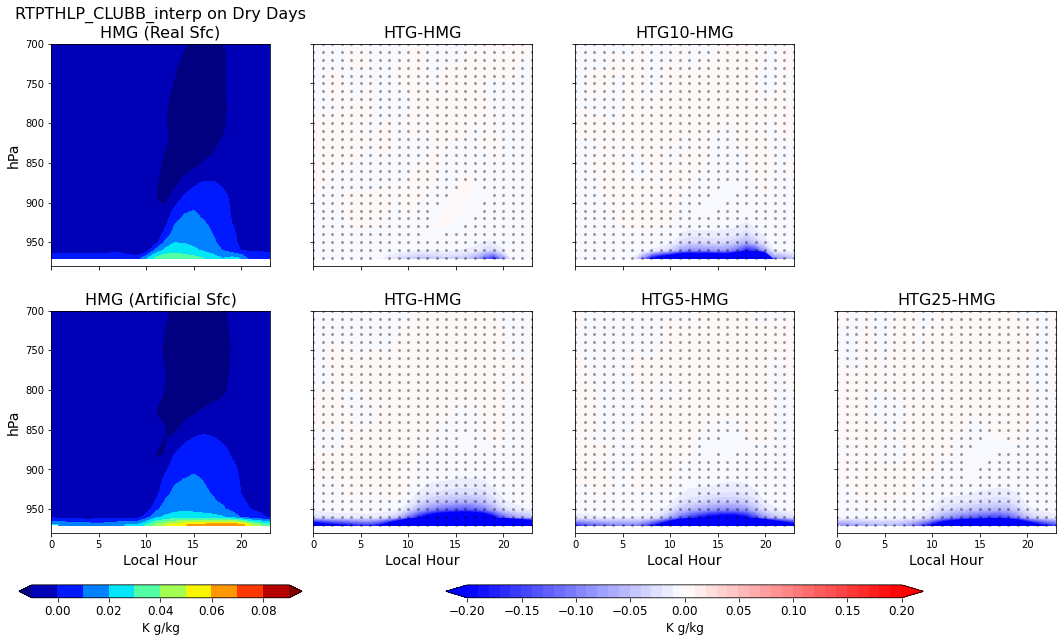

In [333]:
plotTimeHeightDifference_meanDiurnalCycle_contourfCondense_Dry('RTPTHLP_CLUBB_interp',
                                                               980,   700,
                                                               np.arange(-0.2, 0.21, 0.01), 
                                                               np.arange(-0.01,0.1,0.01))


In [334]:
# varSel  = 'RTPTHLP_CLUBB_interp'

# plotTimeHeightDifference_meanDiurnalCycle_contourfDry('artificial',
#                                                    varSel,
#                                                    980,700,
#                                                    np.arange(-0.3, 0.31, 0.01), 
#                                                    np.arange(-0.2,0.1,0.01))

# plotTimeHeightDifference_meanDiurnalCycle_contourfDry('real',
#                                                    varSel,
#                                                    980,700,
#                                                    np.arange(-0.3, 0.31, 0.01), 
#                                                    np.arange(-0.2,0.1,0.01))



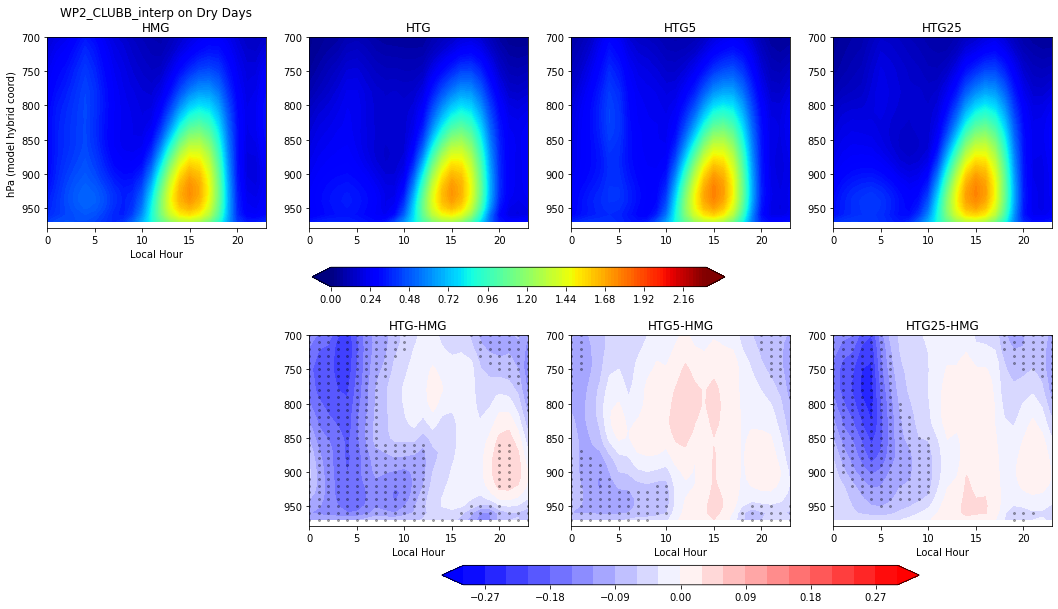

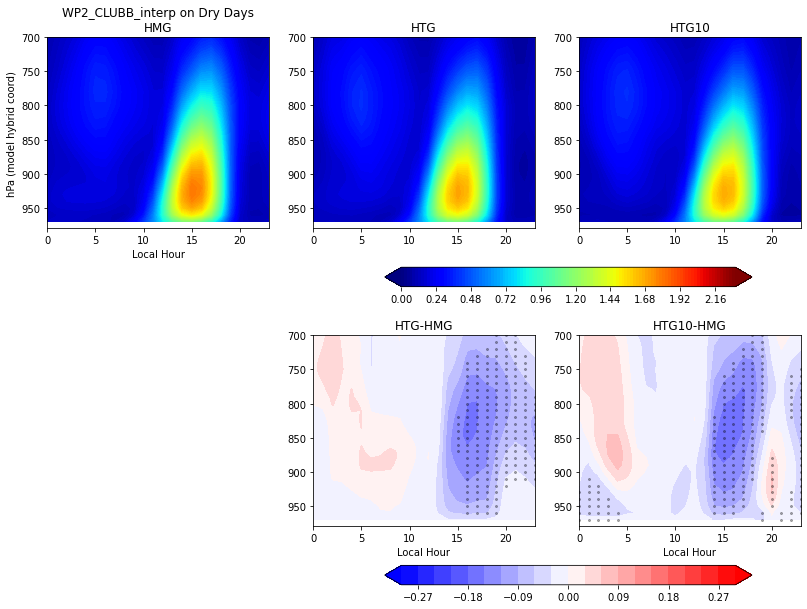

In [252]:
varSel  = 'WP2_CLUBB_interp'

plotTimeHeightDifference_meanDiurnalCycle_contourfDry('artificial',
                                                   varSel,
                                                   980,700,
                                                   np.arange(-0.3, 0.33, 0.03), 
                                                   np.arange(0,2.32,0.02))

plotTimeHeightDifference_meanDiurnalCycle_contourfDry('real',
                                                   varSel,
                                                   980,700,
                                                   np.arange(-0.3, 0.33, 0.03), 
                                                   np.arange(0,2.32,0.02))



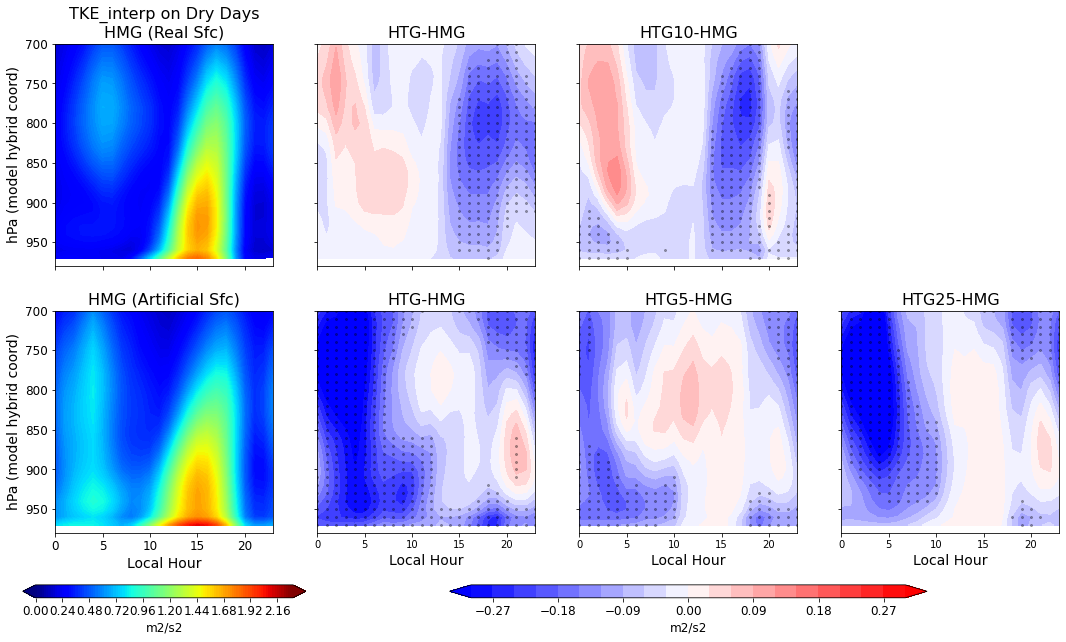

In [299]:
plotTimeHeightDifference_meanDiurnalCycle_contourfCondense_Dry('TKE_interp',
                                                               980,   700,
                                                               np.arange(-0.3, 0.33, 0.03), 
                                                               np.arange(0,2.32,0.02))

In [254]:
# varSel  = 'TKE_interp'

# plotTimeHeightDifference_meanDiurnalCycle_contourfDry('artificial',
#                                                    varSel,
#                                                    980,700,
#                                                    np.arange(-0.3, 0.33, 0.03), 
#                                                    np.arange(0,2.32,0.02))

# plotTimeHeightDifference_meanDiurnalCycle_contourfDry('real',
#                                                    varSel,
#                                                    980,700,
#                                                    np.arange(-0.3, 0.33, 0.03), 
#                                                    np.arange(0,2.32,0.02))



In [255]:
# varSel  = 'TKE_interp'

# plotTimeHeightDifference_meanDiurnalCycle_contourfWet('artificial',
#                                                    varSel,
#                                                    980,700,
#                                                    np.arange(-0.3, 0.33, 0.03), 
#                                                    np.arange(0,2.32,0.02))

# plotTimeHeightDifference_meanDiurnalCycle_contourfWet('real',
#                                                    varSel,
#                                                    980,700,
#                                                    np.arange(-0.3, 0.33, 0.03), 
#                                                    np.arange(0,2.32,0.02))



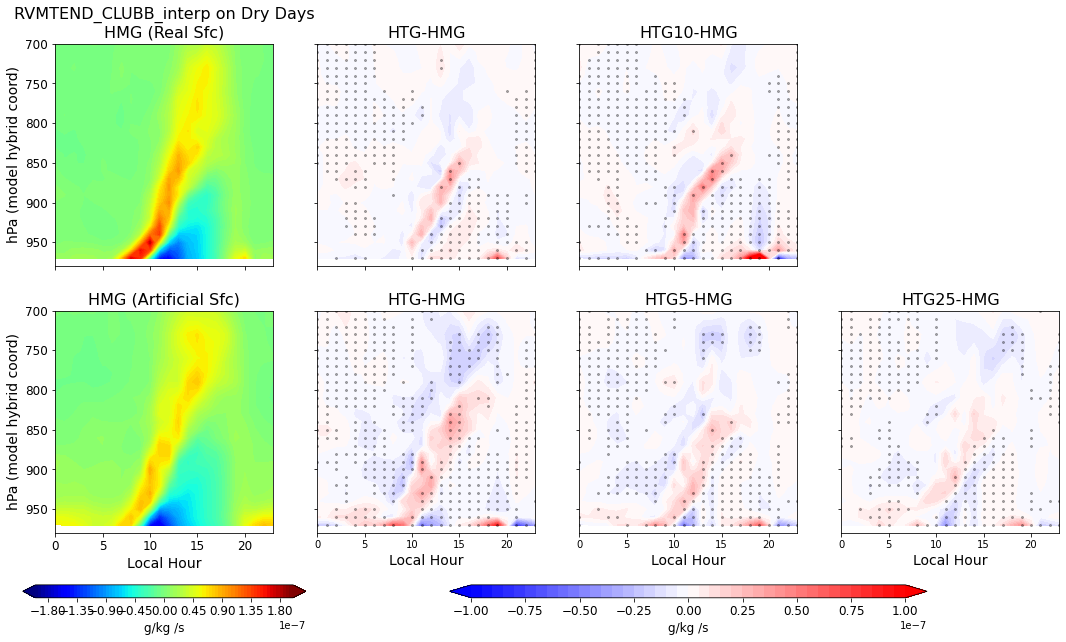

In [300]:
plotTimeHeightDifference_meanDiurnalCycle_contourfCondense_Dry('RVMTEND_CLUBB_interp',
                                                               980,   700,
                                                               np.arange(-1e-7, 1.05e-7, 0.05e-7), 
                                                               np.arange(-2e-7, 2.05e-7, 0.05e-7))

In [301]:
# varSel  = 'RVMTEND_CLUBB_interp'

# plotTimeHeightDifference_meanDiurnalCycle_contourfDry('artificial',
#                                                    varSel,
#                                                    980,700,
#                                                    np.arange(-1e-7, 1.05e-7, 0.05e-7), 
#                                                    np.arange(-2e-7, 2.05e-7, 0.05e-7))

# plotTimeHeightDifference_meanDiurnalCycle_contourfDry('real',
#                                                    varSel,
#                                                    980,700,
#                                                    np.arange(-1e-7, 1.05e-7, 0.05e-7), 
#                                                    np.arange(-2e-7, 2.05e-7, 0.05e-7))



In [302]:
# varSel  = 'RVMTEND_CLUBB_interp'

# plotTimeHeightDifference_meanDiurnalCycle_contourfWet('artificial',
#                                                    varSel,
#                                                    980,700,
#                                                    np.arange(-1e-7, 1.05e-7, 0.05e-7), 
#                                                    np.arange(-2e-7, 2.05e-7, 0.05e-7))

# plotTimeHeightDifference_meanDiurnalCycle_contourfWet('real',
#                                                    varSel,
#                                                    980,700,
#                                                    np.arange(-1e-7, 1.05e-7, 0.05e-7), 
#                                                    np.arange(-2e-7, 2.05e-7, 0.05e-7))



## What is the large scale forcing doing?

In [281]:
nateDS_HMG.q_adv_h

<xarray.DataArray 'q_adv_h' (time: 33600, lev: 37)>
[1243200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01 ... 2018-10-31T22:49:25.429687504
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 ... 175.0 150.0 125.0 100.0
Attributes:
    units:          g/kg/hour
    long_name:      Horizontal q advection
    standard_name:  tendency_of_humidity_mixing_ratio_due_to_advection horizo...
    version:        v2
    source:         Derived from RAP Analysis

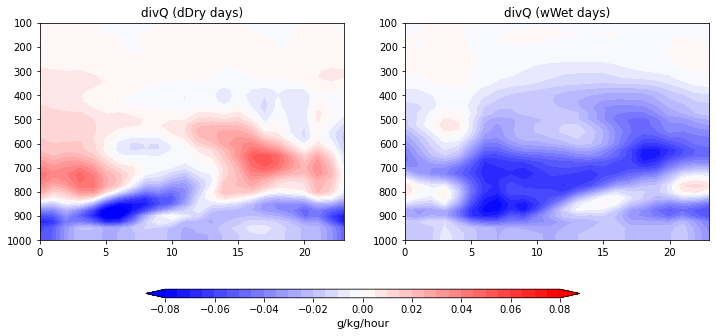

In [278]:
## Set up figure
fig,axs = plt.subplots(1,2, figsize=(12,4))
axs     = axs.ravel()    

levs = np.arange(-0.08, 0.085, 0.005)


contour_plot=axs[0].contourf(hourlyMean_dDry_Obs.hour.values, hourlyMean_dDry_Obs.lev.values, 
                np.transpose(hourlyMean_dDry_Obs.q_adv_h.values),
                levs, cmap='bwr', extend='both')
axs[0].set_title('divQ (dDry days)')

contour_plot=axs[1].contourf(hourlyMean_wWet_Obs.hour.values, hourlyMean_wWet_Obs.lev.values, 
                np.transpose(hourlyMean_wWet_Obs.q_adv_h.values),
                levs, cmap='bwr', extend='both')
axs[1].set_title('divQ (wWet days)')

# Add colorbar
ax_position = axs[1].get_position()
cbar_ax = fig.add_axes([ax_position.x0-0.3, ax_position.y0-0.2, ax_position.width+0.15, 0.03])
cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax)
cbar.set_label(nateDS_local['q_adv_h'].units,fontsize=11)

axs[0].invert_yaxis()
axs[1].invert_yaxis()

# axs[0].set_ylim([1000,800])
# axs[1].set_ylim([1000,800])


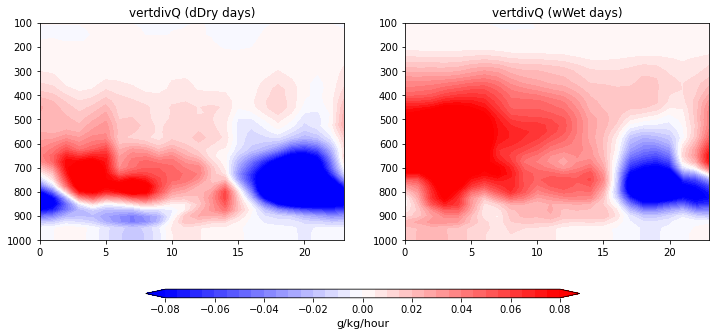

In [279]:
## Set up figure
fig,axs = plt.subplots(1,2, figsize=(12,4))
axs     = axs.ravel()    

levs = np.arange(-0.08, 0.085, 0.005)


contour_plot=axs[0].contourf(hourlyMean_dDry_Obs.hour.values, hourlyMean_dDry_Obs.lev.values, 
                np.transpose(hourlyMean_dDry_Obs.q_adv_v.values),
                levs, cmap='bwr', extend='both')
axs[0].set_title('vertdivQ (dDry days)')

contour_plot=axs[1].contourf(hourlyMean_wWet_Obs.hour.values, hourlyMean_wWet_Obs.lev.values, 
                np.transpose(hourlyMean_wWet_Obs.q_adv_v.values),
                levs, cmap='bwr', extend='both')
axs[1].set_title('vertdivQ (wWet days)')

# Add colorbar
ax_position = axs[1].get_position()
cbar_ax = fig.add_axes([ax_position.x0-0.3, ax_position.y0-0.2, ax_position.width+0.15, 0.03])
cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax)
cbar.set_label(nateDS_local['q_adv_v'].units,fontsize=11)

axs[0].invert_yaxis()
axs[1].invert_yaxis()

# axs[0].set_ylim([1000,800])
# axs[1].set_ylim([1000,800])


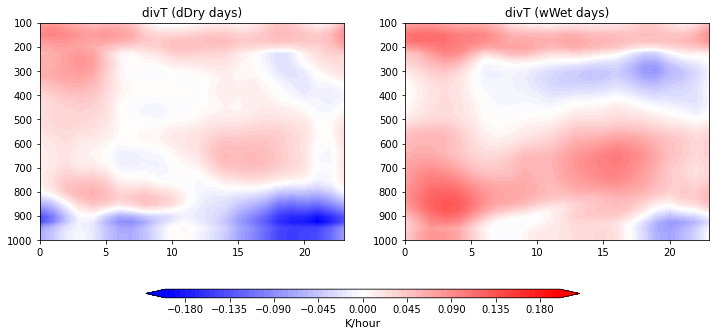

In [280]:
## Set up figure
fig,axs = plt.subplots(1,2, figsize=(12,4))
axs     = axs.ravel()    

levs = np.arange(-0.2, 0.205, 0.005)


contour_plot=axs[0].contourf(hourlyMean_dDry_Obs.hour.values, hourlyMean_dDry_Obs.lev.values, 
                np.transpose(hourlyMean_dDry_Obs.T_adv_h.values),
                levs, cmap='bwr', extend='both')
axs[0].set_title('divT (dDry days)')

contour_plot=axs[1].contourf(hourlyMean_wWet_Obs.hour.values, hourlyMean_wWet_Obs.lev.values, 
                np.transpose(hourlyMean_wWet_Obs.T_adv_h.values),
                levs, cmap='bwr', extend='both')
axs[1].set_title('divT (wWet days)')

# Add colorbar
ax_position = axs[1].get_position()
cbar_ax = fig.add_axes([ax_position.x0-0.3, ax_position.y0-0.2, ax_position.width+0.15, 0.03])
cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax)
cbar.set_label(nateDS_local['T_adv_h'].units,fontsize=11)

axs[0].invert_yaxis()
axs[1].invert_yaxis()

# axs[0].set_ylim([1000,800])
# axs[1].set_ylim([1000,800])
